In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
import sklearn.metrics as metrics

from scipy.stats import zscore                                        # ZSCORE SCALING
from sklearn.preprocessing import StandardScaler                      # ZScore
from sklearn.preprocessing import MinMaxScaler                        # Min Max Scaler

from sklearn.linear_model import LogisticRegression                   # Logistic Regression

from sklearn import metrics, model_selection                          # Evaluation Metrics
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve, precision_recall_curve

from sklearn.model_selection import train_test_split, GridSearchCV    # Train test Split and Grid Search

%matplotlib inline
sns.set(color_codes=True)
sns.set_palette('Accent_r')

%config InlineBackend.figure_format ='retina'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [2]:
df = pd.read_csv(r'C:\Users\risha\Downloads\FRA_Rishabh\Comp_Fin_Data.csv')


In [3]:
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_').str.replace('[', '_').str.replace(']', '').str.replace('-', '_')

In [4]:
df.head()


Num  Networth_Next_Year  Total_assets  Net_worth  Total_income  Change_in_stock  Total_expenses  Profit_after_tax  PBDITA    PBT  Cash_profit  PBDITA_as_perc_of_total_income  PBT_as_perc_of_total_income  PAT_as_perc_of_total_income  Cash_profit_as_perc_of_total_income  PAT_as_perc_of_net_worth   Sales  Income_from_fincial_services  Other_income  Total_capital  Reserves_and_funds  Borrowings  Current_liabilities_&_provisions  Deferred_tax_liability  Shareholders_funds  Cumulative_retained_profits  Capital_employed  TOL_to_TNW  Total_term_liabilities__to__tangible_net_worth  Contingent_liabilities__to__Net_worth_perc  Contingent_liabilities  Net_fixed_assets  Investments  Current_assets  Net_working_capital  Quick_ratio_times  Current_ratio_times  Debt_to_equity_ratio_times  Cash_to_current_liabilities_times  Cash_to_average_cost_of_sales_per_day  Creditors_turnover  Debtors_turnover  Finished_goods_turnover  WIP_turnover  Raw_material_turnover  Shares_outstanding  Equity_face_value    EPS  Adjusted_EPS  Total_liabilities  PE_on_BSE
0    1               395.3         827.6      336.5         534.1             13.5           508.7              38.9   124.4   64.6         95.2                           23.29                        12.10                         7.28                                17.82                     12.27   533.5                           0.6           NaN           87.6               249.0       390.7                              43.9                    56.4               336.5                        248.9             727.2        1.28                                            0.99                                      186.21                   626.6             461.1         18.1           257.6                163.1               0.99                 2.52                        1.16                               0.06                                   5.41               11.60              5.65                     3.99          3.37                  14.87           8760056.0               10.0   4.44          4.44              827.6        NaN
1    2                36.2          67.7       24.3         137.9             -3.7           131.0               3.2     5.5    1.0          3.8                            3.99                         0.73                         2.32                                 2.76                      0.00   135.5                           NaN           0.2           11.9                 4.3        16.6                              23.7                     3.1                24.3                         -8.2              40.9        1.53                                            0.21                                       47.74                    11.6              18.5          0.2            39.0                  3.9               0.67                 1.11                        0.68                               0.02                                   1.62                 NaN               NaN                      NaN           NaN                    NaN                 NaN                NaN   0.00          0.00               67.7        NaN
2    3                84.0         238.4       78.9         331.2            -18.1           309.2               3.9    25.8   10.5          9.4                            7.79                         3.17                         1.18                                 2.84                      5.07   330.6                           0.6           NaN           25.0                56.7        44.7                             102.2                     9.8                78.9                         53.1             123.6        1.70                                            0.33                                       30.42                    24.0              56.8          0.2           158.3                 38.3               1.11                 1.31                        0.57                               0.19                                 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Num                                             4256 non-null   int64  
 1   Networth_Next_Year                              4256 non-null   float64
 2   Total_assets                                    4256 non-null   float64
 3   Net_worth                                       4256 non-null   float64
 4   Total_income                                    4025 non-null   float64
 5   Change_in_stock                                 3706 non-null   float64
 6   Total_expenses                                  4091 non-null   float64
 7   Profit_after_tax                                4102 non-null   float64
 8   PBDITA                                          4102 non-null   float64
 9   PBT                                      

In [6]:
df.shape

(4256, 51)

In [7]:
df.describe().T

count          mean           std           min          25%          50%           75%           max
Num                                             4256.0  2.128500e+03  1.228746e+03  1.000000e+00     1064.750     2128.500  3.192250e+03  4.256000e+03
Networth_Next_Year                              4256.0  1.344741e+03  1.593674e+04 -7.426560e+04        3.975       72.100  3.308250e+02  8.057734e+05
Total_assets                                    4256.0  3.573617e+03  3.007444e+04  1.000000e-01       91.300      315.500  1.120800e+03  1.176509e+06
Net_worth                                       4256.0  1.351950e+03  1.296131e+04  0.000000e+00       31.475      104.800  3.898500e+02  6.131516e+05
Total_income                                    4025.0  4.688190e+03  5.391895e+04  0.000000e+00      107.100      455.100  1.485000e+03  2.442828e+06
Change_in_stock                                 3706.0  4.370248e+01  4.369150e+02 -3.029400e+03       -1.800        1.600  1.840000e+01  1.418550e+04
Total_expenses                                  4091.0  4.356301e+03  5.139809e+04 -1.000000e-01       96.800      426.800  1.395700e+03  2.366035e+06
Profit_after_tax                                4102.0  2.950506e+02  3.079902e+03 -3.908300e+03        0.500        9.000  5.330000e+01  1.194391e+05
PBDITA                                          4102.0  6.059406e+02  5.646231e+03 -4.407000e+02        6.925       36.900  1.587000e+02  2.085765e+05
PBT                                             4102.0  4.102590e+02  4.217415e+03 -3.894800e+03        0.800       12.600  7.417500e+01  1.452926e+05
Cash_profit                                     4102.0  4.082675e+02  4.143926e+03 -2.245700e+03        2.900       19.400  9.625000e+01  1.769118e+05
PBDITA_as_perc_of_total_income                  4177.0  3.179892e+00  1.722566e+02 -6.400000e+03        4.970        9.680  1.647000e+01  1.000000e+02
PBT_as_perc_of_total_income                     4177.0 -1.819683e+01  4.199111e+02 -2.134000e+04        0.560        3.340  8.940000e+00  1.000000e+02
PAT_as_perc_of_total_income                     4177.0 -2.003367e+01  4.235762e+02 -2.134000e+04        0.350        2.370  6.420000e+00  1.500000e+02
Cash_profit_as_perc_of_total_income             4177.0 -9.021278e+00  2.999574e+02 -1.502000e+04        2.000        5.660  1.073000e+01  1.000000e+02
PAT_as_perc_of_net_worth                        4256.0  1.016786e+01  6.153240e+01 -7.487200e+02        0.000        8.040  2.020250e+01  2.466670e+03
Sales                                           3951.0  4.645685e+03  5.308090e+04  1.000000e-01      113.350      468.600  1.481200e+03  2.384984e+06
Income_from_fincial_services                    3145.0  8.136006e+01  1.042759e+03  0.000000e+00        0.500        1.900  9.800000e+00  5.193820e+04
Other_income                                    2700.0  5.595289e+01  1.178415e+03  0.000000e+00        0.400        1.500  6.200000e+00  4.285670e+04
Total_capital                                   4251.0  2.245577e+02  1.684951e+03  1.000000e-01       13.200       42.600  1.031500e+02  7.827320e+04
Reserves_and_funds                              4158.0  1.210562e+03  1.281623e+04 -6.525900e+03        5.300       55.150  2.825250e+02  6.251378e+05
Borrowings                                      3825.0  1.176248e+03  8.581249e+03  1.000000e-01       24.400       99.800  3.583000e+02  2.782573e+05
Current_liabilities_&_provisions                4146.0  9.606314e+02  9.140536e+03  1.000000e-01       17.500       70.300  2.659250e+02  3.522403e+05
Deferred_tax_liability                          2887.0  2.344951e+02  2.106253e+03  1.000000e-01        3.200       13.500  5.130000e+01  7.279660e+04
Shareholders_funds                              4256.0  1.376487e+03  1.301069e+04  0.000000e+00       32.300      107.600  4.089000e+02  6.131516e+05
Cumulative_retained_profits                     4211.0  9.371820e+02  9.853096e+03 -6.534300e+03        1.100       37.400 

In [8]:
print('Number of Duplicates =', df.duplicated().sum().sum())

Number of Duplicates = 0


In [9]:
df.size

217056

In [10]:
df.isnull().sum().sum()

17778

In [11]:
#Unique Identifiers do not add any value to model building, hence dropping them

df.drop(['Num', 'Shares_outstanding' , 'Equity_face_value'], axis=1, inplace=True)
df.head()


Networth_Next_Year  Total_assets  Net_worth  Total_income  Change_in_stock  Total_expenses  Profit_after_tax  PBDITA    PBT  Cash_profit  PBDITA_as_perc_of_total_income  PBT_as_perc_of_total_income  PAT_as_perc_of_total_income  Cash_profit_as_perc_of_total_income  PAT_as_perc_of_net_worth   Sales  Income_from_fincial_services  Other_income  Total_capital  Reserves_and_funds  Borrowings  Current_liabilities_&_provisions  Deferred_tax_liability  Shareholders_funds  Cumulative_retained_profits  Capital_employed  TOL_to_TNW  Total_term_liabilities__to__tangible_net_worth  Contingent_liabilities__to__Net_worth_perc  Contingent_liabilities  Net_fixed_assets  Investments  Current_assets  Net_working_capital  Quick_ratio_times  Current_ratio_times  Debt_to_equity_ratio_times  Cash_to_current_liabilities_times  Cash_to_average_cost_of_sales_per_day  Creditors_turnover  Debtors_turnover  Finished_goods_turnover  WIP_turnover  Raw_material_turnover    EPS  Adjusted_EPS  Total_liabilities  PE_on_BSE
0               395.3         827.6      336.5         534.1             13.5           508.7              38.9   124.4   64.6         95.2                           23.29                        12.10                         7.28                                17.82                     12.27   533.5                           0.6           NaN           87.6               249.0       390.7                              43.9                    56.4               336.5                        248.9             727.2        1.28                                            0.99                                      186.21                   626.6             461.1         18.1           257.6                163.1               0.99                 2.52                        1.16                               0.06                                   5.41               11.60              5.65                     3.99          3.37                  14.87   4.44          4.44              827.6        NaN
1                36.2          67.7       24.3         137.9             -3.7           131.0               3.2     5.5    1.0          3.8                            3.99                         0.73                         2.32                                 2.76                      0.00   135.5                           NaN           0.2           11.9                 4.3        16.6                              23.7                     3.1                24.3                         -8.2              40.9        1.53                                            0.21                                       47.74                    11.6              18.5          0.2            39.0                  3.9               0.67                 1.11                        0.68                               0.02                                   1.62                 NaN               NaN                      NaN           NaN                    NaN   0.00          0.00               67.7        NaN
2                84.0         238.4       78.9         331.2            -18.1           309.2               3.9    25.8   10.5          9.4                            7.79                         3.17                         1.18                                 2.84                      5.07   330.6                           0.6           NaN           25.0                56.7        44.7                             102.2                     9.8                78.9                         53.1             123.6        1.70                                            0.33                                       30.42                    24.0              56.8          0.2           158.3                 38.3               1.11                 1.31                        0.57                               0.19                                  26.42                2.24              2.51                    17.67          8.76                   8.35   0.00          0.00          

<Figure size 1500x1000 with 0 Axes>

<Axes: >

<Axes: xlabel='Net_worth', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Net_worth')

Text(0.5, 0, 'Net_worth')

Text(0, 0.5, 'Count')

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.]),
 [Text(-100000.0, 0, '−100000'),
  Text(0.0, 0, '0'),
  Text(100000.0, 0, '100000'),
  Text(200000.0, 0, '200000'),
  Text(300000.0, 0, '300000'),
  Text(400000.0, 0, '400000'),
  Text(500000.0, 0, '500000'),
  Text(600000.0, 0, '600000'),
  Text(700000.0, 0, '700000')])

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200'),
  Text(0, 1400.0, '1400')])

<Axes: >

<Axes: xlabel='Profit_after_tax', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Profit_after_tax')

Text(0.5, 0, 'Profit_after_tax')

Text(0, 0.5, 'Count')

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000., 140000.]),
 [Text(-20000.0, 0, '−20000'),
  Text(0.0, 0, '0'),
  Text(20000.0, 0, '20000'),
  Text(40000.0, 0, '40000'),
  Text(60000.0, 0, '60000'),
  Text(80000.0, 0, '80000'),
  Text(100000.0, 0, '100000'),
  Text(120000.0, 0, '120000'),
  Text(140000.0, 0, '140000')])

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200'),
  Text(0, 1400.0, '1400')])

<Axes: >

<Axes: xlabel='Borrowings', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Borrowings')

Text(0.5, 0, 'Borrowings')

Text(0, 0.5, 'Count')

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000.]),
 [Text(-50000.0, 0, '−50000'),
  Text(0.0, 0, '0'),
  Text(50000.0, 0, '50000'),
  Text(100000.0, 0, '100000'),
  Text(150000.0, 0, '150000'),
  Text(200000.0, 0, '200000'),
  Text(250000.0, 0, '250000'),
  Text(300000.0, 0, '300000')])

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200'),
  Text(0, 1400.0, '1400')])

<Axes: >

<Axes: xlabel='Sales', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Sales')

Text(0.5, 0, 'Sales')

Text(0, 0.5, 'Count')

(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.,
        2500000., 3000000.]),
 [Text(-500000.0, 0, '−0.5'),
  Text(0.0, 0, '0.0'),
  Text(500000.0, 0, '0.5'),
  Text(1000000.0, 0, '1.0'),
  Text(1500000.0, 0, '1.5'),
  Text(2000000.0, 0, '2.0'),
  Text(2500000.0, 0, '2.5'),
  Text(3000000.0, 0, '3.0')])

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200'),
  Text(0, 1400.0, '1400')])

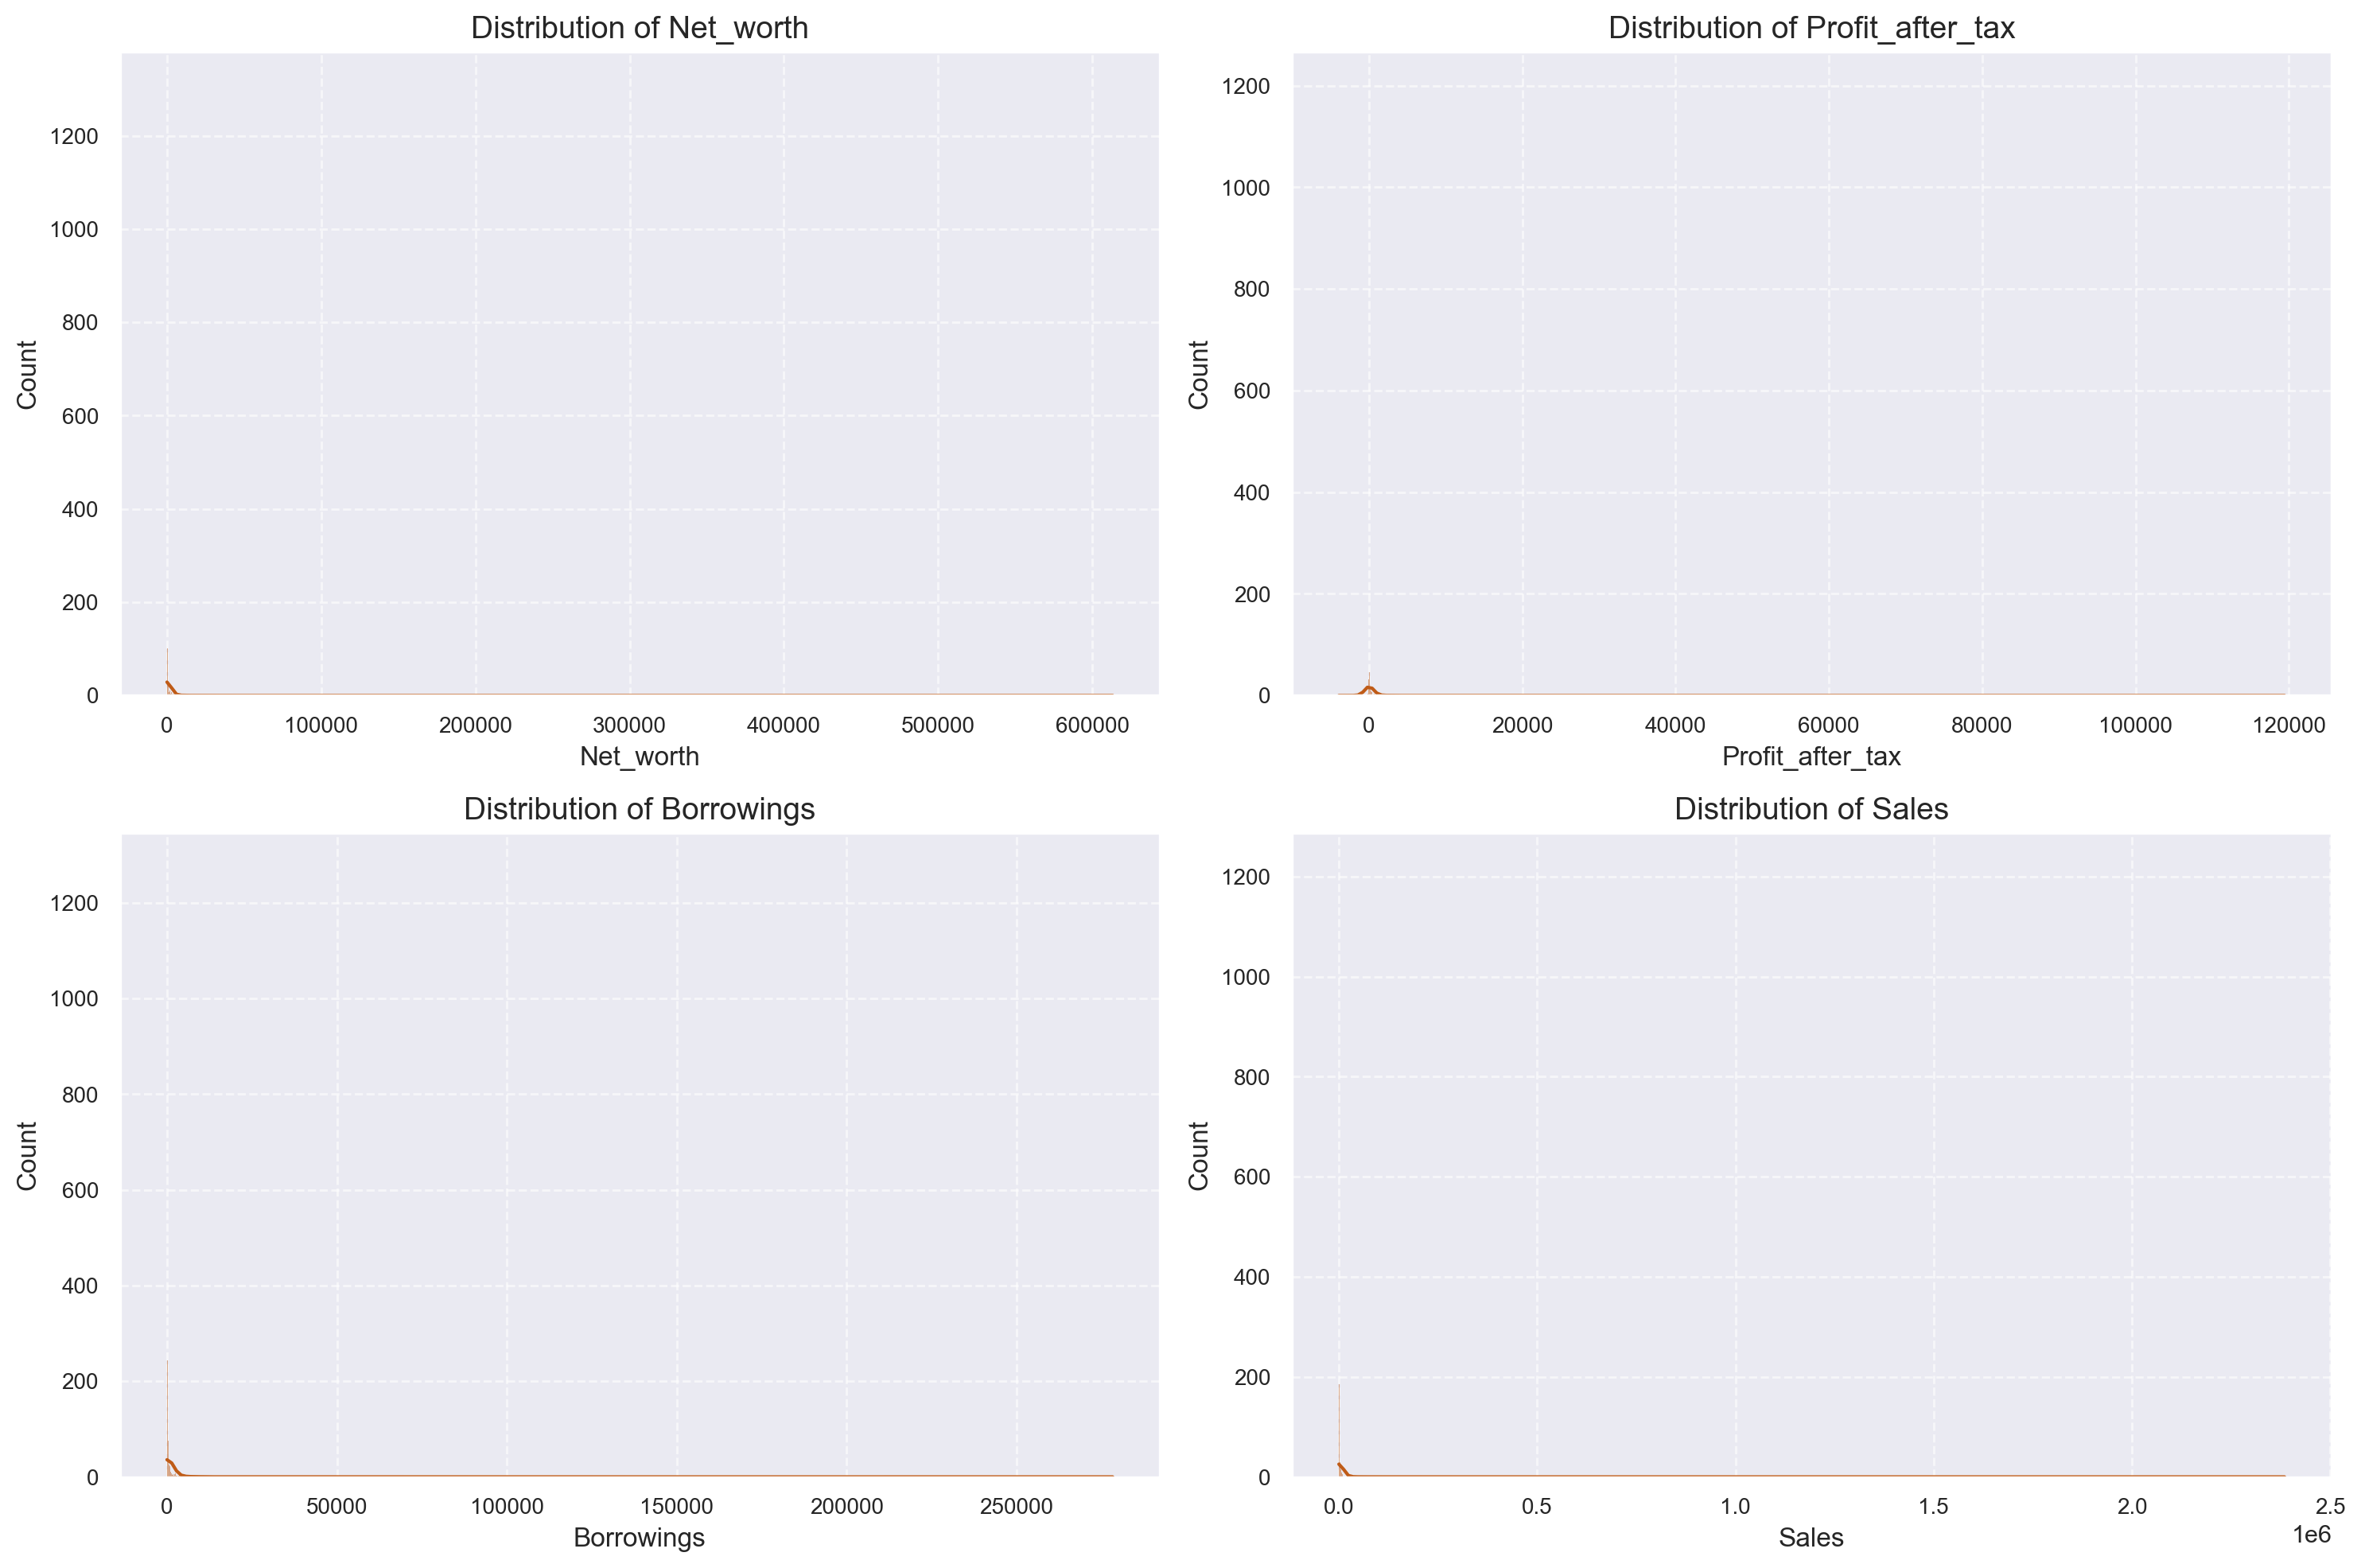

In [43]:


columns_to_plot = ['Net_worth', 'Profit_after_tax', 'Borrowings', 'Sales']

plt.figure(figsize=(15, 10))  # Adjust figure size for better readability

for i, column in enumerate(columns_to_plot):
    plt.subplot(2, 2, i + 1)  # 2 rows, 2 columns, subplot index
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Total_assets', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Total Assets')

Text(0.5, 0, 'Total Assets')

Text(0, 0.5, 'Count')

(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000., 1400000.]),
 [Text(-200000.0, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(200000.0, 0, '0.2'),
  Text(400000.0, 0, '0.4'),
  Text(600000.0, 0, '0.6'),
  Text(800000.0, 0, '0.8'),
  Text(1000000.0, 0, '1.0'),
  Text(1200000.0, 0, '1.2'),
  Text(1400000.0, 0, '1.4')])

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200'),
  Text(0, 1400.0, '1400')])

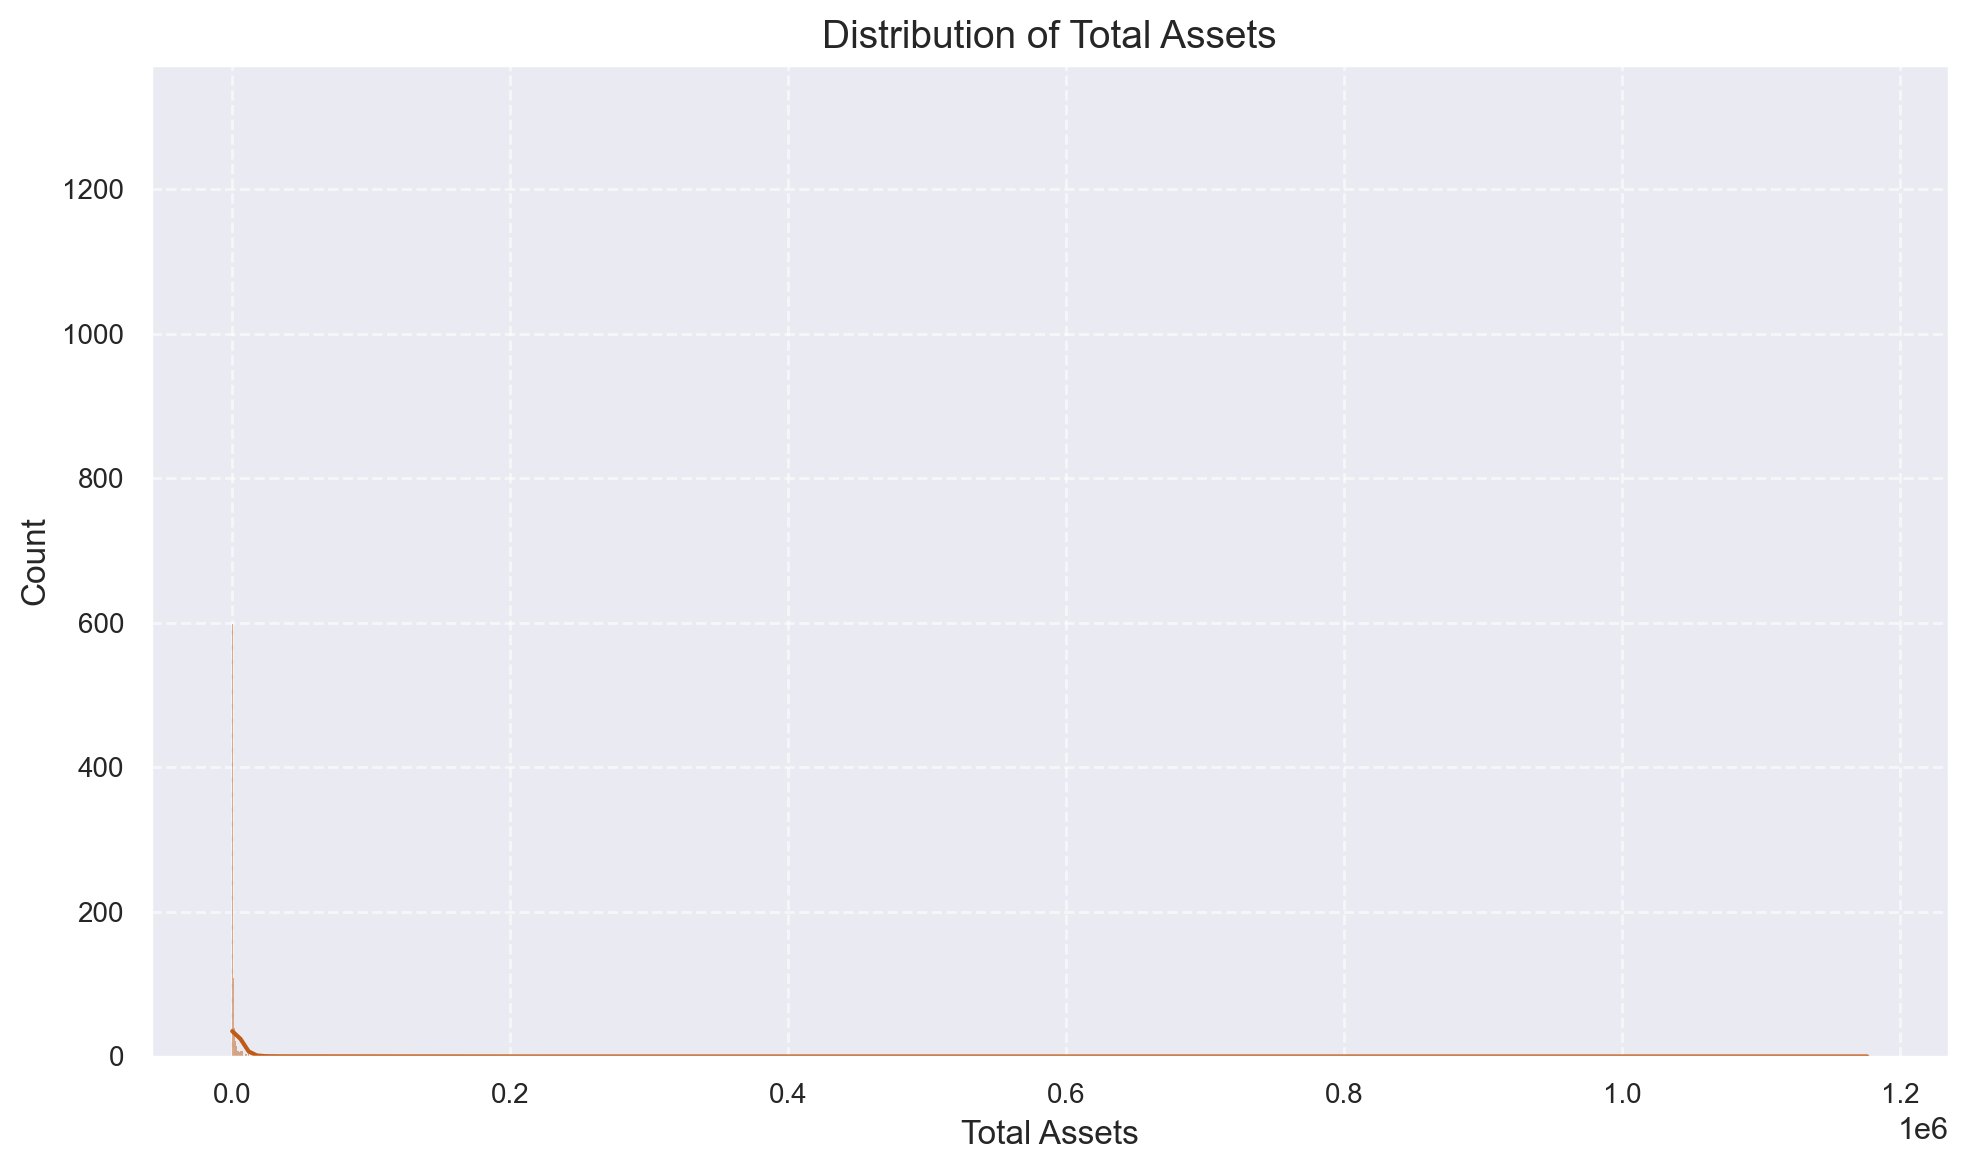

In [44]:

plt.figure(figsize=(10, 6))  # Increase width and height

sns.histplot(df['Total_assets'], kde=True)
plt.title("Distribution of Total Assets", fontsize=14)  # Increase title font size
plt.xlabel("Total Assets", fontsize=12)  # Increase x-axis label font size
plt.ylabel("Count", fontsize=12)    # Increase y-axis label font size
plt.xticks(fontsize=10)             # Increase x-axis tick label font size
plt.yticks(fontsize=10)             # Increase y-axis tick label font size
plt.grid(True, linestyle='--', alpha=0.6) # Add a subtle grid for better readability
plt.tight_layout()                   # Adjust layout to prevent labels from being cut off
plt.show()

<Figure size 1800x1200 with 0 Axes>

<Axes: >

<Axes: ylabel='Cash_profit'>

Text(0.5, 1.0, 'Boxplot of Cash_profit')

Text(0, 0.5, 'Cash_profit')

([0], [Text(0, 0, '')])

(array([-25000.,      0.,  25000.,  50000.,  75000., 100000., 125000.,
        150000., 175000., 200000.]),
 [Text(0, -25000.0, '−25000'),
  Text(0, 0.0, '0'),
  Text(0, 25000.0, '25000'),
  Text(0, 50000.0, '50000'),
  Text(0, 75000.0, '75000'),
  Text(0, 100000.0, '100000'),
  Text(0, 125000.0, '125000'),
  Text(0, 150000.0, '150000'),
  Text(0, 175000.0, '175000'),
  Text(0, 200000.0, '200000')])

<Axes: >

<Axes: ylabel='Net_working_capital'>

Text(0.5, 1.0, 'Boxplot of Net_working_capital')

Text(0, 0.5, 'Net_working_capital')

([0], [Text(0, 0, '')])

(array([-80000., -60000., -40000., -20000.,      0.,  20000.,  40000.,
         60000.,  80000., 100000.]),
 [Text(0, -80000.0, '−80000'),
  Text(0, -60000.0, '−60000'),
  Text(0, -40000.0, '−40000'),
  Text(0, -20000.0, '−20000'),
  Text(0, 0.0, '0'),
  Text(0, 20000.0, '20000'),
  Text(0, 40000.0, '40000'),
  Text(0, 60000.0, '60000'),
  Text(0, 80000.0, '80000'),
  Text(0, 100000.0, '100000')])

<Axes: >

<Axes: ylabel='Current_ratio_times'>

Text(0.5, 1.0, 'Boxplot of Current_ratio_times')

Text(0, 0.5, 'Current_ratio_times')

([0], [Text(0, 0, '')])

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 [Text(0, -100.0, '−100'),
  Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600')])

<Axes: >

<Axes: ylabel='Debt_to_equity_ratio_times'>

Text(0.5, 1.0, 'Boxplot of Debt_to_equity_ratio_times')

Text(0, 0.5, 'Debt_to_equity_ratio_times')

([0], [Text(0, 0, '')])

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.]),
 [Text(0, -100.0, '−100'),
  Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500')])

Text(0.5, 1.02, 'Boxplots of Selected Financial Ratios')

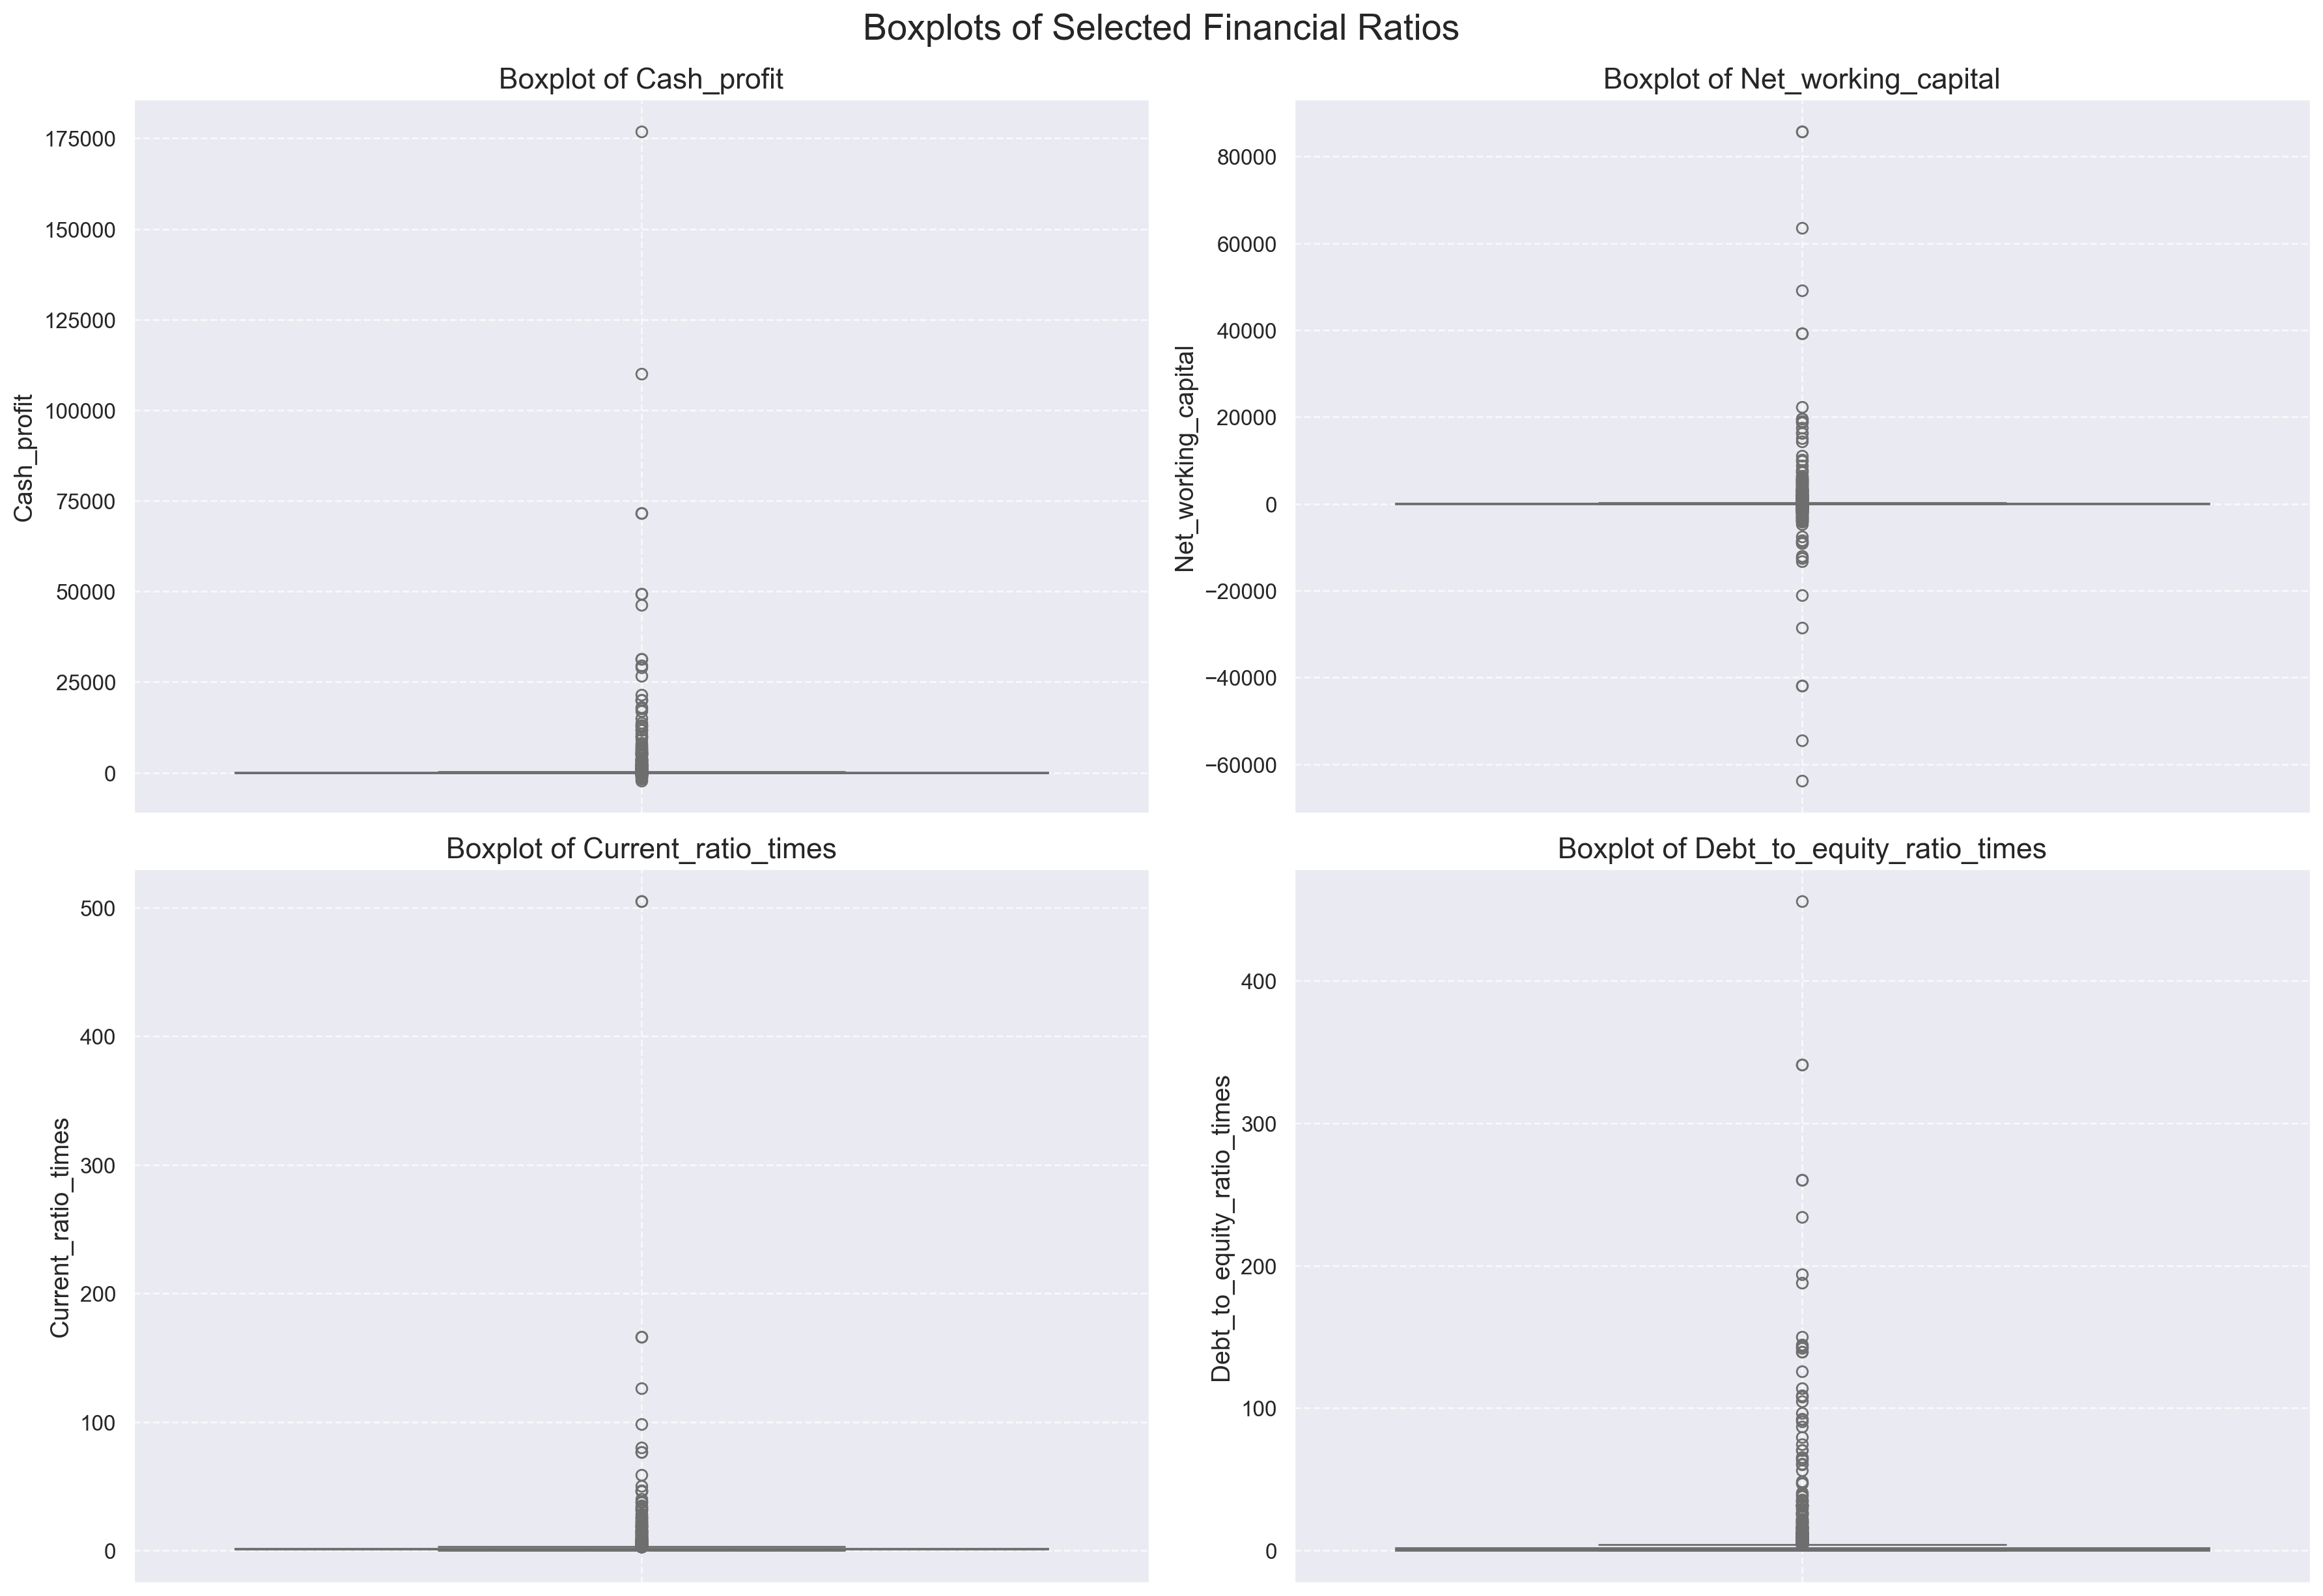

In [45]:

columns_to_plot = ['Cash_profit', 'Net_working_capital', 'Current_ratio_times', 'Debt_to_equity_ratio_times' ]

plt.figure(figsize=(18, 12))  # Increased figure size for better readability

for i, column in enumerate(columns_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[column], color='lightcoral')  # Using y-axis for potentially better readability with many data points
    plt.title(f"Boxplot of {column}", fontsize=16)
    plt.ylabel(column, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

plt.suptitle("Boxplots of Selected Financial Ratios", fontsize=20, y=1.02)
plt.show()

<Figure size 1800x1200 with 0 Axes>

<Axes: >

<Axes: ylabel='Total_income'>

Text(0.5, 1.0, 'Boxplot of Total_income')

Text(0, 0.5, 'Total_income')

([0], [Text(0, 0, '')])

(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.,
        2500000., 3000000.]),
 [Text(0, -500000.0, '−0.5'),
  Text(0, 0.0, '0.0'),
  Text(0, 500000.0, '0.5'),
  Text(0, 1000000.0, '1.0'),
  Text(0, 1500000.0, '1.5'),
  Text(0, 2000000.0, '2.0'),
  Text(0, 2500000.0, '2.5'),
  Text(0, 3000000.0, '3.0')])

Text(0.5, 1.02, 'Boxplots for Total Income')

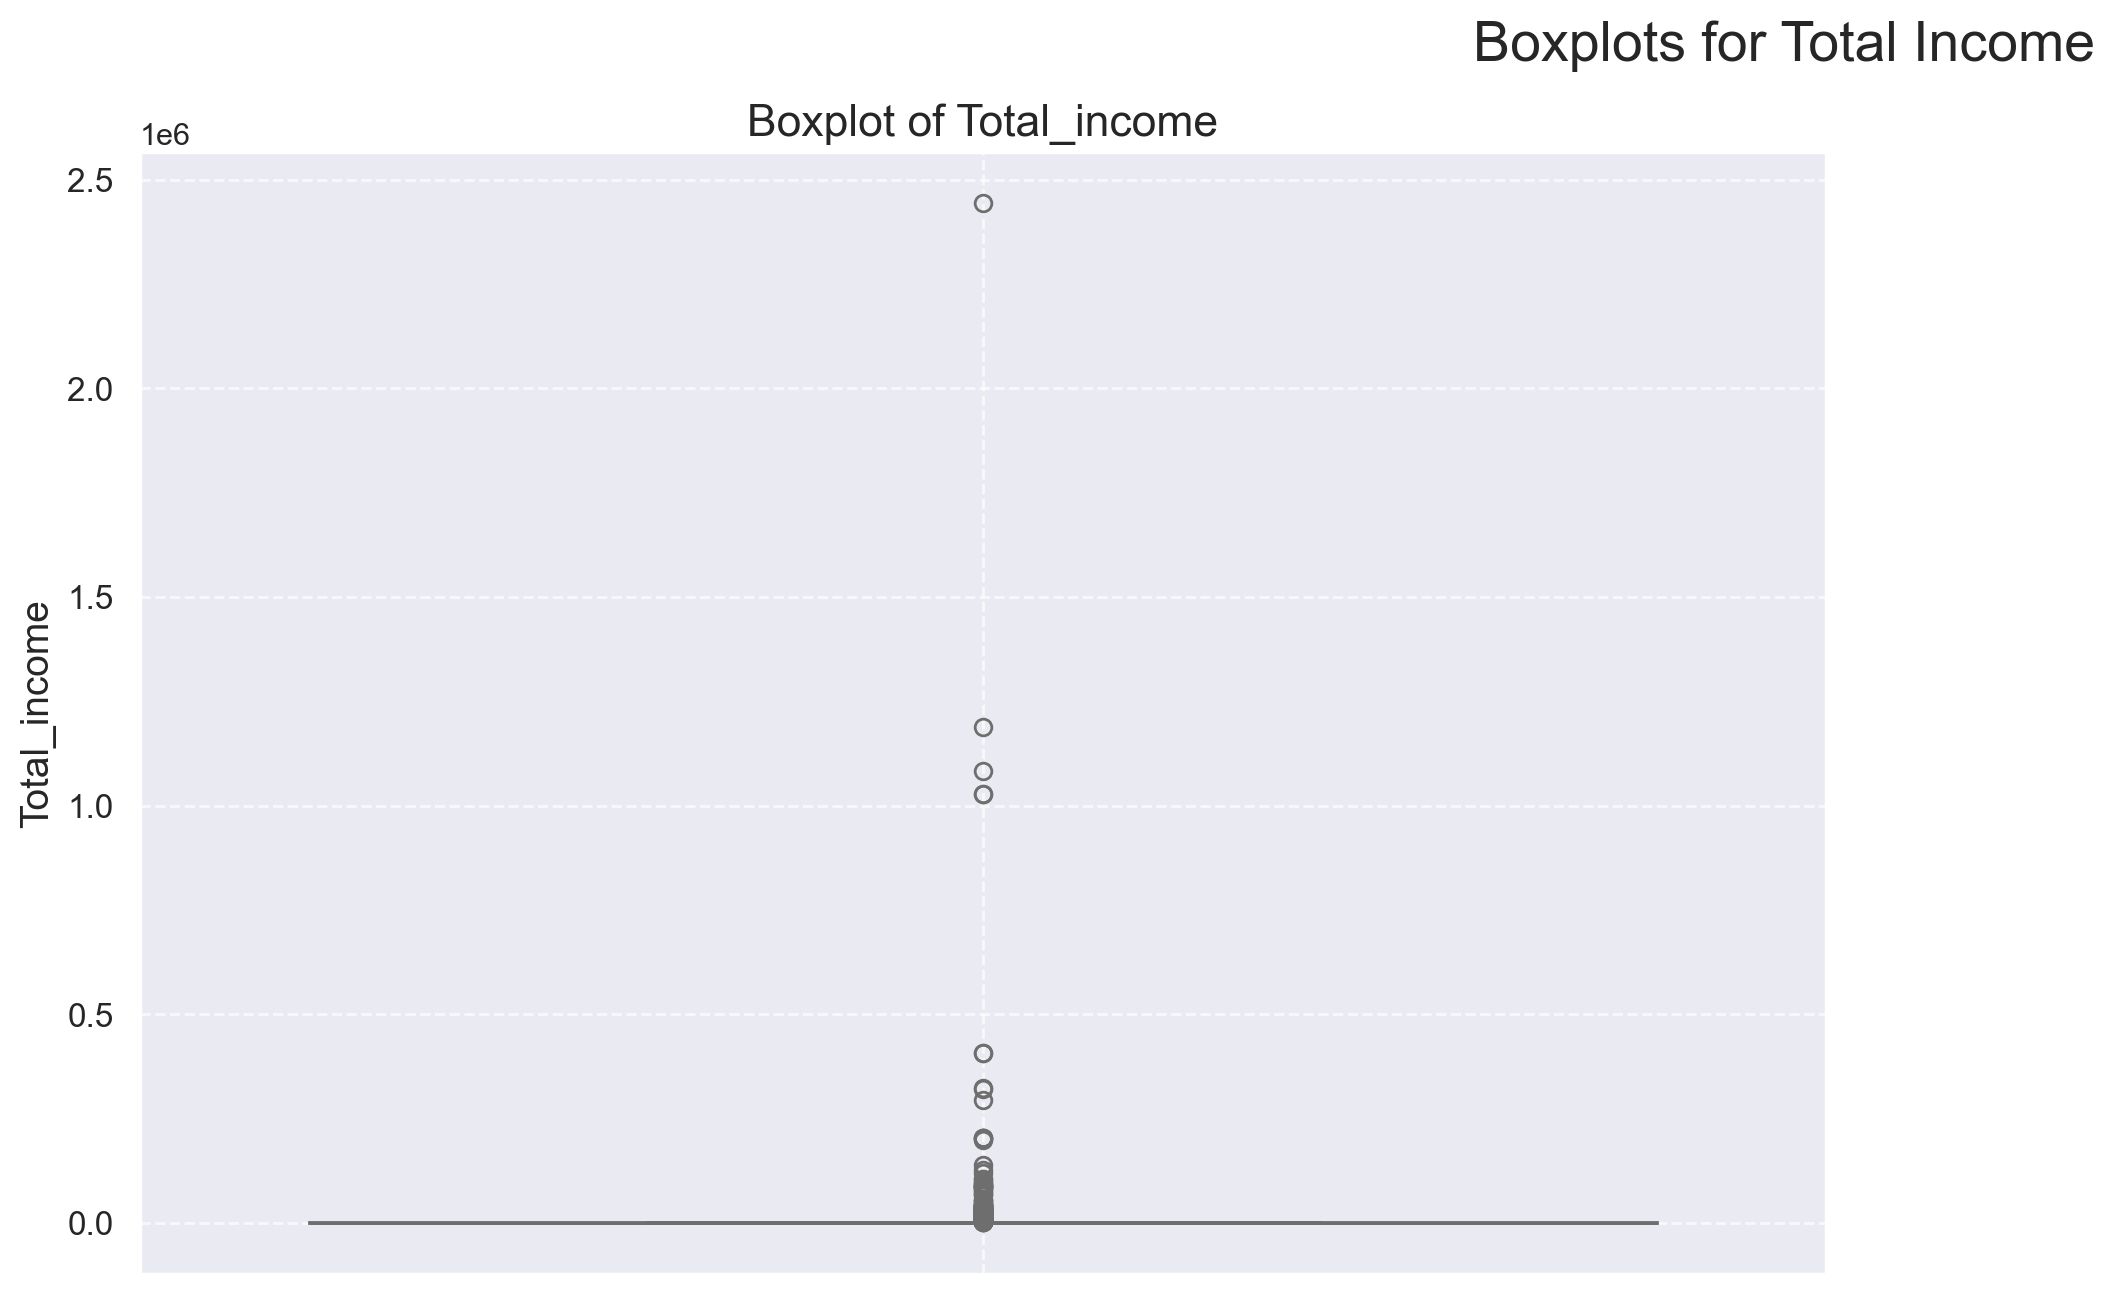

In [13]:

columns_to_plot = ['Total_income' ]

plt.figure(figsize=(18, 12))  # Increased figure size for better readability

for i, column in enumerate(columns_to_plot):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[column], color='lightcoral')  # Using y-axis for potentially better readability with many data points
    plt.title(f"Boxplot of {column}", fontsize=16)
    plt.ylabel(column, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()

plt.suptitle("Boxplots for Total Income", fontsize=20, y=1.02)
plt.show()

**Creating Target/Response Variable**
 0

*We consider 'Networth Next Year' as our Default Variable*

*SO, we call negative values as Default = 1*

*And, positive values as Default = 0*

In [15]:
df_orig = df.copy()
df['default'] = np.where(df['Networth_Next_Year']>=0, 0, 1)
df[['default', 'Networth_Next_Year']].head().to_csv('target_head.csv')
df[['default', 'Networth_Next_Year']].tail().to_csv('target_tail.csv')

In [16]:
df.head()

Networth_Next_Year  Total_assets  Net_worth  Total_income  Change_in_stock  Total_expenses  Profit_after_tax  PBDITA    PBT  Cash_profit  PBDITA_as_perc_of_total_income  PBT_as_perc_of_total_income  PAT_as_perc_of_total_income  Cash_profit_as_perc_of_total_income  PAT_as_perc_of_net_worth   Sales  Income_from_fincial_services  Other_income  Total_capital  Reserves_and_funds  Borrowings  Current_liabilities_&_provisions  Deferred_tax_liability  Shareholders_funds  Cumulative_retained_profits  Capital_employed  TOL_to_TNW  Total_term_liabilities__to__tangible_net_worth  Contingent_liabilities__to__Net_worth_perc  Contingent_liabilities  Net_fixed_assets  Investments  Current_assets  Net_working_capital  Quick_ratio_times  Current_ratio_times  Debt_to_equity_ratio_times  Cash_to_current_liabilities_times  Cash_to_average_cost_of_sales_per_day  Creditors_turnover  Debtors_turnover  Finished_goods_turnover  WIP_turnover  Raw_material_turnover    EPS  Adjusted_EPS  Total_liabilities  PE_on_BSE  default
0               395.3         827.6      336.5         534.1             13.5           508.7              38.9   124.4   64.6         95.2                           23.29                        12.10                         7.28                                17.82                     12.27   533.5                           0.6           NaN           87.6               249.0       390.7                              43.9                    56.4               336.5                        248.9             727.2        1.28                                            0.99                                      186.21                   626.6             461.1         18.1           257.6                163.1               0.99                 2.52                        1.16                               0.06                                   5.41               11.60              5.65                     3.99          3.37                  14.87   4.44          4.44              827.6        NaN        0
1                36.2          67.7       24.3         137.9             -3.7           131.0               3.2     5.5    1.0          3.8                            3.99                         0.73                         2.32                                 2.76                      0.00   135.5                           NaN           0.2           11.9                 4.3        16.6                              23.7                     3.1                24.3                         -8.2              40.9        1.53                                            0.21                                       47.74                    11.6              18.5          0.2            39.0                  3.9               0.67                 1.11                        0.68                               0.02                                   1.62                 NaN               NaN                      NaN           NaN                    NaN   0.00          0.00               67.7        NaN        0
2                84.0         238.4       78.9         331.2            -18.1           309.2               3.9    25.8   10.5          9.4                            7.79                         3.17                         1.18                                 2.84                      5.07   330.6                           0.6           NaN           25.0                56.7        44.7                             102.2                     9.8                78.9                         53.1             123.6        1.70                                            0.33                                       30.42                    24.0              56.8          0.2           158.3                 38.3               1.11                 1.31                        0.57                               0.19                                  26.42                2.24              2.51                    17.67          8.76                   8.35   0

<Axes: xlabel='default', ylabel='count'>

Text(0.5, 1.0, 'Distribution of Defaulters')

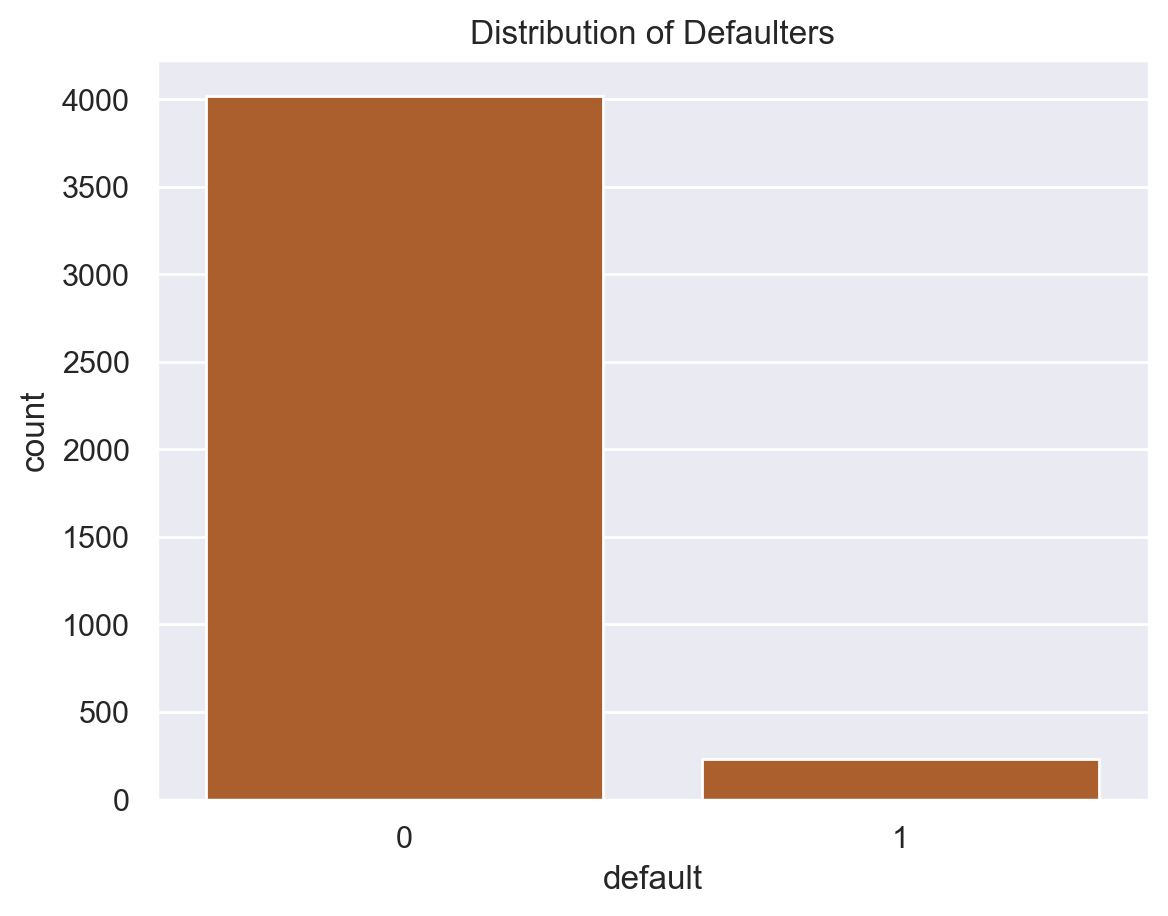

In [18]:
# Assuming you're converting 'Networth Next Year' into a classification ('Defaulter' or 'Not Defaulter')
sns.countplot(x='default', data=df)
plt.title("Distribution of Defaulters")
plt.show()


<Figure size 1500x1000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix of Financial Metrics')

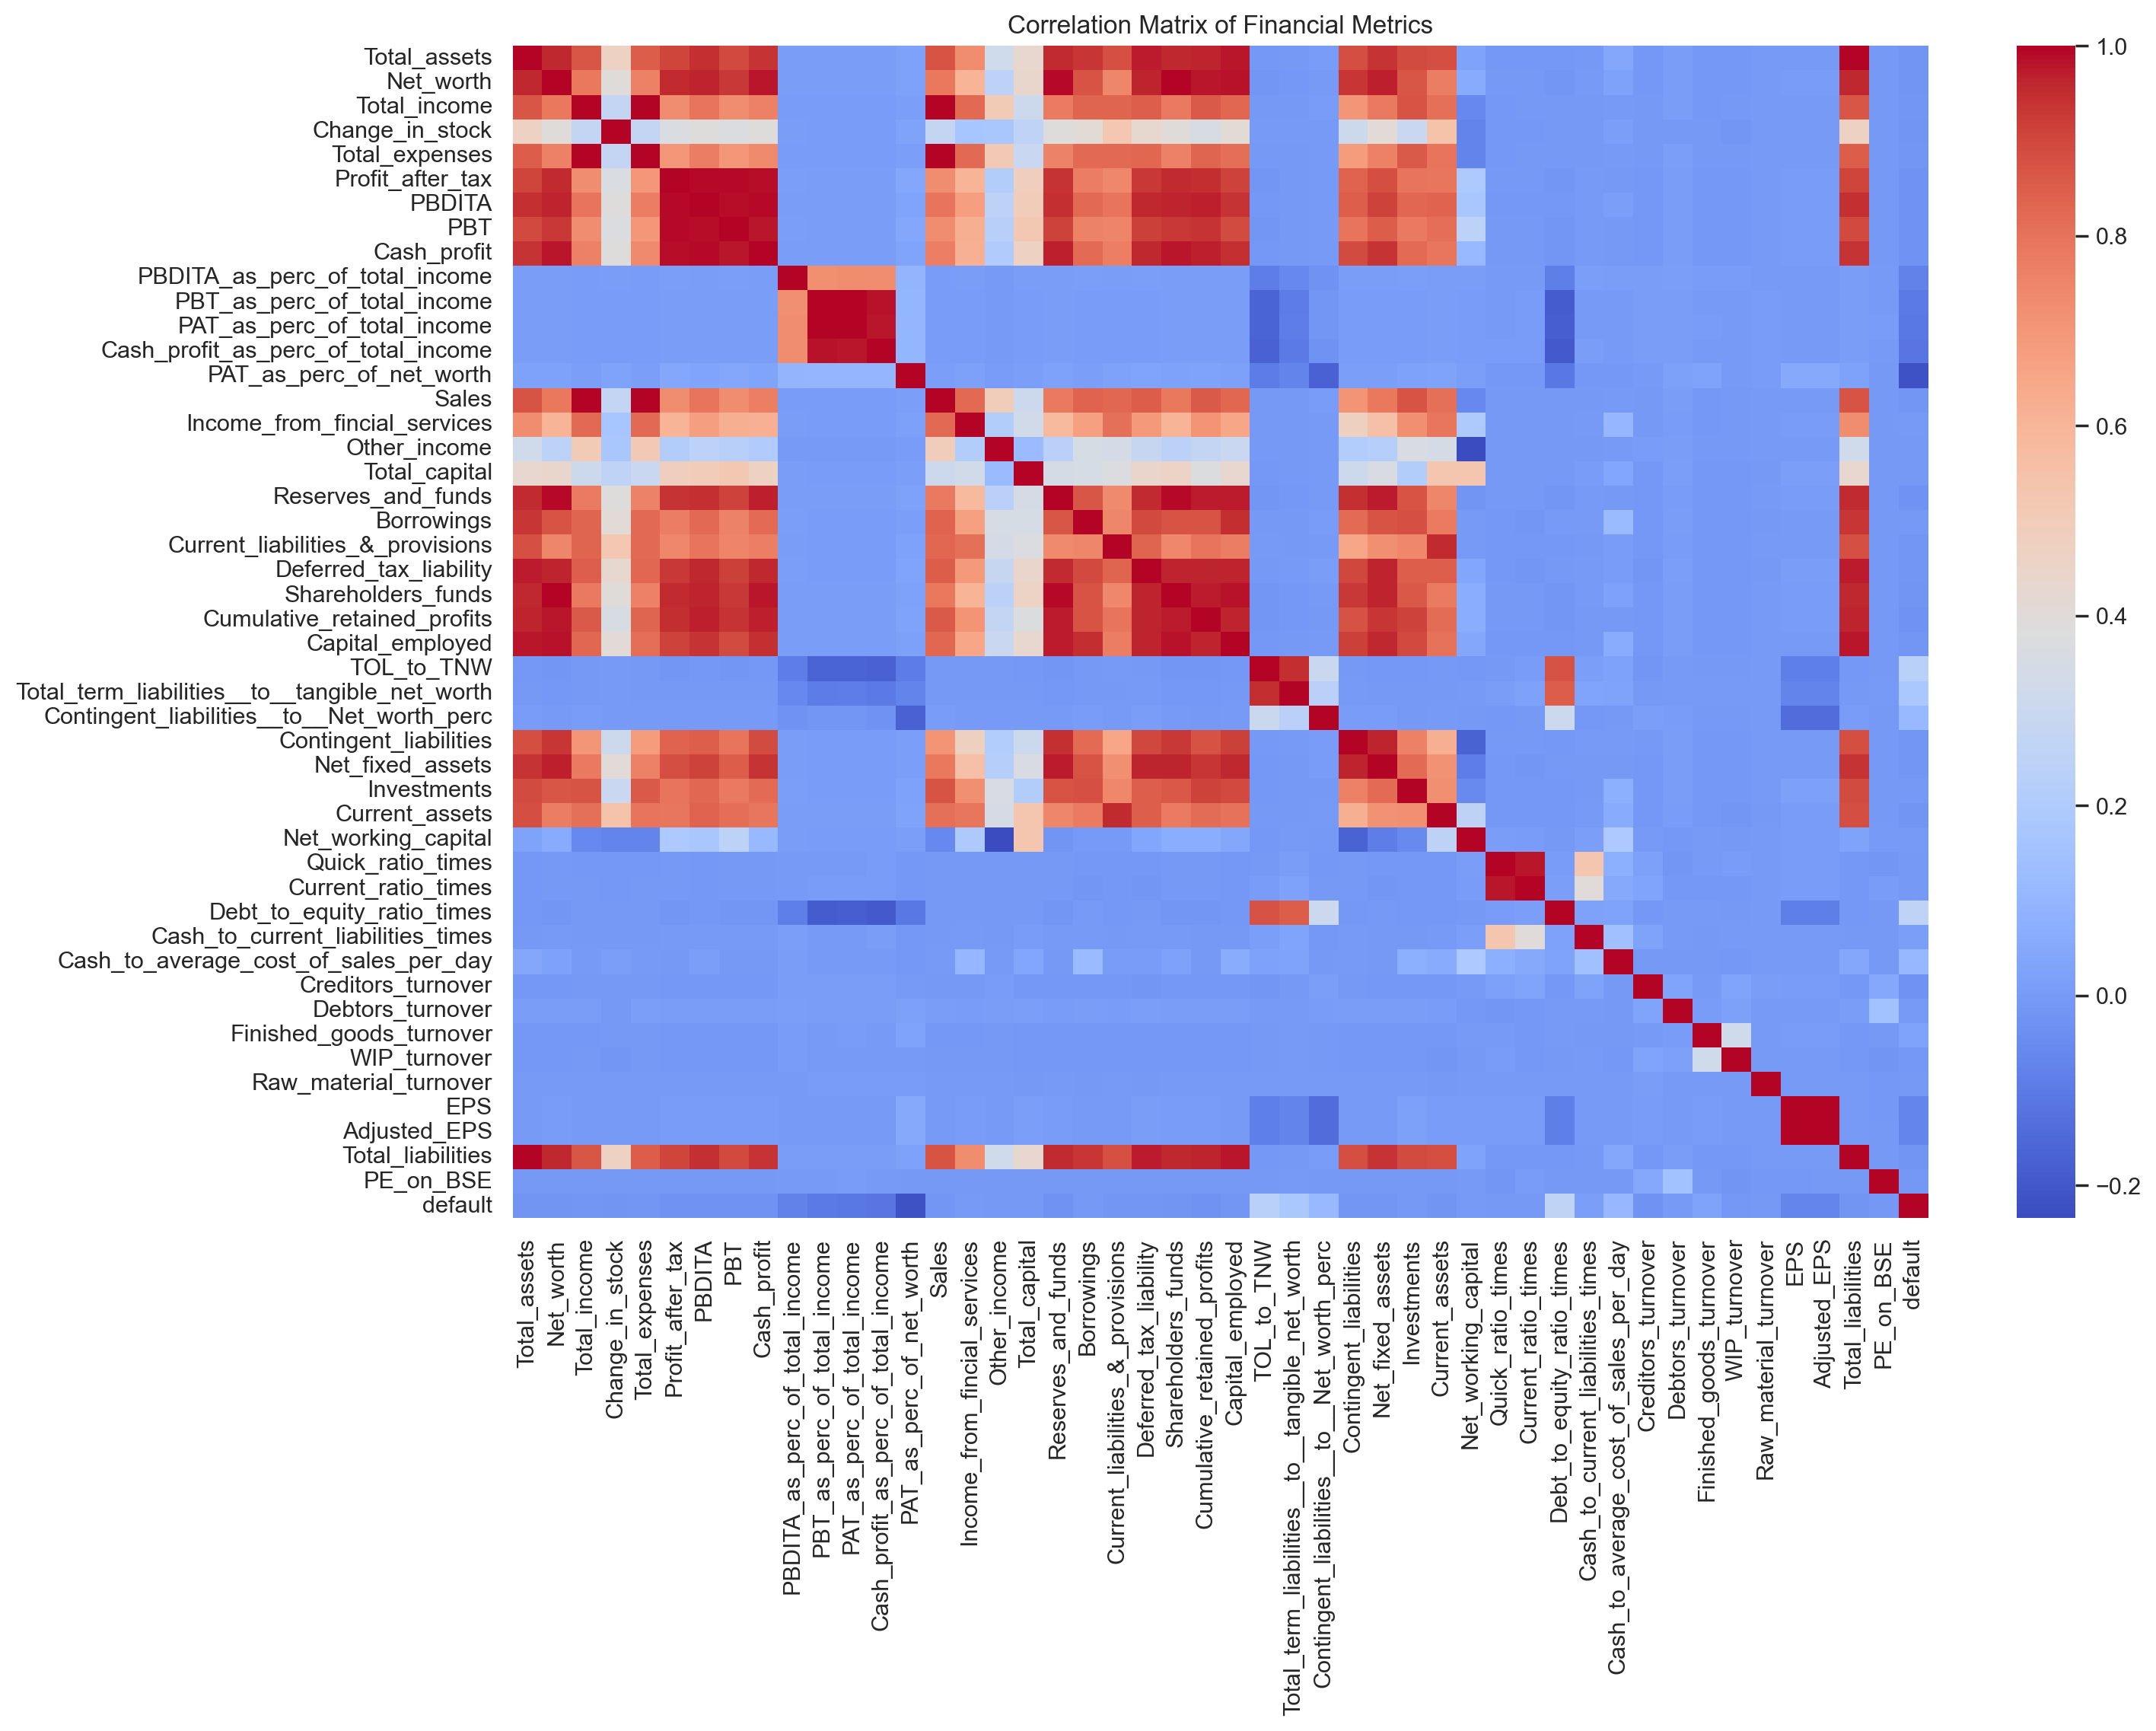

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, fmt='.2f')
plt.title("Correlation Matrix of Financial Metrics")
plt.show()


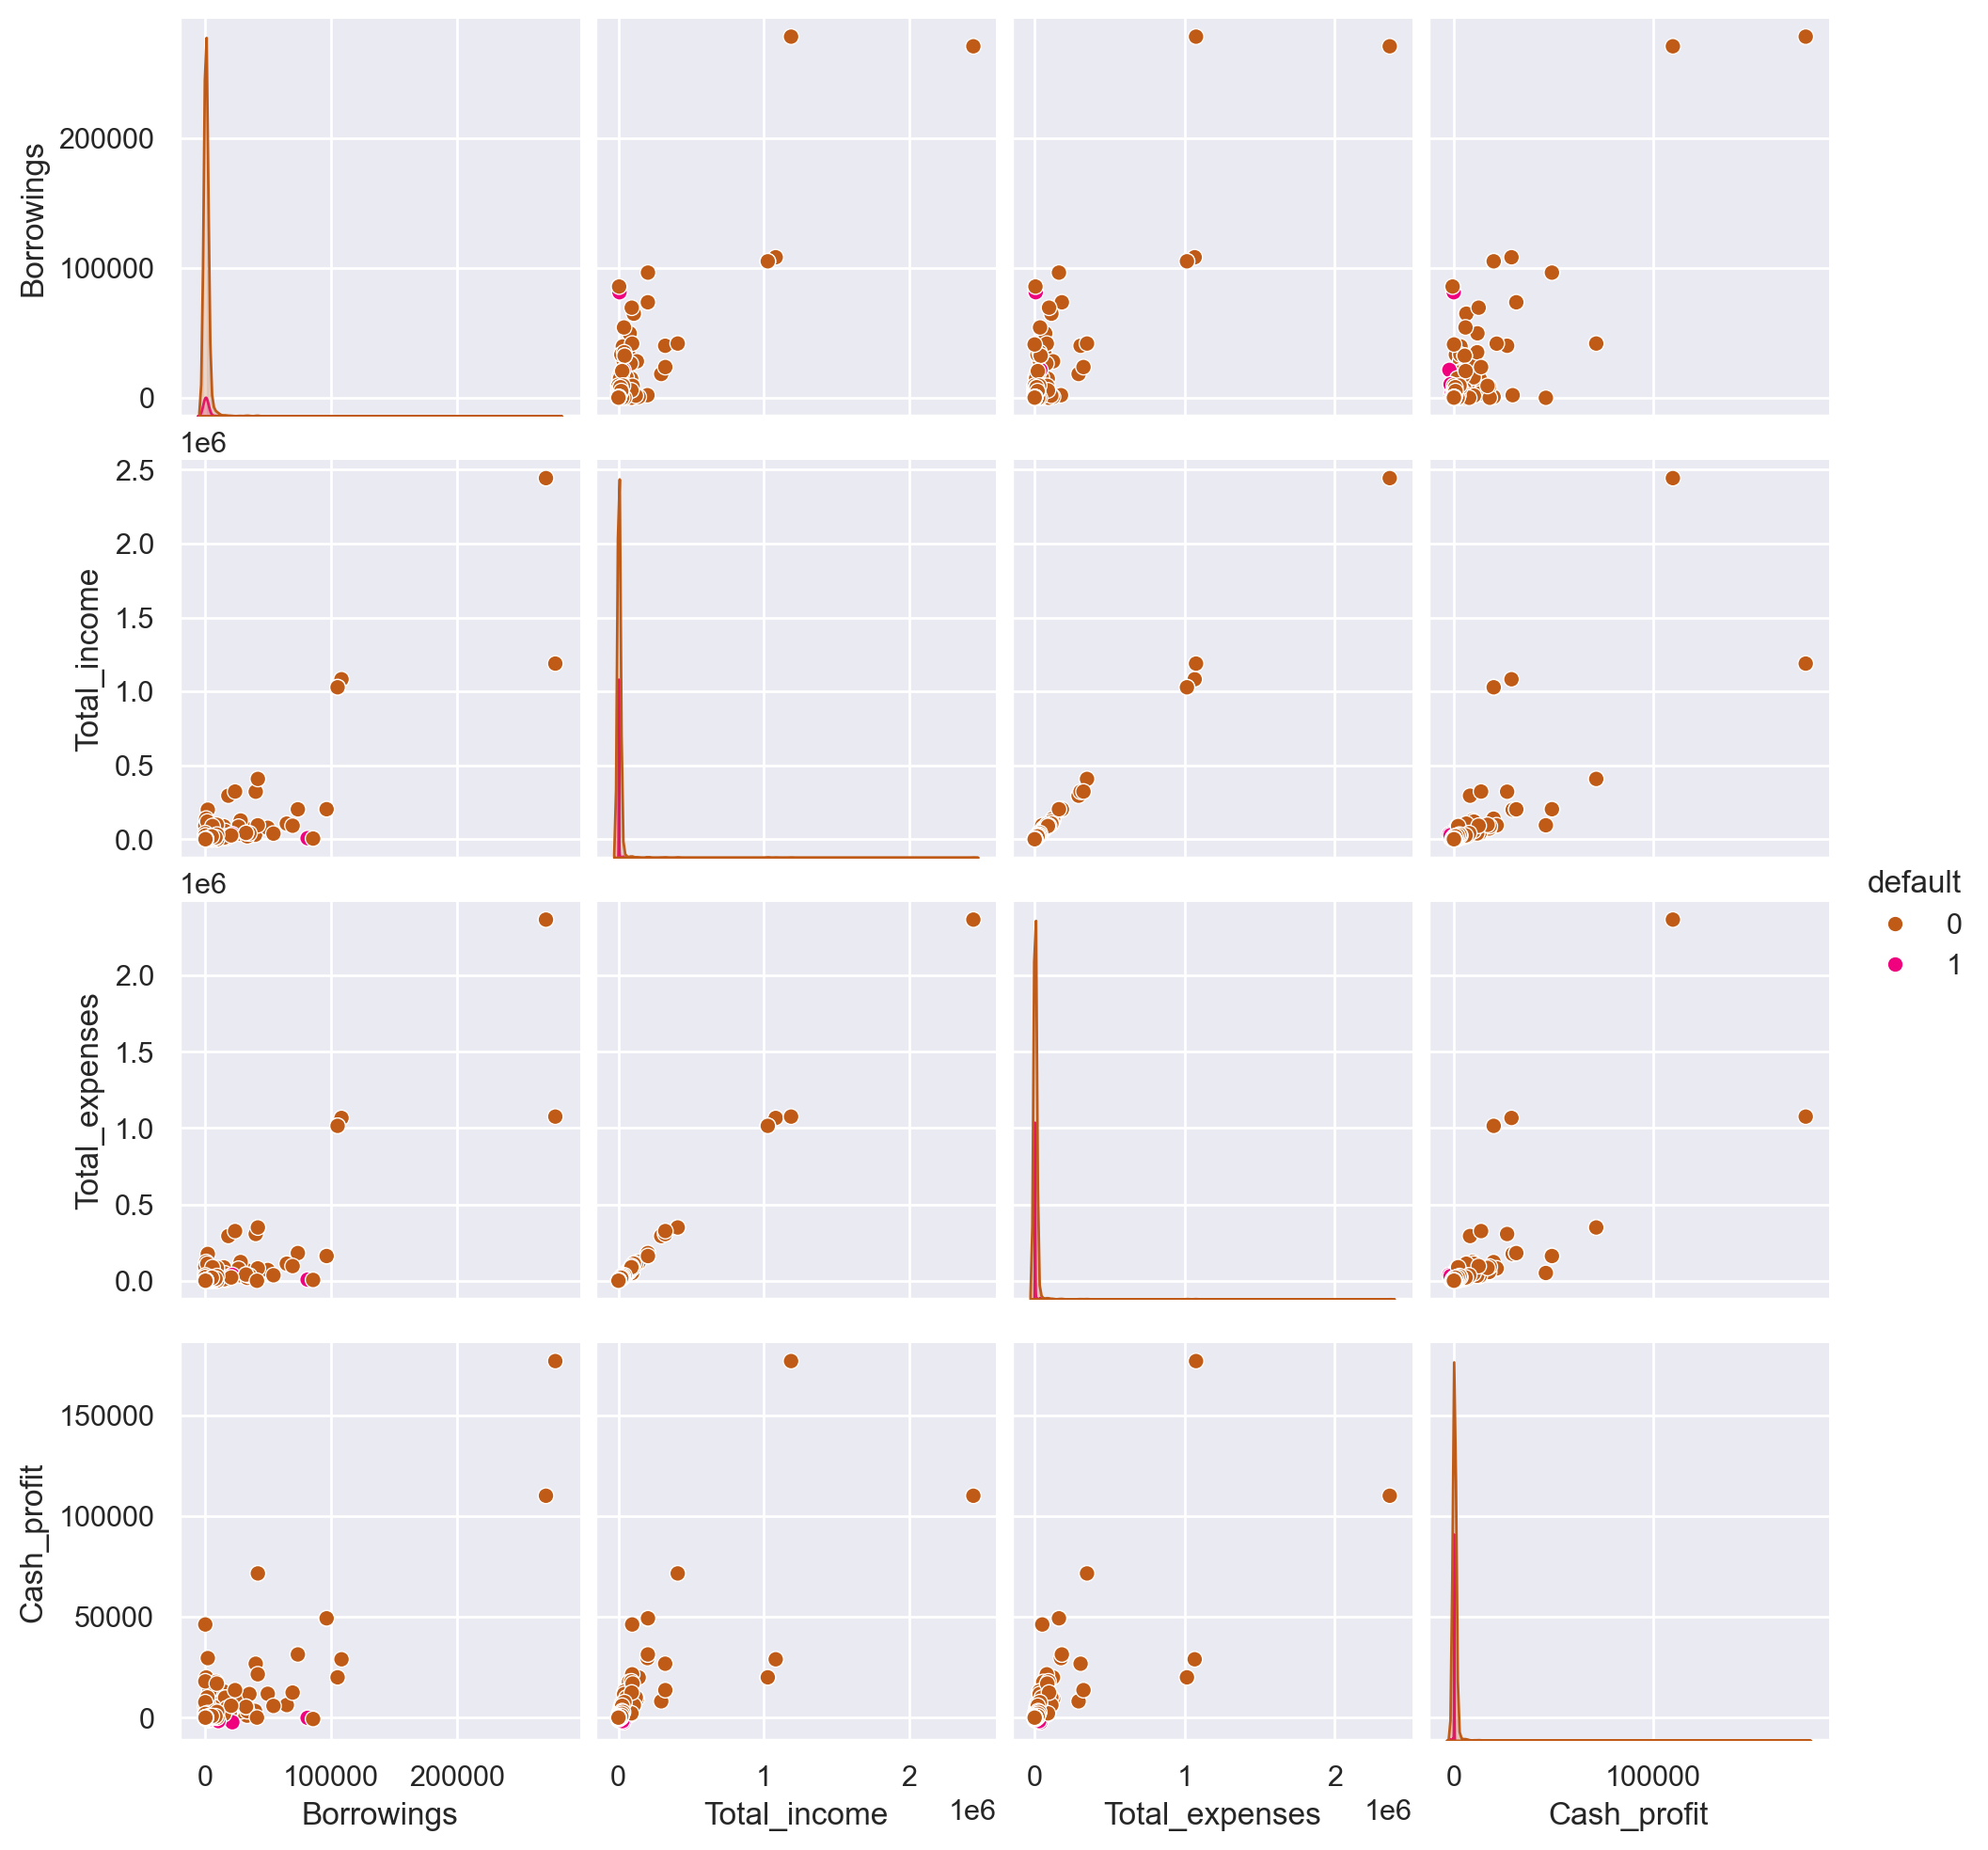

In [20]:
sns.pairplot(df[[ 'Borrowings', 'Total_income', 'Total_expenses', 'Cash_profit', 'default']], hue='default')
plt.show()


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='default', ylabel='Cash_profit'>

Text(0.5, 1.0, 'Distribution of Cash Profit by Defaulter Status')

Text(0.5, 0, 'Defaulter Status (0: Non-Defaulter, 1: Defaulter)')

Text(0, 0.5, 'Cash Profit')

Text(0, 1022.65, 'Median: 22.65')

Text(1, 997.3, 'Median: -2.70')

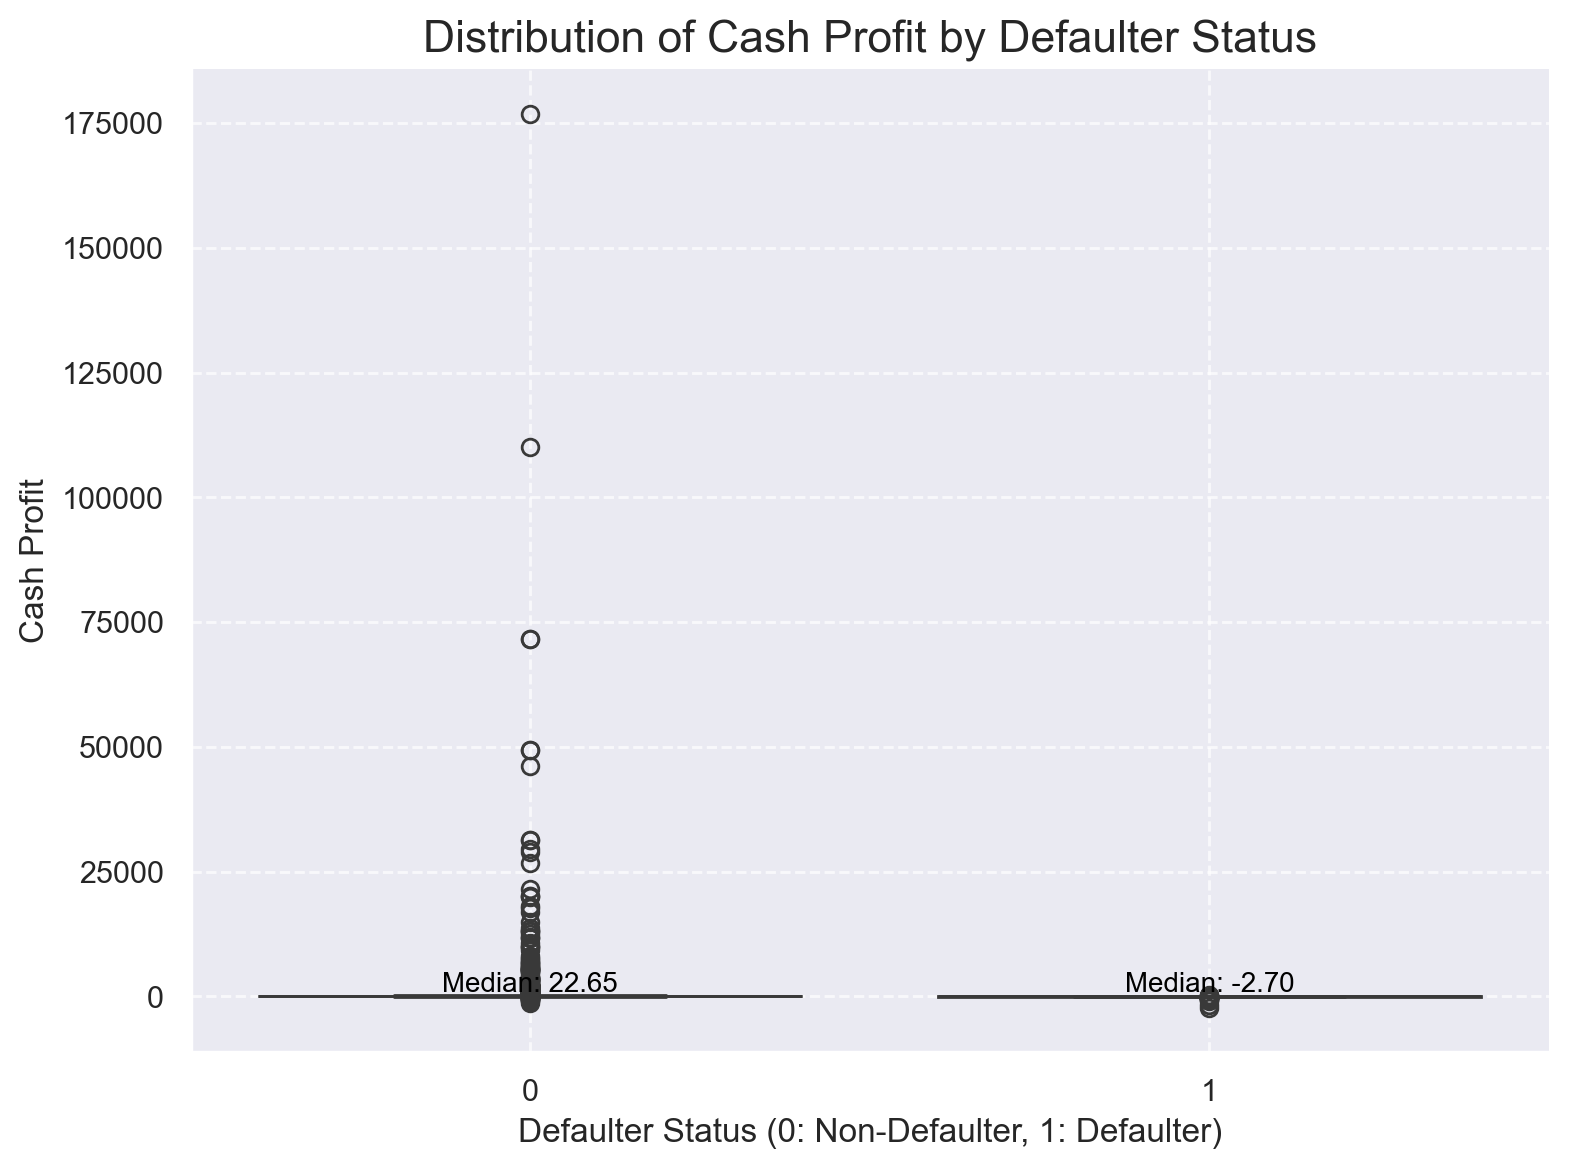

In [15]:


plt.figure(figsize=(8, 6))  # Adjust figure size for better visibility

# Create the boxplot with hue for better comparison and vibrant colors
sns.boxplot(x='default', y='Cash_profit', data=df, palette="viridis", hue='default', legend=False)

# Add more informative labels and title
plt.title("Distribution of Cash Profit by Defaulter Status", fontsize=16)
plt.xlabel("Defaulter Status (0: Non-Defaulter, 1: Defaulter)", fontsize=12)
plt.ylabel("Cash Profit", fontsize=12)

# Customize the appearance
plt.grid(True, linestyle='--', alpha=0.7)
sns.despine() # Remove top and right spines for a cleaner look

# Add annotations (optional, but can be informative if you have specific points to highlight)
# Example: Median cash profit for each group
medians = df.groupby('default')['Cash_profit'].median().values
median_labels = [f"Median: {m:.2f}" for m in medians]
pos = range(len(medians))
for tick, label in zip(pos, median_labels):
    plt.text(pos[tick], medians[tick] + 1000, label, horizontalalignment='center', size='small', color='black') # Adjust vertical offset as needed

plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='default', ylabel='Debt_to_equity_ratio_times'>

Text(0.5, 1.0, 'Debt to Equity Ratio Distribution by Defaulter Status')

Text(0.5, 0, 'Defaulter Status (0: Non-Defaulter, 1: Defaulter)')

Text(0, 0.5, 'Debt to Equity Ratio (Times)')

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 [Text(0, -100.0, '−100'),
  Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600')])

([<matplotlib.axis.XTick at 0x290361c38f0>,
 [Text(0, 0, 'Non-Defaulter (0)'), Text(1, 0, 'Defaulter (1)')])

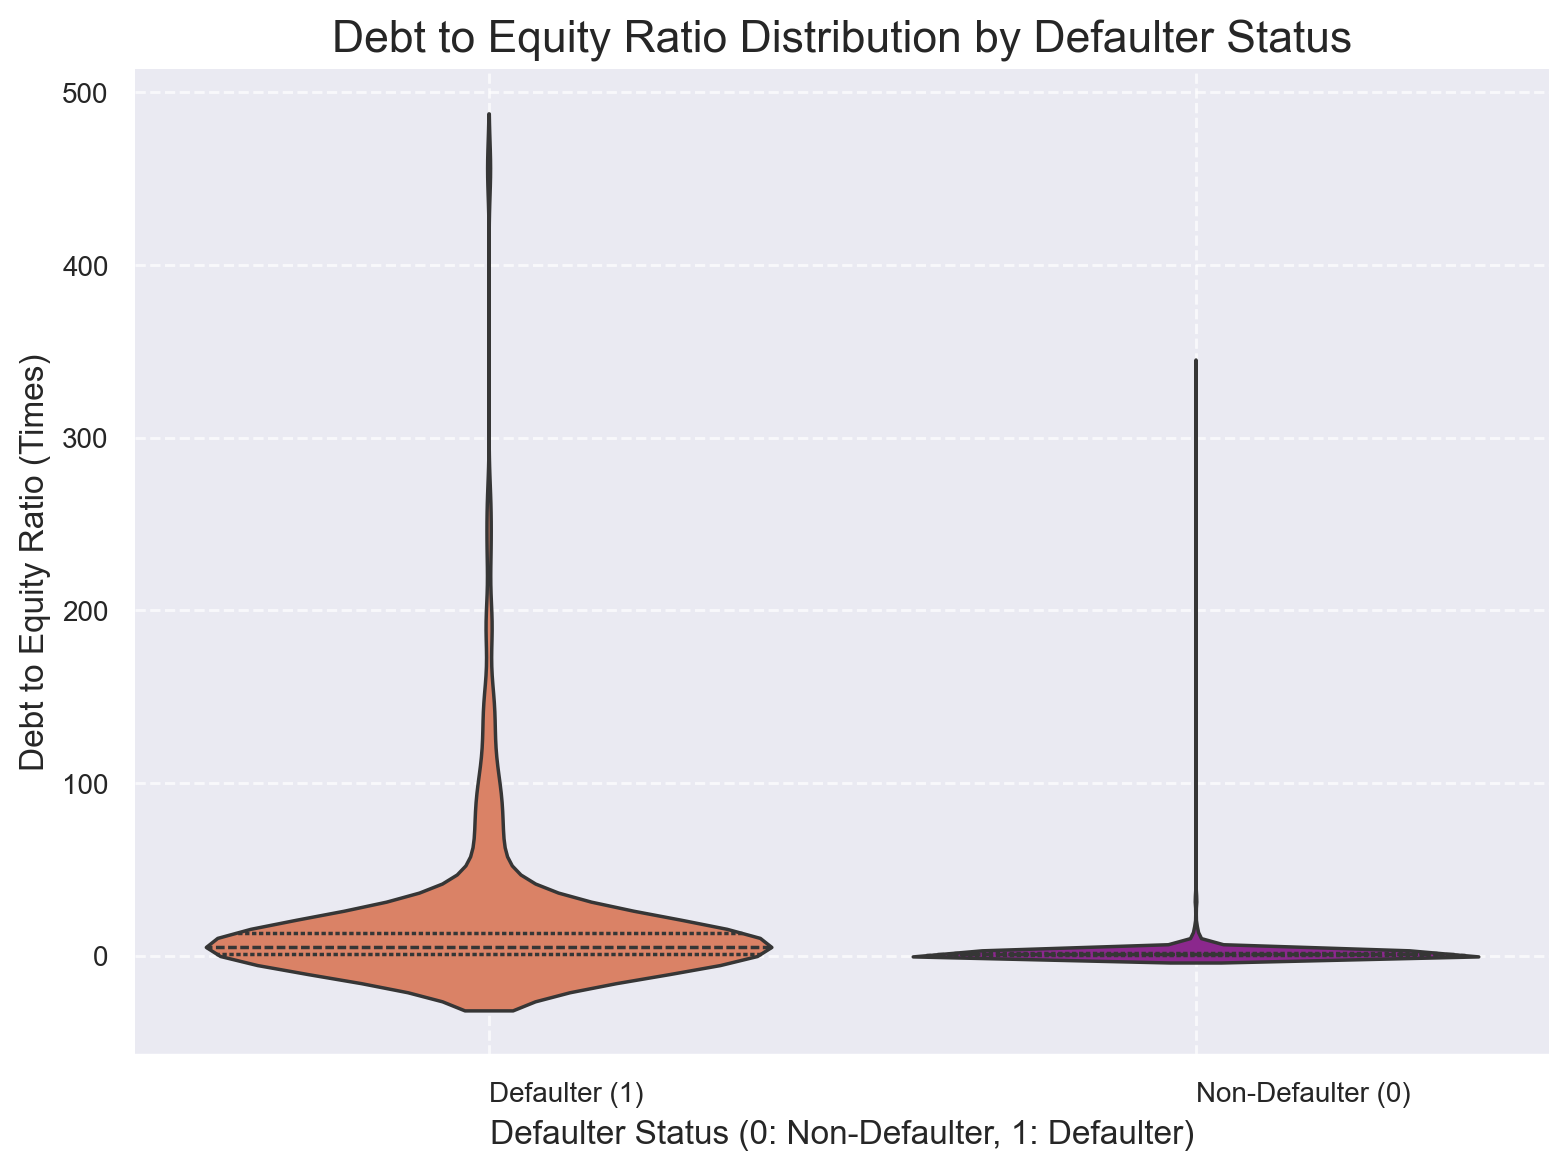

In [16]:

plt.figure(figsize=(8, 6))

# Create the violin plot with a vibrant palette
sns.violinplot(x='default', y='Debt_to_equity_ratio_times', data=df, palette="plasma", inner="quartile")

# Add informative labels and title
plt.title("Debt to Equity Ratio Distribution by Defaulter Status", fontsize=16)
plt.xlabel("Defaulter Status (0: Non-Defaulter, 1: Defaulter)", fontsize=12)
plt.ylabel("Debt to Equity Ratio (Times)", fontsize=12)

# Customize appearance
plt.grid(True, linestyle='--', alpha=0.7)
sns.despine(left=True)

# Rotate the violins (this part needs a different approach)
plt.gca().invert_xaxis() # Invert x-axis to effectively rotate violins

# Customize ticks
plt.yticks(fontsize=10)
plt.xticks([0, 1], ["Non-Defaulter (0)", "Defaulter (1)"], fontsize=10, ha='left') # Adjust labels

plt.tight_layout()
plt.show()

<Figure size 1000x700 with 0 Axes>

<Axes: xlabel='Net_worth', ylabel='Borrowings'>

Text(0.5, 1.0, 'Net Worth vs Borrowings by Defaulter Status')

Text(0.5, 0, 'Net Worth')

Text(0, 0.5, 'Borrowings')

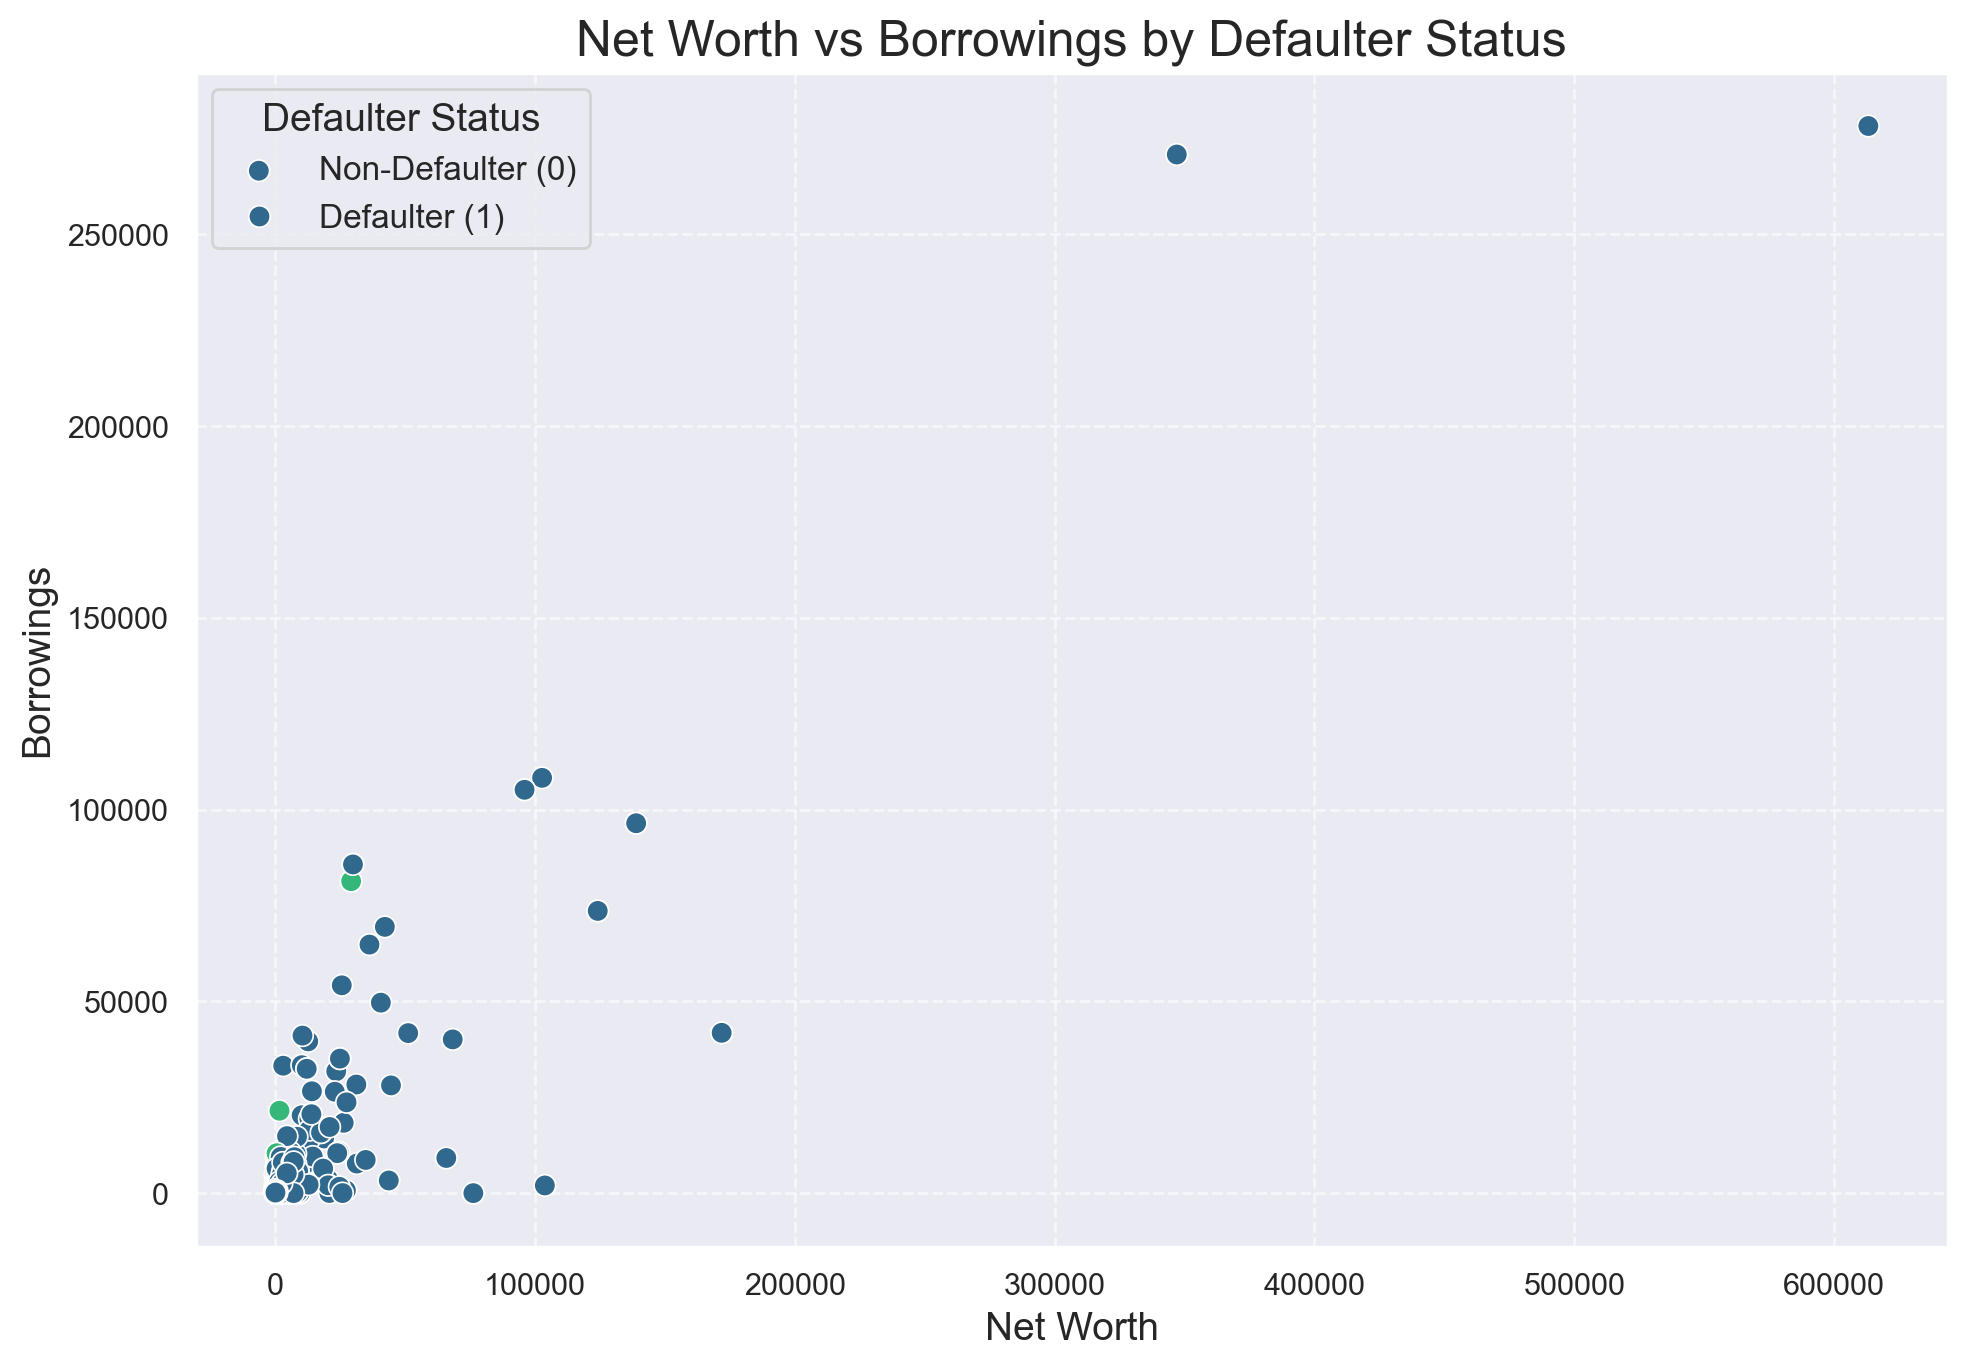

In [19]:


plt.figure(figsize=(10, 7))

# Create the scatter plot with a vibrant palette and increased marker size
sns.scatterplot(x='Net_worth', y='Borrowings', hue='default', data=df, palette="viridis", s=60)

# Add informative labels and title with increased font sizes
plt.title("Net Worth vs Borrowings by Defaulter Status", fontsize=18)
plt.xlabel("Net Worth", fontsize=14)
plt.ylabel("Borrowings", fontsize=14)

# Customize the legend
plt.legend(title="Defaulter Status", labels=['Non-Defaulter (0)', 'Defaulter (1)'], fontsize=12, title_fontsize=14)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Improve layout
plt.tight_layout()
plt.show()

<Axes: xlabel='de_ratio_bin', ylabel='count'>

Text(0.5, 1.0, 'Debt to Equity Ratio Binned vs Defaulter Count')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '(-1.0, 0.5]'),
  Text(1, 0, '(0.5, 1.0]'),
  Text(2, 0, '(1.0, 2.0]'),
  Text(3, 0, '(2.0, 5.0]'),
  Text(4, 0, '(5.0, 10.0]'),
  Text(5, 0, '(10.0, 100.0]')])

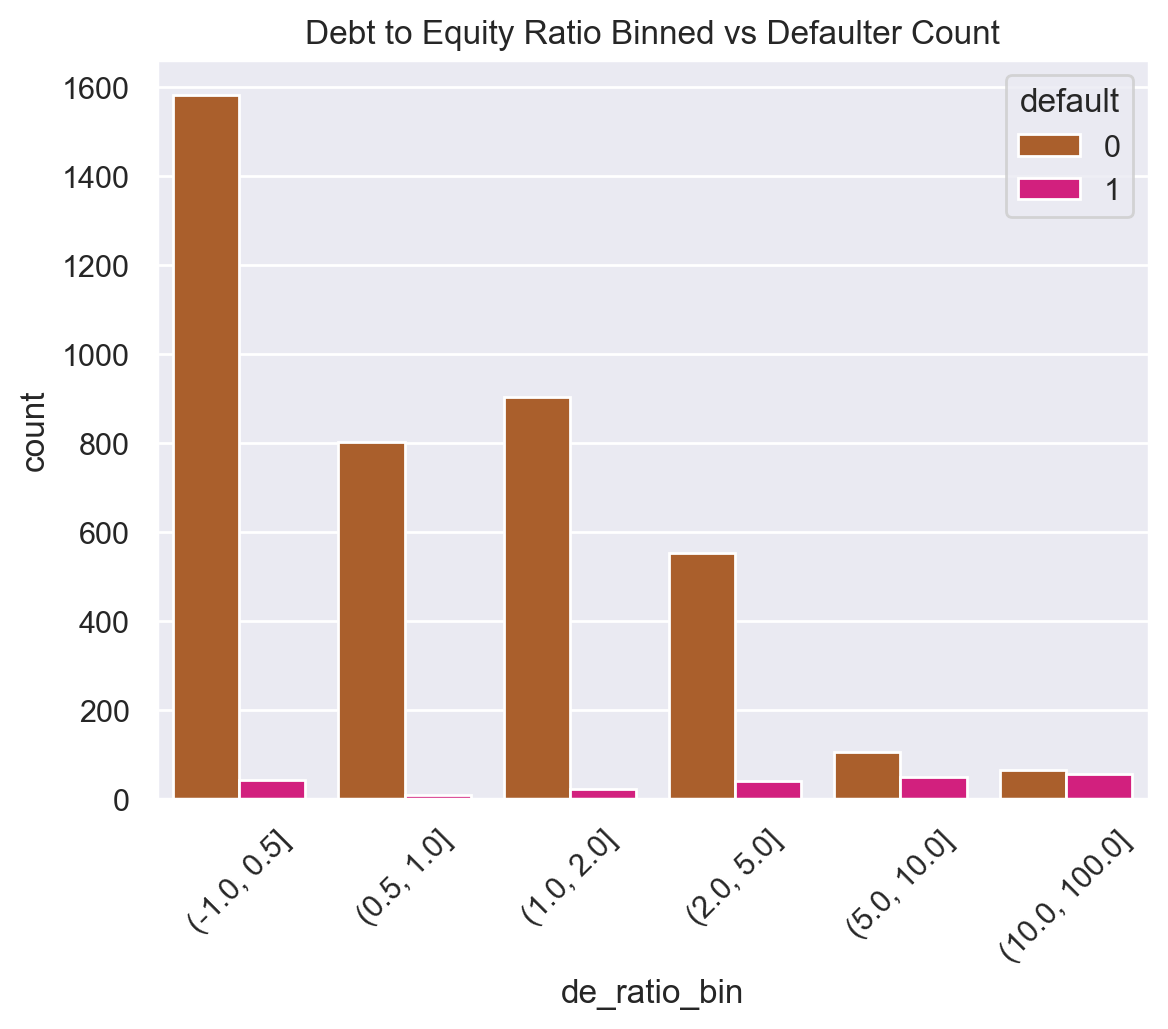

In [23]:
# Categorize a ratio column into bins and compare with target
df['de_ratio_bin'] = pd.cut(df['Debt_to_equity_ratio_times'], bins=[-1, 0.5, 1, 2, 5, 10, 100])
sns.countplot(x='de_ratio_bin', hue='default', data=df)
plt.title("Debt to Equity Ratio Binned vs Defaulter Count")
plt.xticks(rotation=45)
plt.show()


In [19]:
df.head()

Networth_Next_Year  Total_assets  Net_worth  Total_income  Change_in_stock  Total_expenses  Profit_after_tax  PBDITA    PBT  Cash_profit  PBDITA_as_perc_of_total_income  PBT_as_perc_of_total_income  PAT_as_perc_of_total_income  Cash_profit_as_perc_of_total_income  PAT_as_perc_of_net_worth   Sales  Income_from_fincial_services  Other_income  Total_capital  Reserves_and_funds  Borrowings  Current_liabilities_&_provisions  Deferred_tax_liability  Shareholders_funds  Cumulative_retained_profits  Capital_employed  TOL_to_TNW  Total_term_liabilities__to__tangible_net_worth  Contingent_liabilities__to__Net_worth_perc  Contingent_liabilities  Net_fixed_assets  Investments  Current_assets  Net_working_capital  Quick_ratio_times  Current_ratio_times  Debt_to_equity_ratio_times  Cash_to_current_liabilities_times  Cash_to_average_cost_of_sales_per_day  Creditors_turnover  Debtors_turnover  Finished_goods_turnover  WIP_turnover  Raw_material_turnover    EPS  Adjusted_EPS  Total_liabilities  PE_on_BSE  default
0               395.3         827.6      336.5         534.1             13.5           508.7              38.9   124.4   64.6         95.2                           23.29                        12.10                         7.28                                17.82                     12.27   533.5                           0.6           NaN           87.6               249.0       390.7                              43.9                    56.4               336.5                        248.9             727.2        1.28                                            0.99                                      186.21                   626.6             461.1         18.1           257.6                163.1               0.99                 2.52                        1.16                               0.06                                   5.41               11.60              5.65                     3.99          3.37                  14.87   4.44          4.44              827.6        NaN        0
1                36.2          67.7       24.3         137.9             -3.7           131.0               3.2     5.5    1.0          3.8                            3.99                         0.73                         2.32                                 2.76                      0.00   135.5                           NaN           0.2           11.9                 4.3        16.6                              23.7                     3.1                24.3                         -8.2              40.9        1.53                                            0.21                                       47.74                    11.6              18.5          0.2            39.0                  3.9               0.67                 1.11                        0.68                               0.02                                   1.62                 NaN               NaN                      NaN           NaN                    NaN   0.00          0.00               67.7        NaN        0
2                84.0         238.4       78.9         331.2            -18.1           309.2               3.9    25.8   10.5          9.4                            7.79                         3.17                         1.18                                 2.84                      5.07   330.6                           0.6           NaN           25.0                56.7        44.7                             102.2                     9.8                78.9                         53.1             123.6        1.70                                            0.33                                       30.42                    24.0              56.8          0.2           158.3                 38.3               1.11                 1.31                        0.57                               0.19                                  26.42                2.24              2.51                    17.67          8.76                   8.35   0

[Text(0.0, 0, 'PAT_as_perc_of_total_income'),
 Text(1.0471975511965976, 0, 'Cash_profit_as_perc_of_total_income'),
 Text(2.0943951023931953, 0, 'Debt_to_equity_ratio_times'),
 Text(3.141592653589793, 0, 'TOL_to_TNW'),
 Text(4.1887902047863905, 0, 'Quick_ratio_times'),
 Text(5.235987755982988, 0, 'Current_ratio_times')]

Text(0.5, 1.1, 'Financial Ratios Comparison (Radar Chart)')

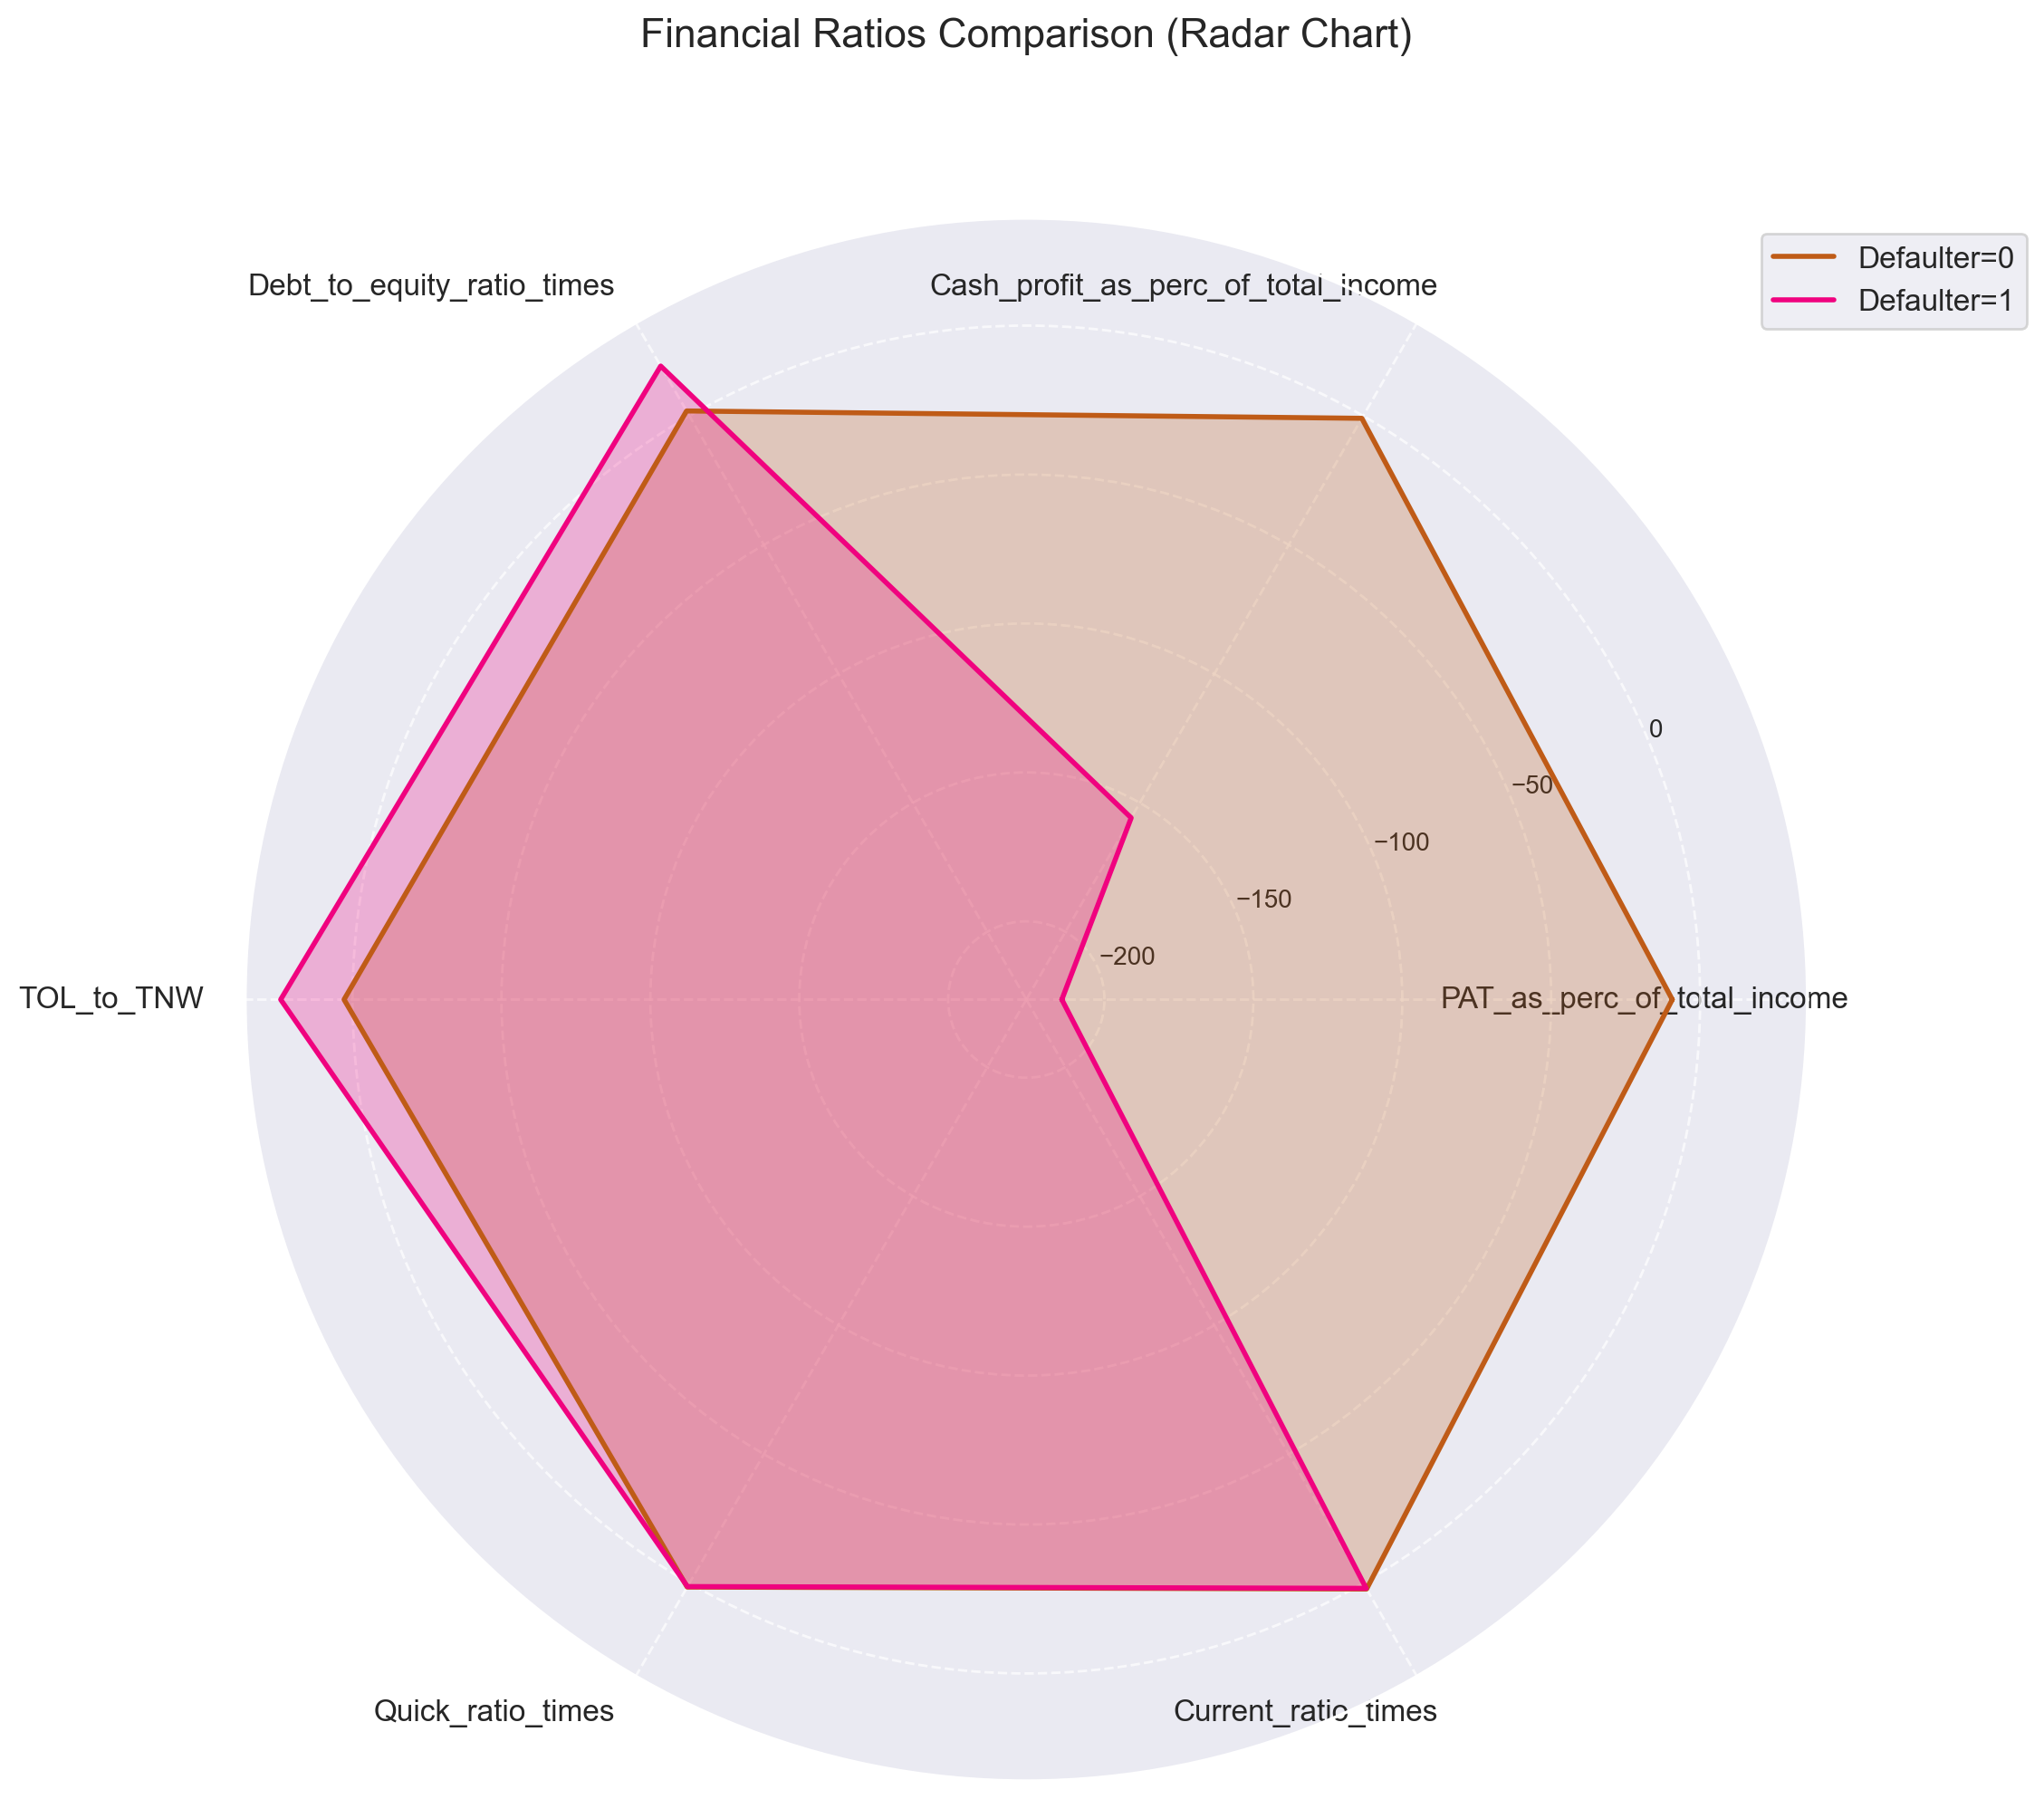

In [20]:

features = ['PAT_as_perc_of_total_income', 'Cash_profit_as_perc_of_total_income',
            'Debt_to_equity_ratio_times', 'TOL_to_TNW', 'Quick_ratio_times', 'Current_ratio_times']

# Compute group means
grouped = df.groupby('default')[features].mean()

# Prepare data for radar
labels = features
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Increase figure size
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(polar=True))

# Plot for each default group
for i, row in grouped.iterrows():
    values = row.tolist()
    values += values[:1]  # Repeat the first value to close the loop
    ax.plot(angles, values, label=f'Defaulter={i}', linewidth=2)  # Increase line width
    ax.fill(angles, values, alpha=0.25)

# Set x-axis ticks and labels with increased font size and rotation
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12, ha='right') # Rotate labels for better fit

# Increase y-axis tick label size (optional, but can help if values are small)
ax.tick_params(axis='y', labelsize=10)

# Improve title and legend position/size
plt.title("Financial Ratios Comparison (Radar Chart)", fontsize=16, y=1.1) # Adjust title position
plt.legend(fontsize=12, loc='upper right', bbox_to_anchor=(1.15, 1)) # Move legend outside

# Add grid for easier value comparison
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0, 0.85, 1.0]) # Adjust layout to accommodate legend
plt.show()

In [24]:
df.columns

Index(['Networth_Next_Year', 'Total_assets', 'Net_worth', 'Total_income', 'Change_in_stock', 'Total_expenses', 'Profit_after_tax', 'PBDITA', 'PBT', 'Cash_profit', 'PBDITA_as_perc_of_total_income', 'PBT_as_perc_of_total_income', 'PAT_as_perc_of_total_income', 'Cash_profit_as_perc_of_total_income', 'PAT_as_perc_of_net_worth', 'Sales', 'Income_from_fincial_services', 'Other_income', 'Total_capital', 'Reserves_and_funds', 'Borrowings', 'Current_liabilities_&_provisions', 'Deferred_tax_liability', 'Shareholders_funds', 'Cumulative_retained_profits', 'Capital_employed', 'TOL_to_TNW', 'Total_term_liabilities__to__tangible_net_worth', 'Contingent_liabilities__to__Net_worth_perc', 'Contingent_liabilities', 'Net_fixed_assets', 'Investments', 'Current_assets', 'Net_working_capital', 'Quick_ratio_times', 'Current_ratio_times', 'Debt_to_equity_ratio_times', 'Cash_to_current_liabilities_times', 'Cash_to_average_cost_of_sales_per_day', 'Creditors_turnover', 'Debtors_turnover',
       'Finished_goods_

In [25]:
df.drop(['Networth_Next_Year', 'de_ratio_bin'], axis=1, inplace=True)

df.head()

Total_assets  Net_worth  Total_income  Change_in_stock  Total_expenses  Profit_after_tax  PBDITA    PBT  Cash_profit  PBDITA_as_perc_of_total_income  PBT_as_perc_of_total_income  PAT_as_perc_of_total_income  Cash_profit_as_perc_of_total_income  PAT_as_perc_of_net_worth   Sales  Income_from_fincial_services  Other_income  Total_capital  Reserves_and_funds  Borrowings  Current_liabilities_&_provisions  Deferred_tax_liability  Shareholders_funds  Cumulative_retained_profits  Capital_employed  TOL_to_TNW  Total_term_liabilities__to__tangible_net_worth  Contingent_liabilities__to__Net_worth_perc  Contingent_liabilities  Net_fixed_assets  Investments  Current_assets  Net_working_capital  Quick_ratio_times  Current_ratio_times  Debt_to_equity_ratio_times  Cash_to_current_liabilities_times  Cash_to_average_cost_of_sales_per_day  Creditors_turnover  Debtors_turnover  Finished_goods_turnover  WIP_turnover  Raw_material_turnover    EPS  Adjusted_EPS  Total_liabilities  PE_on_BSE  default
0         827.6      336.5         534.1             13.5           508.7              38.9   124.4   64.6         95.2                           23.29                        12.10                         7.28                                17.82                     12.27   533.5                           0.6           NaN           87.6               249.0       390.7                              43.9                    56.4               336.5                        248.9             727.2        1.28                                            0.99                                      186.21                   626.6             461.1         18.1           257.6                163.1               0.99                 2.52                        1.16                               0.06                                   5.41               11.60              5.65                     3.99          3.37                  14.87   4.44          4.44              827.6        NaN        0
1          67.7       24.3         137.9             -3.7           131.0               3.2     5.5    1.0          3.8                            3.99                         0.73                         2.32                                 2.76                      0.00   135.5                           NaN           0.2           11.9                 4.3        16.6                              23.7                     3.1                24.3                         -8.2              40.9        1.53                                            0.21                                       47.74                    11.6              18.5          0.2            39.0                  3.9               0.67                 1.11                        0.68                               0.02                                   1.62                 NaN               NaN                      NaN           NaN                    NaN   0.00          0.00               67.7        NaN        0
2         238.4       78.9         331.2            -18.1           309.2               3.9    25.8   10.5          9.4                            7.79                         3.17                         1.18                                 2.84                      5.07   330.6                           0.6           NaN           25.0                56.7        44.7                             102.2                     9.8                78.9                         53.1             123.6        1.70                                            0.33                                       30.42                    24.0              56.8          0.2           158.3                 38.3               1.11                 1.31                        0.57                               0.19                                  26.42                2.24              2.51                    17.67          8.76                   8.35   0.00          0.00              238.4        NaN        0
3        6883.5     144

In [26]:
df.shape

(4256, 48)

In [27]:
print('MISSING VALUES PER VARIABLE -->')
print('')
df.isnull().sum()

MISSING VALUES PER VARIABLE -->



Total_assets                                         0
Net_worth                                            0
Total_income                                       231
Change_in_stock                                    550
Total_expenses                                     165
Profit_after_tax                                   154
PBDITA                                             154
PBT                                                154
Cash_profit                                        154
PBDITA_as_perc_of_total_income                      79
PBT_as_perc_of_total_income                         79
PAT_as_perc_of_total_income                         79
Cash_profit_as_perc_of_total_income                 79
PAT_as_perc_of_net_worth                             0
Sales                                              305
Income_from_fincial_services                      1111
Other_income                                      1556
Total_capital                                        5
Reserves_a

In [28]:
print('PERCENT OF MISSING VALUES TO THE WHOLE DATA --->')
print('')
round(df.isna().sum()*100/df.shape[0], 2)

PERCENT OF MISSING VALUES TO THE WHOLE DATA --->



Total_assets                                       0.00
Net_worth                                          0.00
Total_income                                       5.43
Change_in_stock                                   12.92
Total_expenses                                     3.88
Profit_after_tax                                   3.62
PBDITA                                             3.62
PBT                                                3.62
Cash_profit                                        3.62
PBDITA_as_perc_of_total_income                     1.86
PBT_as_perc_of_total_income                        1.86
PAT_as_perc_of_total_income                        1.86
Cash_profit_as_perc_of_total_income                1.86
PAT_as_perc_of_net_worth                           0.00
Sales                                              7.17
Income_from_fincial_services                      26.10
Other_income                                      36.56
Total_capital                                   

In [29]:
print('Percent of Total Missing Values in the data =' ,(df.isna().sum().sum()*100/df.size).round(2), "%")

Percent of Total Missing Values in the data = 7.91 %


**Checking Zero Values**

In [30]:
(df.drop('default', axis=1)==0).sum().sort_values(ascending=False)

Contingent_liabilities__to__Net_worth_perc        1402
Total_term_liabilities__to__tangible_net_worth     733
Adjusted_EPS                                       720
EPS                                                719
PAT_as_perc_of_net_worth                           537
Debt_to_equity_ratio_times                         460
Raw_material_turnover                              424
Cash_to_current_liabilities_times                  319
Debtors_turnover                                   247
PAT_as_perc_of_total_income                        216
PBT_as_perc_of_total_income                        215
Creditors_turnover                                 208
Cash_to_average_cost_of_sales_per_day              197
Cash_profit_as_perc_of_total_income                196
PBDITA_as_perc_of_total_income                     187
TOL_to_TNW                                          88
Change_in_stock                                     87
Profit_after_tax                                    78
PBT       

In [31]:
round(((df.drop('default', axis=1)==0).sum())*100/df.shape[0], 2).sort_values(ascending=False)

Contingent_liabilities__to__Net_worth_perc        32.94
Total_term_liabilities__to__tangible_net_worth    17.22
Adjusted_EPS                                      16.92
EPS                                               16.89
PAT_as_perc_of_net_worth                          12.62
Debt_to_equity_ratio_times                        10.81
Raw_material_turnover                              9.96
Cash_to_current_liabilities_times                  7.50
Debtors_turnover                                   5.80
PAT_as_perc_of_total_income                        5.08
PBT_as_perc_of_total_income                        5.05
Creditors_turnover                                 4.89
Cash_to_average_cost_of_sales_per_day              4.63
Cash_profit_as_perc_of_total_income                4.61
PBDITA_as_perc_of_total_income                     4.39
TOL_to_TNW                                         2.07
Change_in_stock                                    2.04
Profit_after_tax                                

In [32]:
((df.drop('default', axis=1)==0).sum().sum())*100/df.drop('default', axis=1).size

3.7299032154855225

**Dropping Variables with zeros greater than 30%**

In [33]:
df.drop(['Contingent_liabilities__to__Net_worth_perc'], axis=1, inplace=True)
df.shape

(4256, 47)

In [34]:
df.columns

Index(['Total_assets', 'Net_worth', 'Total_income', 'Change_in_stock', 'Total_expenses', 'Profit_after_tax', 'PBDITA', 'PBT', 'Cash_profit', 'PBDITA_as_perc_of_total_income', 'PBT_as_perc_of_total_income', 'PAT_as_perc_of_total_income', 'Cash_profit_as_perc_of_total_income', 'PAT_as_perc_of_net_worth', 'Sales', 'Income_from_fincial_services', 'Other_income', 'Total_capital', 'Reserves_and_funds', 'Borrowings', 'Current_liabilities_&_provisions', 'Deferred_tax_liability', 'Shareholders_funds', 'Cumulative_retained_profits', 'Capital_employed', 'TOL_to_TNW', 'Total_term_liabilities__to__tangible_net_worth', 'Contingent_liabilities', 'Net_fixed_assets', 'Investments', 'Current_assets', 'Net_working_capital', 'Quick_ratio_times', 'Current_ratio_times', 'Debt_to_equity_ratio_times', 'Cash_to_current_liabilities_times', 'Cash_to_average_cost_of_sales_per_day', 'Creditors_turnover', 'Debtors_turnover', 'Finished_goods_turnover', 'WIP_turnover', 'Raw_material_turnover', 'EPS', 'Adjusted_EPS',


**Converting other Zeros to Missing Values for Treatment**

In [35]:
df1 = df.drop('default', axis=1)
df1[df1==0] = np.nan
(df1==0).sum()
(df1==0).shape
df1.shape

Total_assets                                      0
Net_worth                                         0
Total_income                                      0
Change_in_stock                                   0
Total_expenses                                    0
Profit_after_tax                                  0
PBDITA                                            0
PBT                                               0
Cash_profit                                       0
PBDITA_as_perc_of_total_income                    0
PBT_as_perc_of_total_income                       0
PAT_as_perc_of_total_income                       0
Cash_profit_as_perc_of_total_income               0
PAT_as_perc_of_net_worth                          0
Sales                                             0
Income_from_fincial_services                      0
Other_income                                      0
Total_capital                                     0
Reserves_and_funds                                0
Borrowings  

(4256, 46)

(4256, 46)

**Visualising Missing Values**

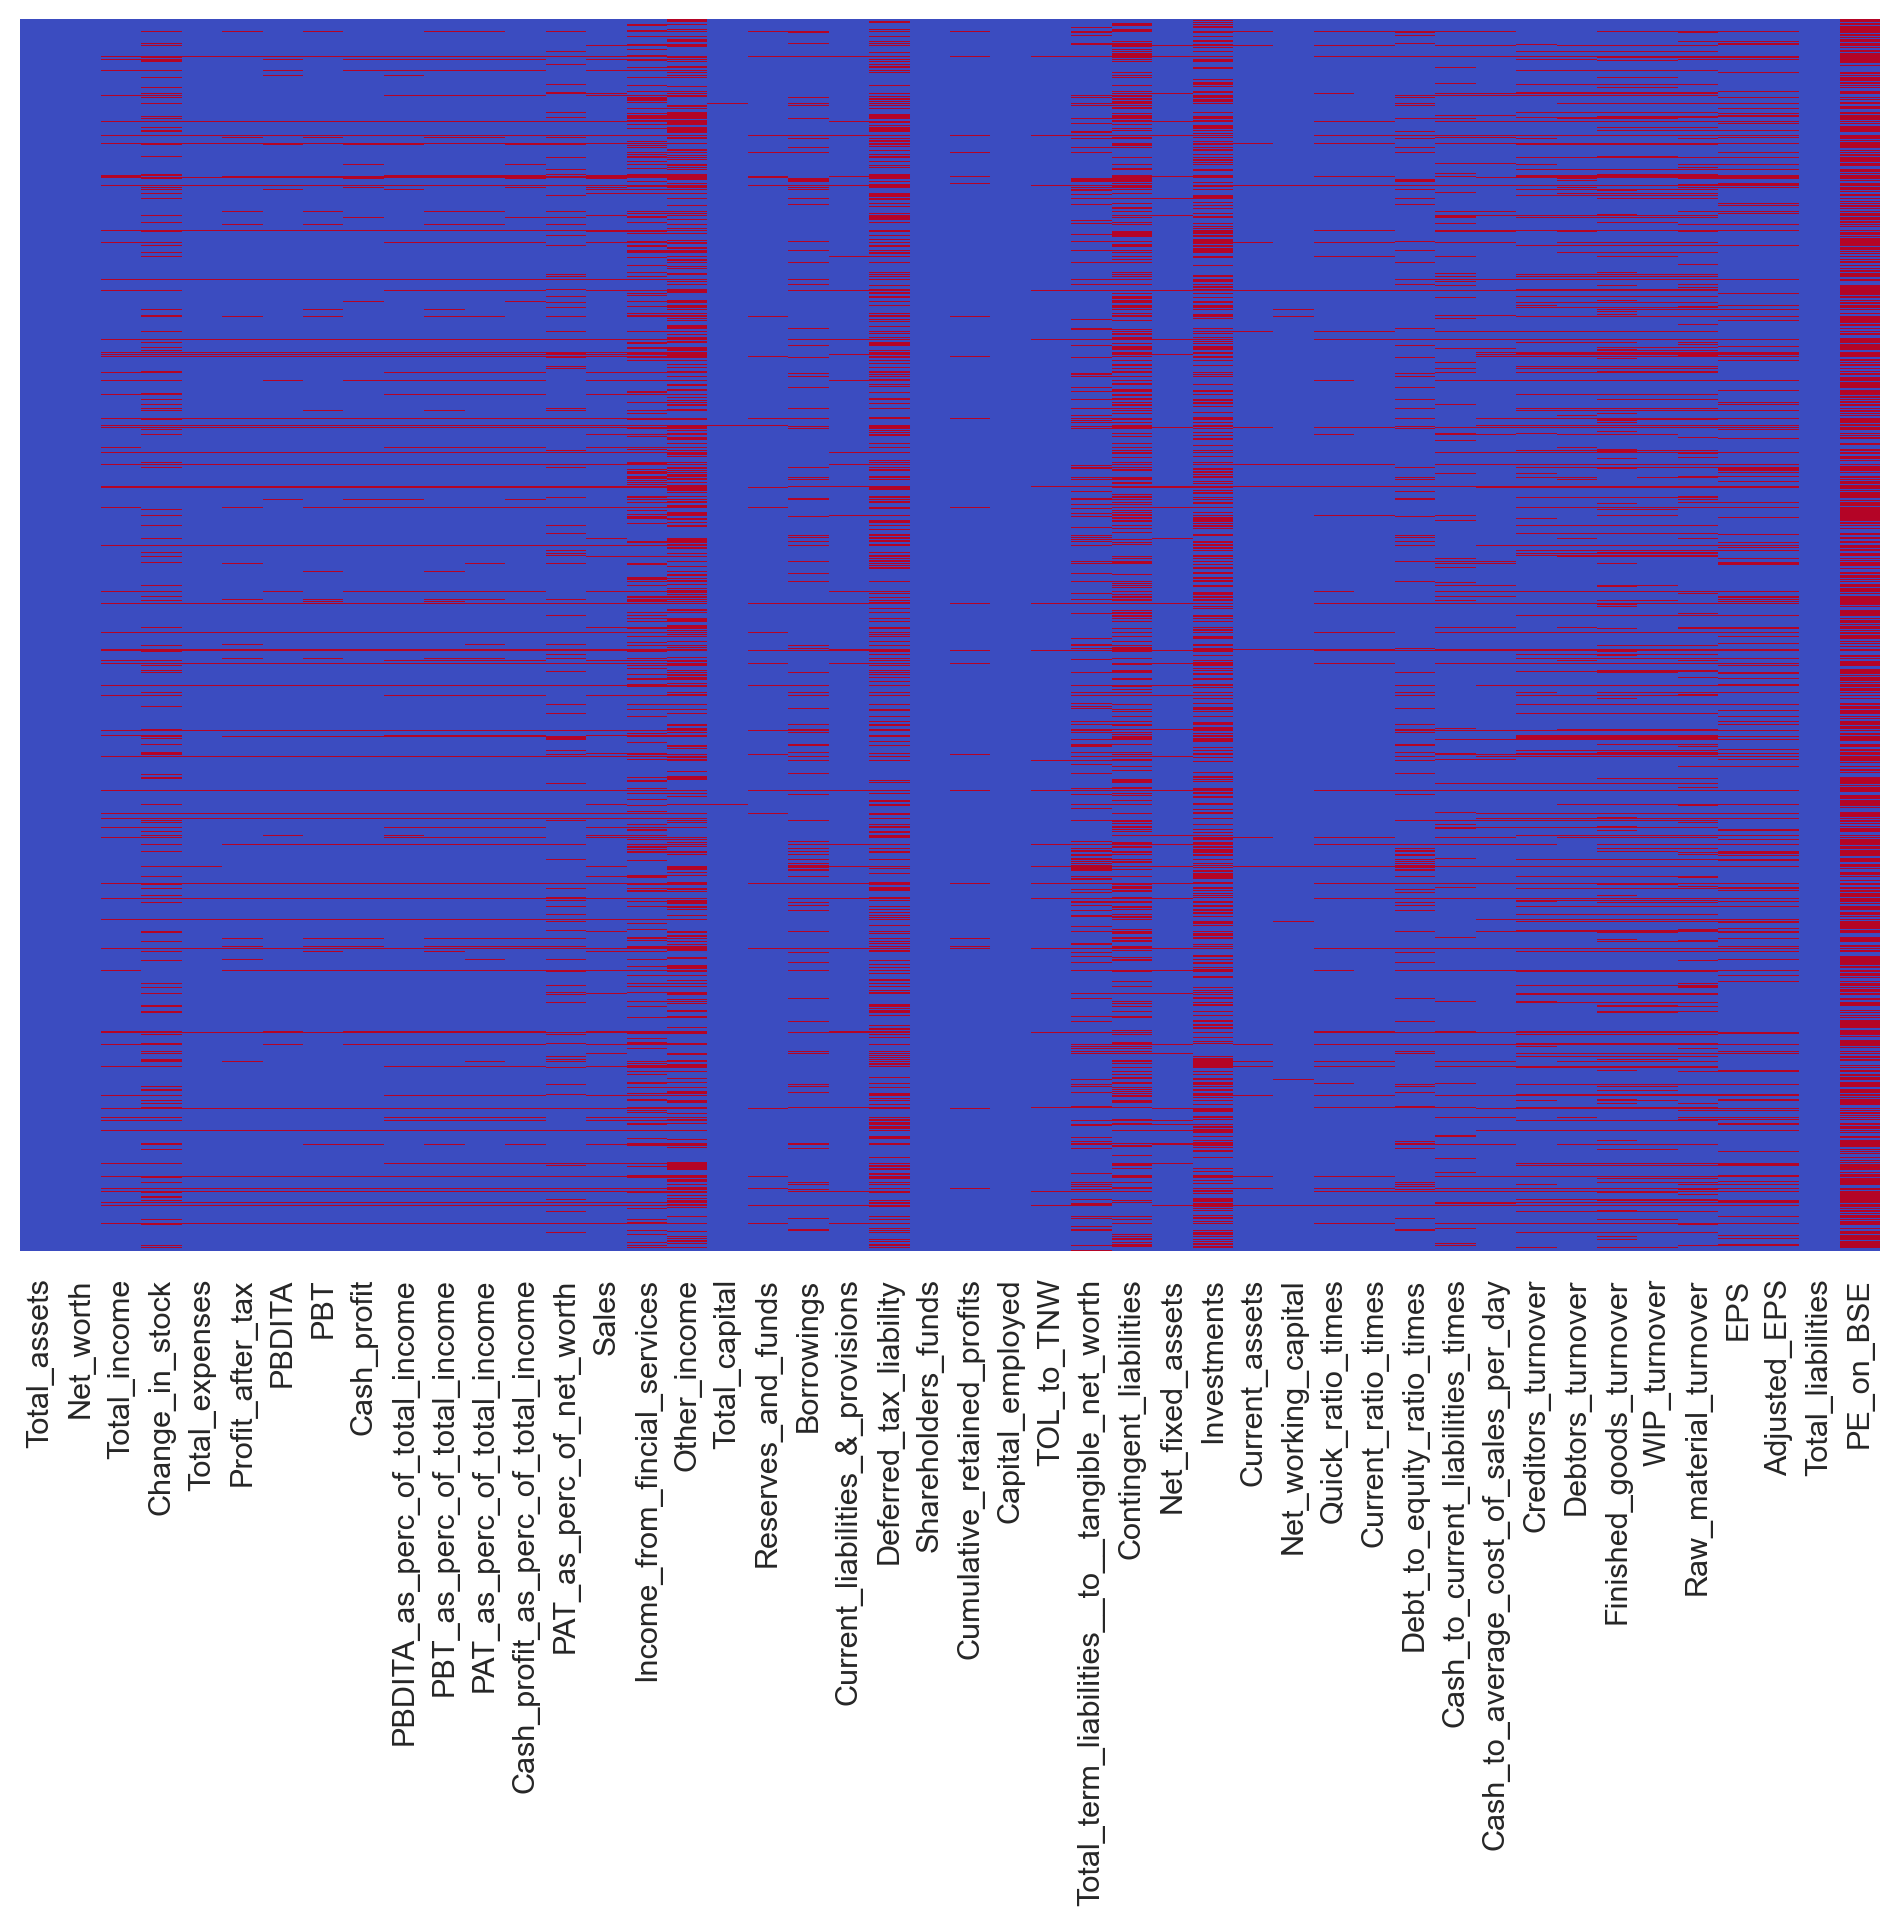

In [31]:
plt.figure(figsize = (12,8))
sns.heatmap(df1.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show();

In [36]:
df1['default'] = df['default']
df_rows = df1[df1.isna().sum(axis=1)>5]
df_rows.shape

(1164, 47)

In [37]:
df1['default'].value_counts()
df_rows['default'].value_counts()

default
0    4022
1     234
Name: count, dtype: int64

default
0    1033
1     131
Name: count, dtype: int64

**Split Target and Predictor Variables**

In [38]:
df_x = df1.drop('default', axis=1)
df_y = df1['default']

**Impute Null Values using KNN Imputer**

In [39]:
df1.isna().sum()

Total_assets                                         0
Net_worth                                            1
Total_income                                       233
Change_in_stock                                    637
Total_expenses                                     170
Profit_after_tax                                   232
PBDITA                                             214
PBT                                                232
Cash_profit                                        223
PBDITA_as_perc_of_total_income                     266
PBT_as_perc_of_total_income                        294
PAT_as_perc_of_total_income                        295
Cash_profit_as_perc_of_total_income                275
PAT_as_perc_of_net_worth                           537
Sales                                              305
Income_from_fincial_services                      1112
Other_income                                      1559
Total_capital                                        5
Reserves_a

In [40]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10)

df_imputed = pd.DataFrame(imputer.fit_transform(df1), columns = df1.columns)

df_imputed.isnull().sum()

Total_assets                                      0
Net_worth                                         0
Total_income                                      0
Change_in_stock                                   0
Total_expenses                                    0
Profit_after_tax                                  0
PBDITA                                            0
PBT                                               0
Cash_profit                                       0
PBDITA_as_perc_of_total_income                    0
PBT_as_perc_of_total_income                       0
PAT_as_perc_of_total_income                       0
Cash_profit_as_perc_of_total_income               0
PAT_as_perc_of_net_worth                          0
Sales                                             0
Income_from_fincial_services                      0
Other_income                                      0
Total_capital                                     0
Reserves_and_funds                                0
Borrowings  

**Before outlier treatment**

<Figure size 1500x400 with 0 Axes>

<Axes: >

<Axes: ylabel='Capital_employed'>

Text(0.5, 1.0, 'Before Outlier Treatment\nCapital_employed')

<Axes: >

<Axes: ylabel='Total_assets'>

Text(0.5, 1.0, 'Before Outlier Treatment\nTotal_assets')

<Axes: >

<Axes: ylabel='Borrowings'>

Text(0.5, 1.0, 'Before Outlier Treatment\nBorrowings')

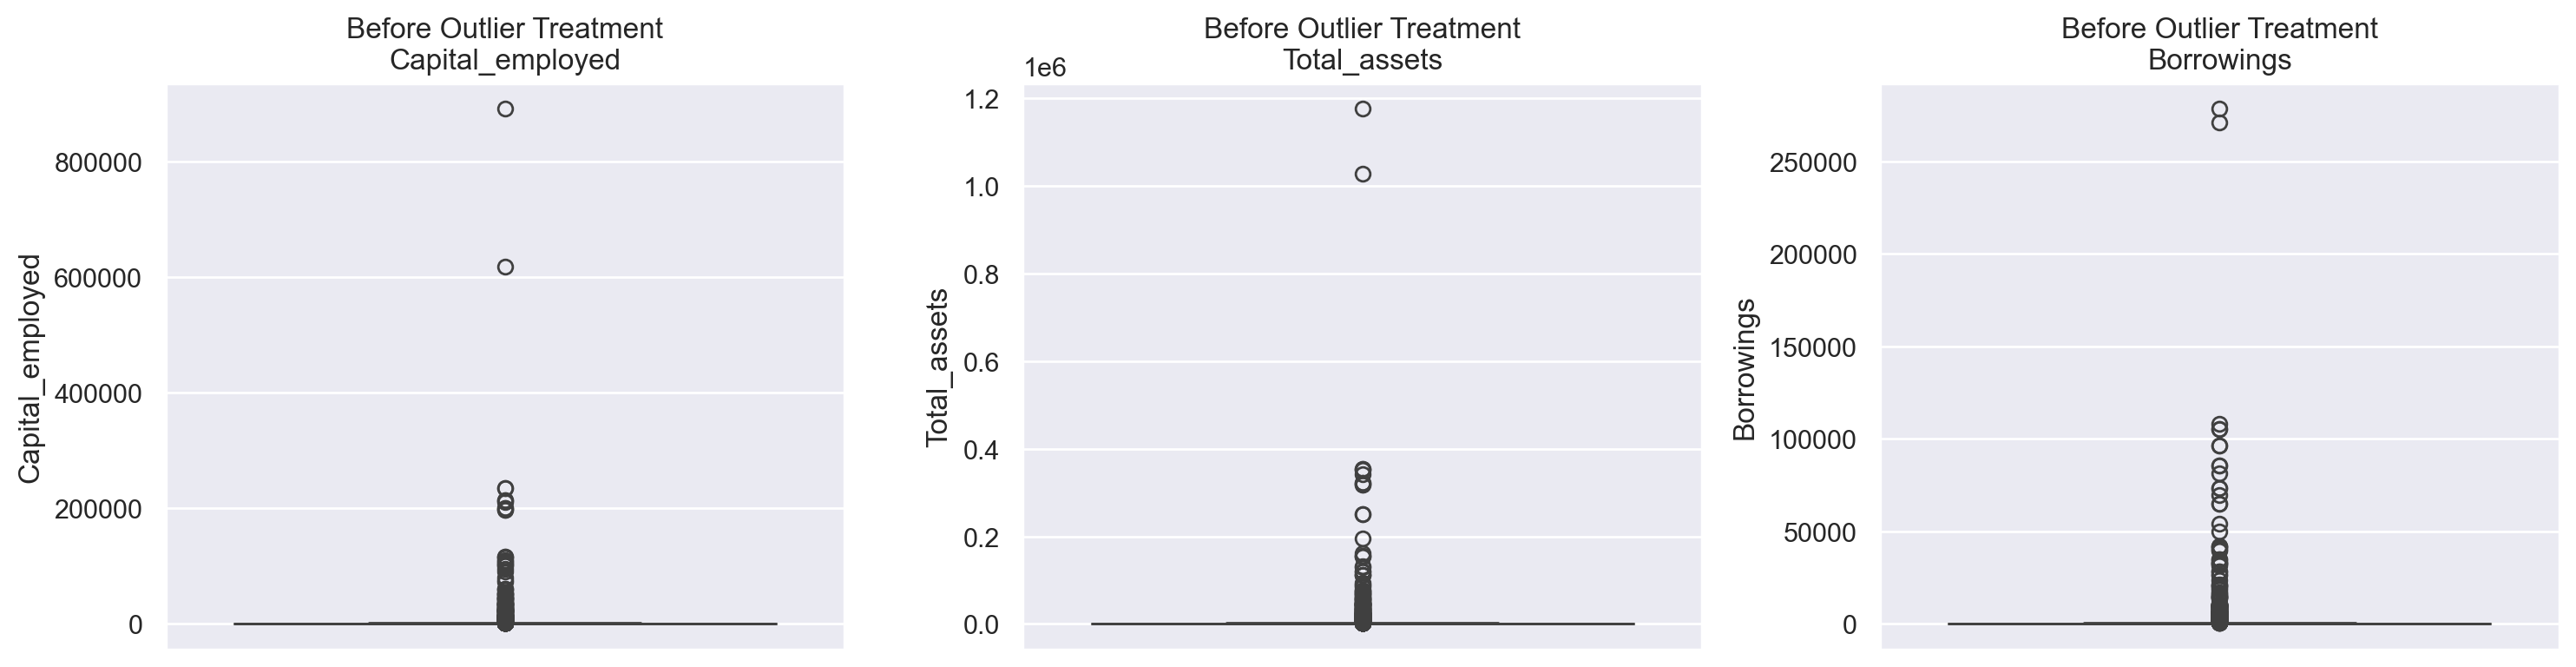

In [41]:
# Pick a few numeric columns to illustrate the effect
cols_to_plot = ['Capital_employed', 'Total_assets', 'Borrowings']

# Before treatment
plt.figure(figsize=(15, 4))
for i, col in enumerate(cols_to_plot):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df_x[col])
    plt.title(f'Before Outlier Treatment\n{col}')
plt.tight_layout()
plt.show()

**Z-score Outlier Treatm.**

In [43]:
df_x = df_imputed.drop('default', axis=1)
df_y = df_imputed['default']

In [44]:
sc = StandardScaler()
scaled_x = pd.DataFrame(sc.fit_transform(df_x), columns=df_x.columns)
scaled_x.shape
scaled_x.head()

(4256, 46)

Total_assets  Net_worth  Total_income  Change_in_stock  Total_expenses  Profit_after_tax    PBDITA       PBT  Cash_profit  PBDITA_as_perc_of_total_income  PBT_as_perc_of_total_income  PAT_as_perc_of_total_income  Cash_profit_as_perc_of_total_income  PAT_as_perc_of_net_worth     Sales  Income_from_fincial_services  Other_income  Total_capital  Reserves_and_funds  Borrowings  Current_liabilities_&_provisions  Deferred_tax_liability  Shareholders_funds  Cumulative_retained_profits  Capital_employed  TOL_to_TNW  Total_term_liabilities__to__tangible_net_worth  Contingent_liabilities  Net_fixed_assets  Investments  Current_assets  Net_working_capital  Quick_ratio_times  Current_ratio_times  Debt_to_equity_ratio_times  Cash_to_current_liabilities_times  Cash_to_average_cost_of_sales_per_day  Creditors_turnover  Debtors_turnover  Finished_goods_turnover  WIP_turnover  Raw_material_turnover       EPS  Adjusted_EPS  Total_liabilities  PE_on_BSE
0     -0.091318  -0.078354     -0.074660        -0.063208       -0.073172         -0.081305 -0.083136 -0.080187    -0.073514                        0.121846                     0.084648                     0.076106                             0.095443                  0.021342 -0.074183                     -0.067157     -0.033729      -0.081217           -0.073867   -0.084050                         -0.098869               -0.065842           -0.079943                    -0.069287         -0.083264   -0.133364                                       -0.065143               -0.002444         -0.057800    -0.082089       -0.106144             0.000468          -0.065053             0.013464                   -0.119450                          -0.119913                              -0.072329           -0.088240         -0.148921                -0.147968     -0.159316              -0.011848  0.016150      0.016250          -0.091318  -0.097031
1     -0.116588  -0.102444     -0.082215        -0.105204       -0.080667         -0.093111 -0.104584 -0.095546    -0.095980                        0.012850                     0.058086                     0.064569                             0.045479                  0.150327 -0.081964                     -0.067525     -0.039265      -0.126176           -0.093184   -0.129980                         -0.101108               -0.096475           -0.103941                    -0.095521         -0.116752   -0.121403                                       -0.114152               -0.064686         -0.093762    -0.085490       -0.127873            -0.049787          -0.099707            -0.100795                   -0.150146                          -0.128272                              -0.073840           -0.028486         -0.101884                -0.043825     -0.017536              -0.018546  0.017458      0.017377          -0.116588  -0.088231
2     -0.110912  -0.098231     -0.078529        -0.140363       -0.077130         -0.092880 -0.100922 -0.093252    -0.094604                        0.034310                     0.063786                     0.061917                             0.045744                 -0.094311 -0.078150                     -0.067157     -0.037977      -0.118396           -0.089047   -0.126530                         -0.092407               -0.092625           -0.099744                    -0.089266         -0.112717   -0.113269                                       -0.106612               -0.063431         -0.090650    -0.085490       -0.116015            -0.038928          -0.052058            -0.084588                   -0.157181                          -0.092745                              -0.063954           -0.215847         -0.185291                -0.120827     -0.124583              -0.031788  0.020493      0.020593          -0.110912  -0.089776
3      0.110069   0.007049      0.076263         0.421942        0.085061         -0.035204 -0.030101 -0.051086    -0.053163                        0.018271                     0.061496          

In [45]:
for column in df_x.columns:
    lr = -3
    ur = 3
    df_x[column]=np.where(df_x[column]>ur,ur,df_x[column])
    df_x[column]=np.where(df_x[column]<lr,lr,df_x[column])

<Figure size 1500x400 with 0 Axes>

<Axes: >

<Axes: ylabel='Capital_employed'>

Text(0.5, 1.0, 'Before Outlier Treatment\nCapital_employed')

<Axes: >

<Axes: ylabel='Total_assets'>

Text(0.5, 1.0, 'Before Outlier Treatment\nTotal_assets')

<Axes: >

<Axes: ylabel='Borrowings'>

Text(0.5, 1.0, 'Before Outlier Treatment\nBorrowings')

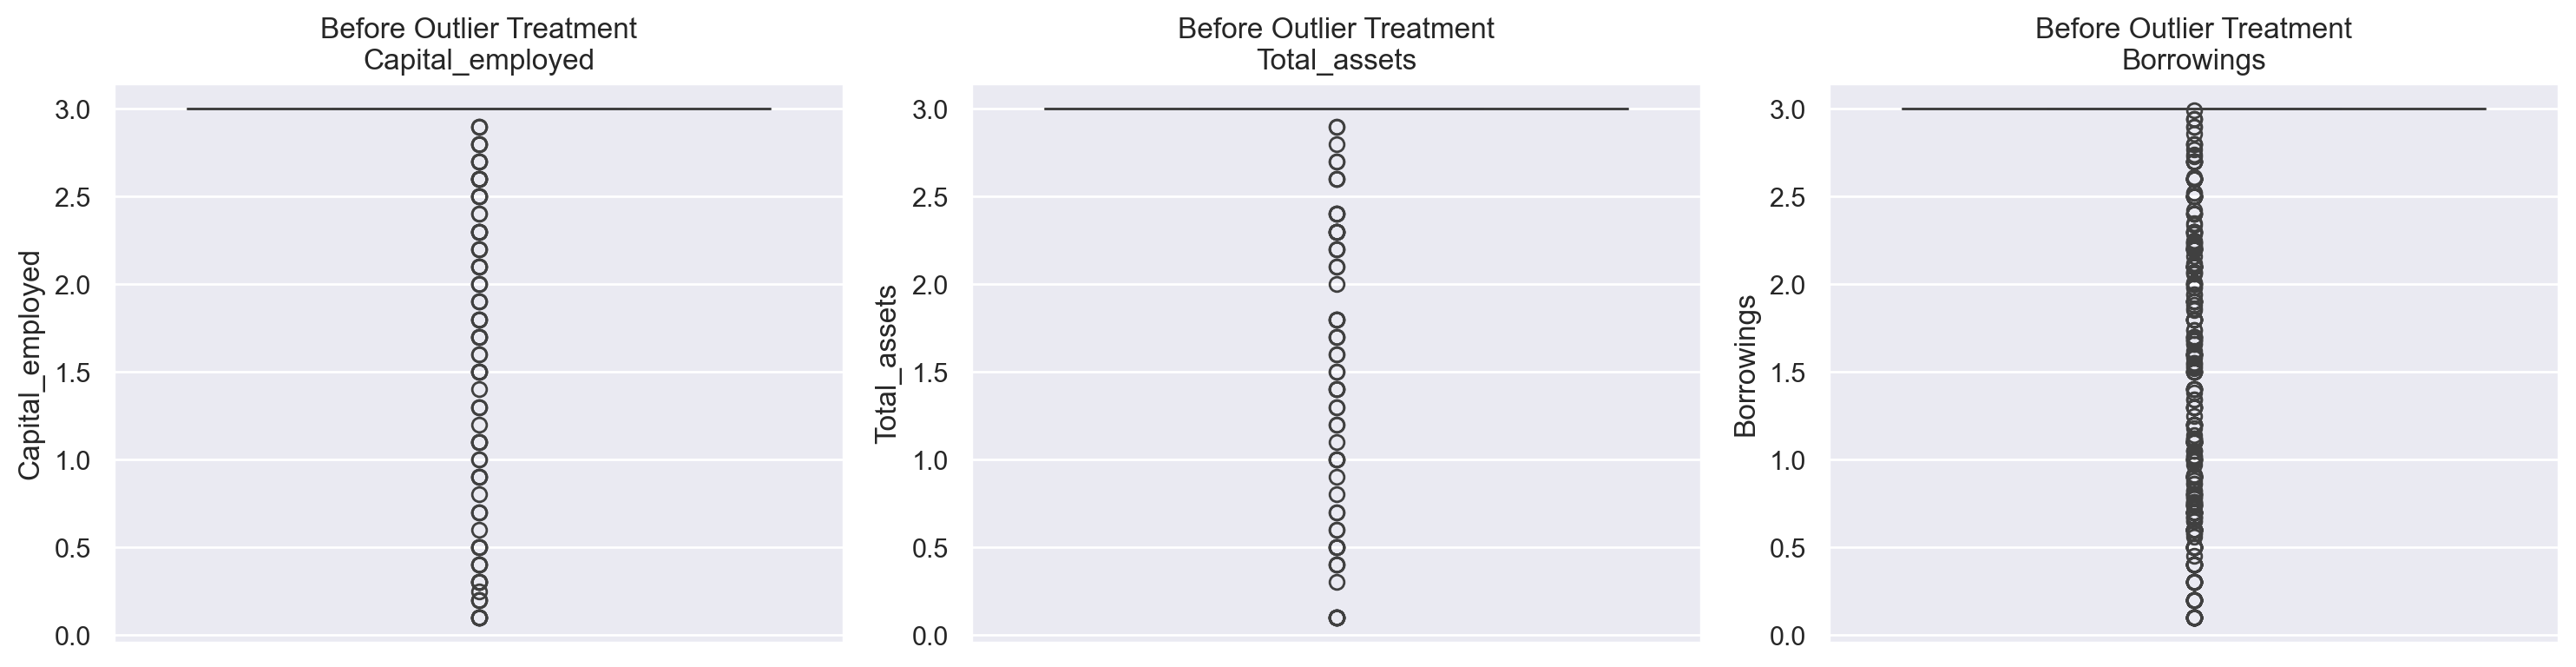

<Figure size 1500x400 with 0 Axes>

<Axes: >

<Axes: ylabel='Capital_employed'>

Text(0.5, 1.0, 'After Outlier Treatment\nCapital_employed')

<Axes: >

<Axes: ylabel='Total_assets'>

Text(0.5, 1.0, 'After Outlier Treatment\nTotal_assets')

<Axes: >

<Axes: ylabel='Borrowings'>

Text(0.5, 1.0, 'After Outlier Treatment\nBorrowings')

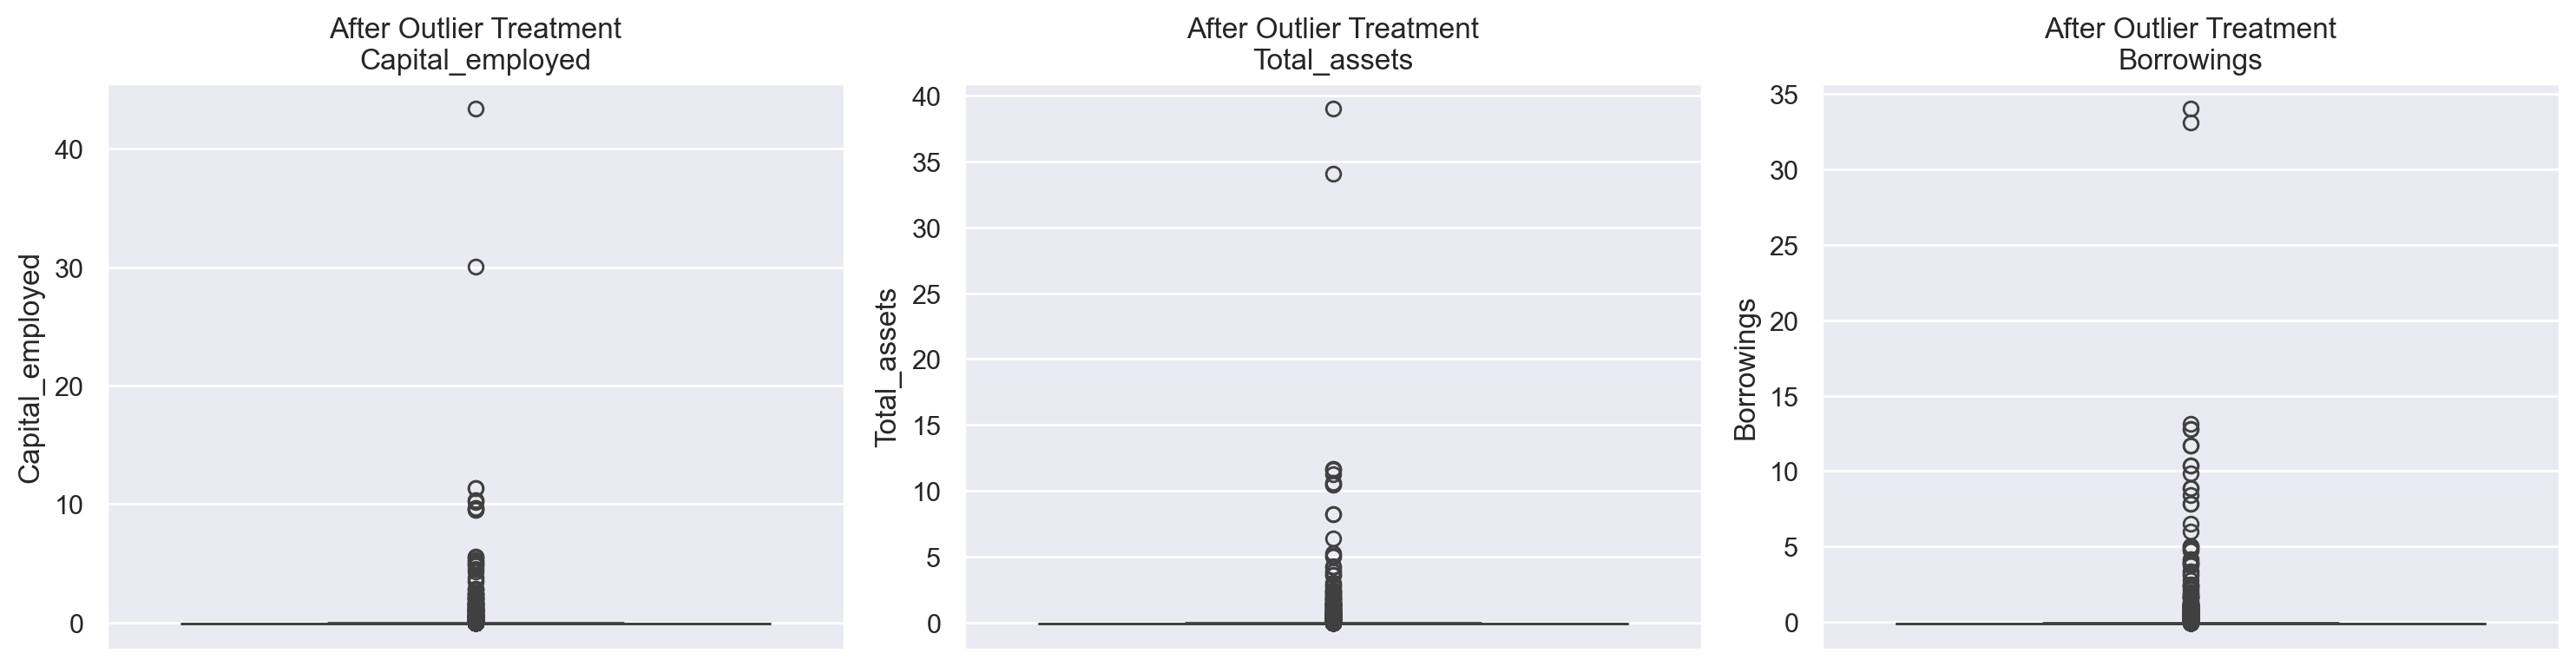

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pick a few numeric columns to illustrate the effect
cols_to_plot = ['Capital_employed', 'Total_assets', 'Borrowings']

# Before treatment
plt.figure(figsize=(15, 4))
for i, col in enumerate(cols_to_plot):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df_x[col])
    plt.title(f'Before Outlier Treatment\n{col}')
plt.tight_layout()
plt.show()

# After treatment
plt.figure(figsize=(15, 4))
for i, col in enumerate(cols_to_plot):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=scaled_x[col])
    plt.title(f'After Outlier Treatment\n{col}')
plt.tight_layout()
plt.show()


<Figure size 4000x4000 with 0 Axes>

Text(0.5, 1.0, 'Correlation Heatmap - Before Standardization')

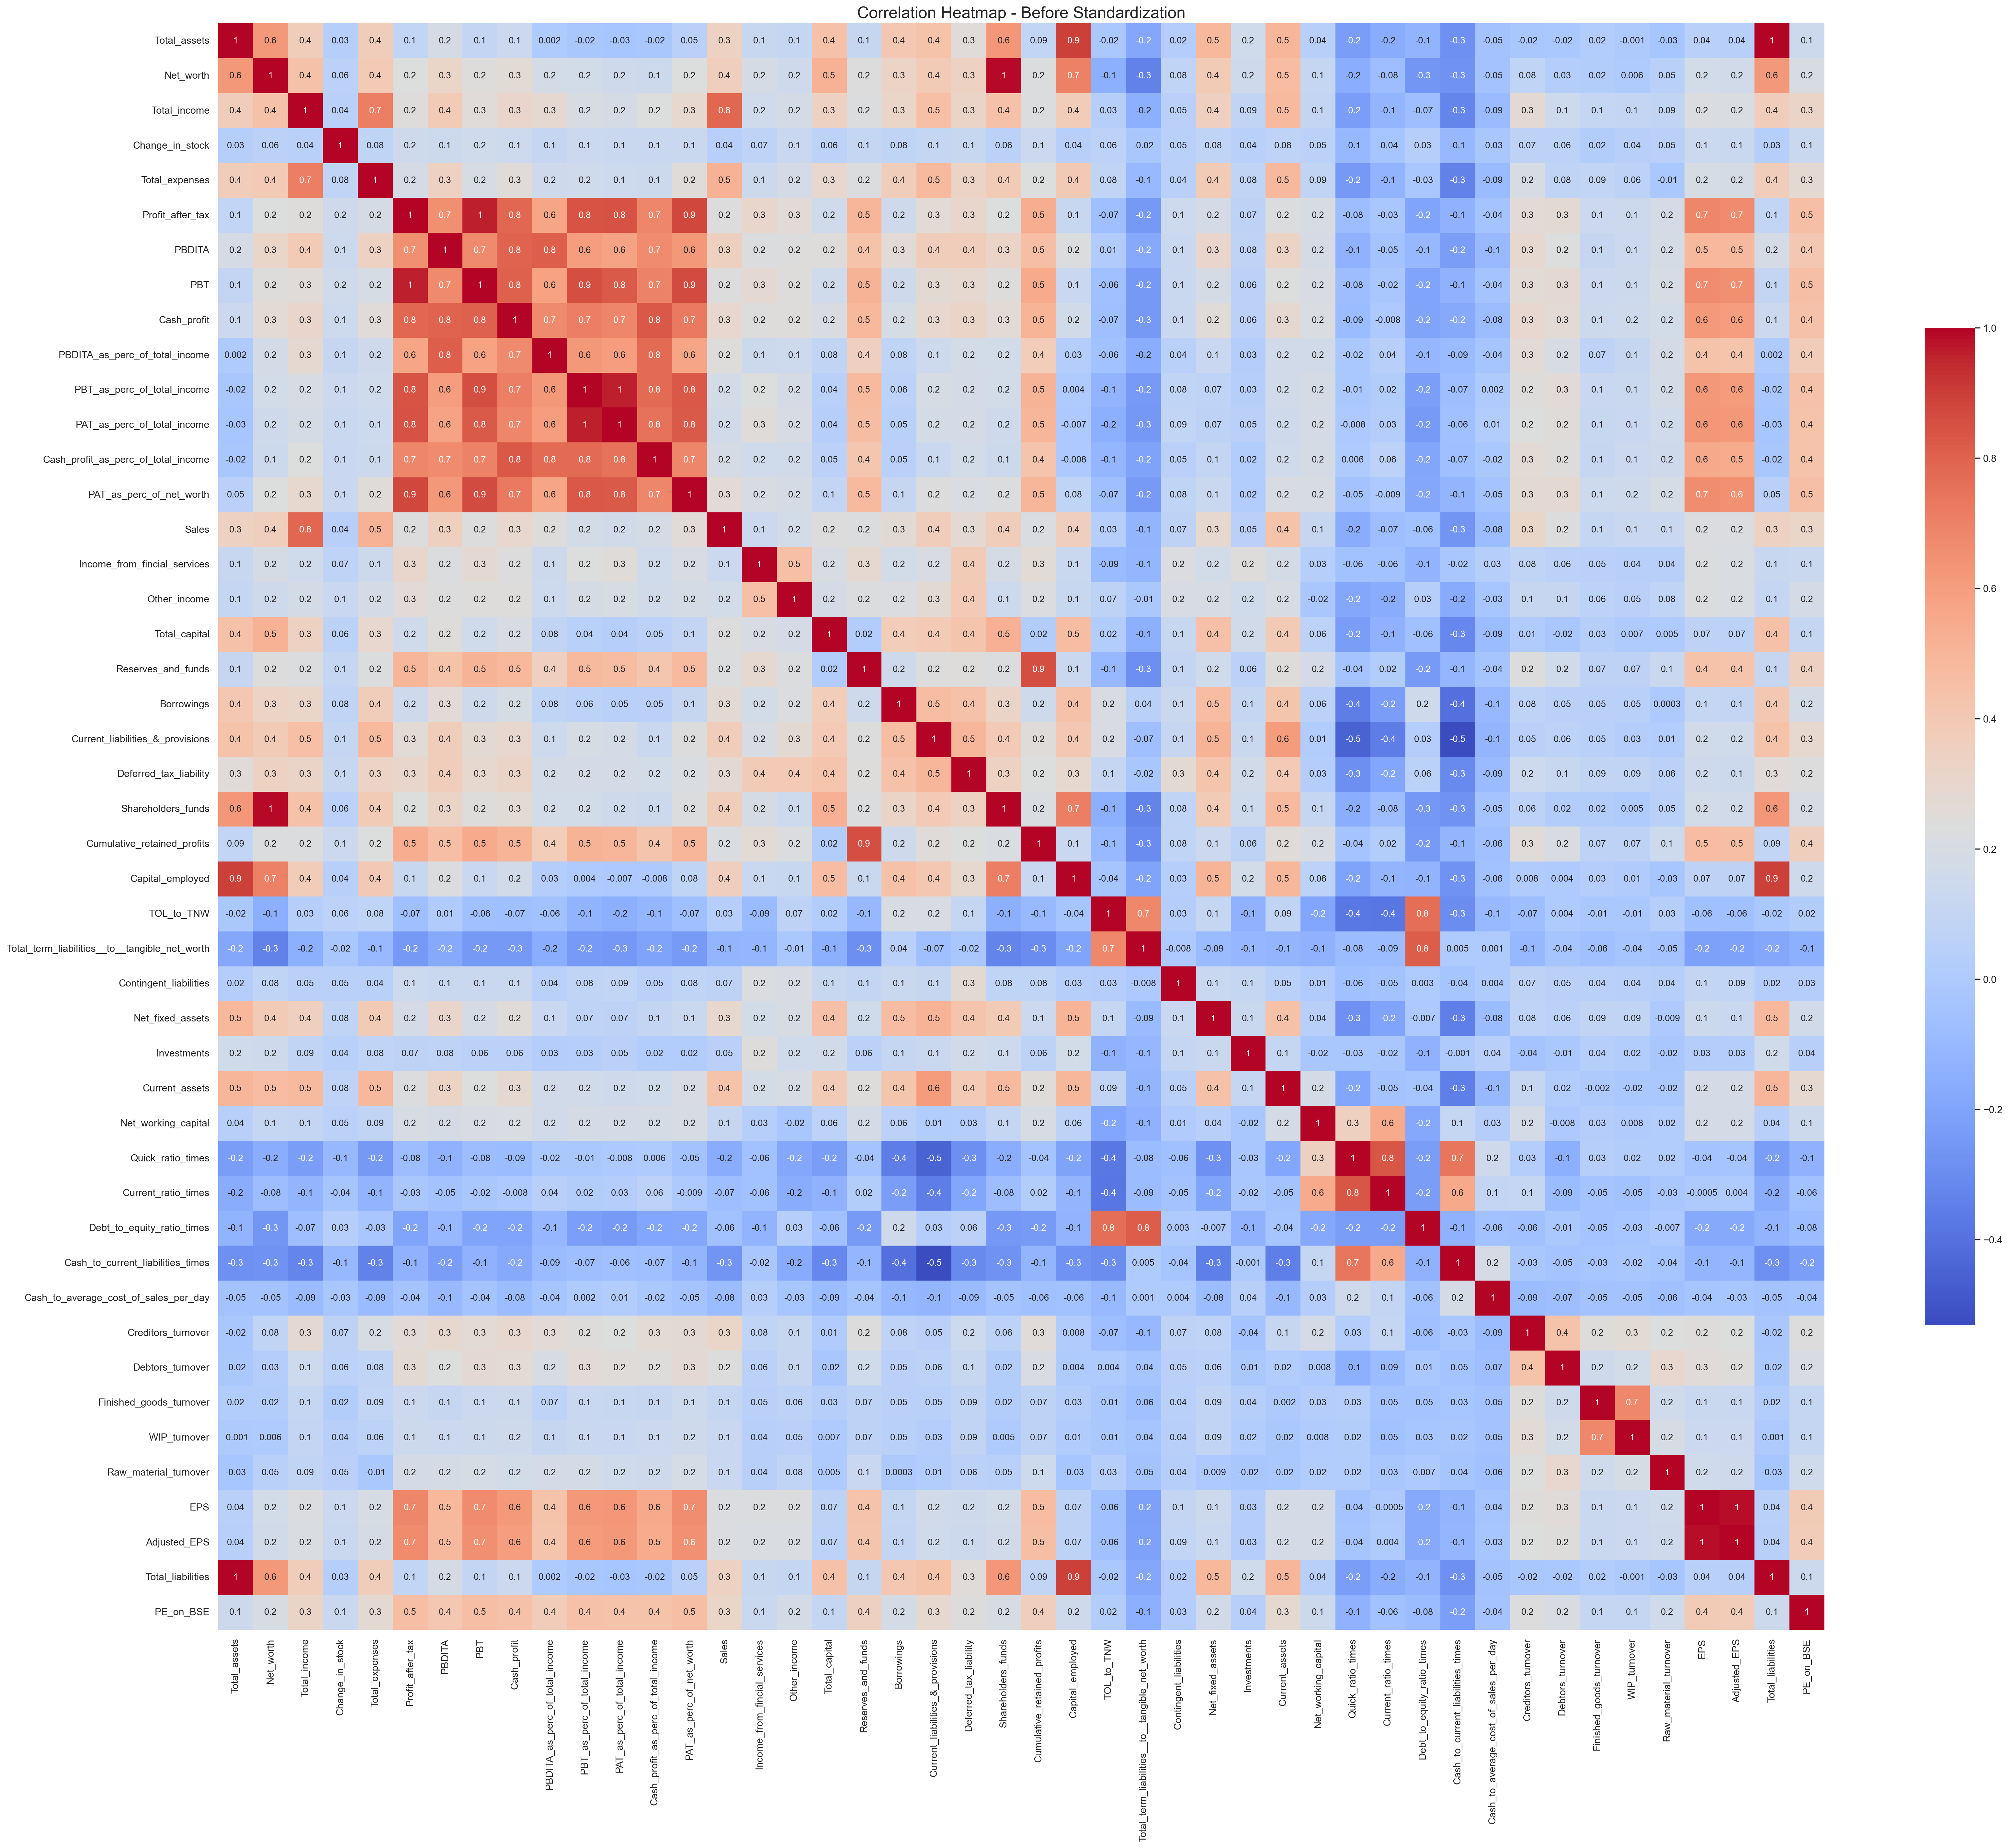

In [54]:
#calculate column correlations and make a seaborn heatmap - Before standardisation

plt.figure(figsize=(40, 40))

# Generate the heatmap
heatmap = sns.heatmap(df_x.corr(), 
                      annot=True, 
                      cmap='coolwarm', 
                      square=True, 
                      fmt='.1g',
                      cbar_kws={'shrink': .5},
                      annot_kws={"size": 10})

# Optional: improve title or layout
plt.title('Correlation Heatmap - Before Standardization', fontsize=18)

# Save the heatmap as a high-resolution .jpg
plt.savefig('heatmap_dfx_55vars.jpg', dpi=300, bbox_inches='tight', format='jpg')

# Show the plot (optional, if you want to visualize within notebook)
plt.show()

**Check Multi-Colinearity using Variance Inflation Factor**

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [48]:
X = df_x.copy()
f = calc_vif(X).sort_values(by = 'VIF', ascending = False)
f

variables          VIF
0                                     Total_assets          inf
44                               Total_liabilities          inf
22                              Shareholders_funds  2349.637092
1                                        Net_worth  2222.932325
24                                Capital_employed   799.750638
2                                     Total_income   176.587704
14                                           Sales   144.508651
39                         Finished_goods_turnover   141.982859
4                                   Total_expenses    89.713308
40                                    WIP_turnover    73.164602
28                                Net_fixed_assets    68.461838
30                                  Current_assets    65.387274
38                                Debtors_turnover    58.114585
42                                             EPS    57.460394
43                                    Adjusted_EPS    53.981918
17                                   Total_capital    53.416343
20                Current_liabilities_&_provisions    50.710329
37                              Creditors_turnover    48.556188
19                                      Borrowings    43.964687
7                                              PBT    41.732446
41                           Raw_material_turnover    39.342845
5                                 Profit_after_tax    36.785601
10                     PBT_as_perc_of_total_income    35.187688
11                     PAT_as_perc_of_total_income    27.945253
6                                           PBDITA    26.745016
33                             Current_ratio_times    22.991545
9                   PBDITA_as_perc_of_total_income    22.001648
8                                      Cash_profit    21.833506
12             Cash_profit_as_perc_of_total_income    18.147004
36           Cash_to_average_cost_of_sales_per_day    16.318511
27                          Contingent_liabilities    16.285438
32                               Quick_ratio_times    14.741141
21                          Deferred_tax_liability    14.655513
34                      Debt_to_equity_ratio_times    10.400094
25                                      TOL_to_TNW    10.241625
13                        PAT_as_perc_of_net_worth     9.796362
29                                     Investments     7.891206
18                              Reserves_and_funds     7.234879
26  Total_term_liabilities__to__tangible_net_worth     6.734887
23                     Cumulative_retained_profits     6.366533
15                    Income_from_fincial_services     4.182174
16                                    Other_income     3.733095
35               Cash_to_current_liabilities_times     3.674235
45                                       PE_on_BSE     2.846546
31                             Net_working_capital     2.170429
3                                  Change_in_stock     1.164077

In [49]:
X.shape
X.columns

(4256, 46)

Index(['Total_assets', 'Net_worth', 'Total_income', 'Change_in_stock', 'Total_expenses', 'Profit_after_tax', 'PBDITA', 'PBT', 'Cash_profit', 'PBDITA_as_perc_of_total_income', 'PBT_as_perc_of_total_income', 'PAT_as_perc_of_total_income', 'Cash_profit_as_perc_of_total_income', 'PAT_as_perc_of_net_worth', 'Sales', 'Income_from_fincial_services', 'Other_income', 'Total_capital', 'Reserves_and_funds', 'Borrowings', 'Current_liabilities_&_provisions', 'Deferred_tax_liability', 'Shareholders_funds', 'Cumulative_retained_profits', 'Capital_employed', 'TOL_to_TNW', 'Total_term_liabilities__to__tangible_net_worth', 'Contingent_liabilities', 'Net_fixed_assets', 'Investments', 'Current_assets', 'Net_working_capital', 'Quick_ratio_times', 'Current_ratio_times', 'Debt_to_equity_ratio_times', 'Cash_to_current_liabilities_times', 'Cash_to_average_cost_of_sales_per_day', 'Creditors_turnover', 'Debtors_turnover', 'Finished_goods_turnover', 'WIP_turnover', 'Raw_material_turnover', 'EPS', 'Adjusted_EPS',


**Dropping Variables recursively with VIF greater than 5**

*We will check VIF of all predictor variables*

*We will arrange these variables in decreasing order of VIF*

*We will check if the top variable has VIF > 5*, If yes, then we drop ONLY this Top Variable and check for VIF again*

*We will run this in a loop and drop variables one by one till we get max VIF < 5*

In [50]:
import time
start = time.time()

for i in range(55):
    v = calc_vif(X).sort_values(by = 'VIF', ascending = False)
    if (v.iloc[0,1] > 5):
        X = X.drop(columns=v.iloc[0,0])

end = time.time()
print('Time taken =', end-start)

Time taken = 20.989583730697632


**now Check VIF again**

In [51]:
calc_vif(X).sort_values(by = 'VIF', ascending = False)

variables       VIF
6                                      Investments  4.041831
2                     Income_from_fincial_services  3.699070
3                                     Other_income  3.418387
1                      PAT_as_perc_of_total_income  2.743076
9                                     Adjusted_EPS  2.709525
10                                       PE_on_BSE  2.477923
4                      Cumulative_retained_profits  2.301584
5   Total_term_liabilities__to__tangible_net_worth  1.680021
7                              Net_working_capital  1.357239
8                Cash_to_current_liabilities_times  1.337678
0                                  Change_in_stock  1.136423

In [52]:
X.shape
X.head()

(4256, 11)

Change_in_stock  PAT_as_perc_of_total_income  Income_from_fincial_services  Other_income  Cumulative_retained_profits  Total_term_liabilities__to__tangible_net_worth  Investments  Net_working_capital  Cash_to_current_liabilities_times  Adjusted_EPS  PE_on_BSE
0              3.0                         3.00                          0.60          3.00                          3.0                                            0.99          3.0                  3.0                               0.06           3.0      1.786
1             -3.0                         2.32                          0.27          0.20                         -3.0                                            0.21          0.2                  3.0                               0.02           3.0      3.000
2             -3.0                         1.18                          0.60          1.41                          3.0                                            0.33          0.2                  3.0                               0.19           3.0      3.000
3              3.0                         2.11                          2.00          3.00                          3.0                                            0.22          3.0                  3.0                               0.07           3.0      3.000
4              3.0                        -0.18                          0.20          0.80                          3.0                                            0.44          3.0                  3.0                               0.05          -3.0      3.000

**Scale the data using Standard Scaler**

In [53]:
sc = StandardScaler()
scaled_x = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
scaled_x.shape
scaled_x.head()

(4256, 11)

Change_in_stock  PAT_as_perc_of_total_income  Income_from_fincial_services  Other_income  Cumulative_retained_profits  Total_term_liabilities__to__tangible_net_worth  Investments  Net_working_capital  Cash_to_current_liabilities_times  Adjusted_EPS  PE_on_BSE
0         0.971155                     0.763779                     -0.801293      1.324777                     0.576810                                        0.180617     0.605466             0.674267                          -0.431427      0.818603  -0.101923
1        -1.566614                     0.443711                     -1.077487     -1.089744                    -1.974977                                       -0.668456    -2.222776             0.674267                          -0.492351      0.818603   0.474162
2        -1.566614                    -0.092872                     -0.801293     -0.046326                     0.576810                                       -0.537829    -2.222776             0.674267                          -0.233425      0.818603   0.474162
3         0.971155                     0.344867                      0.370437      1.324777                     0.576810                                       -0.657570     0.605466             0.674267                          -0.416196      0.818603   0.474162
4         0.971155                    -0.733007                     -1.136073     -0.572346                     0.576810                                       -0.418088     0.605466             0.674267                          -0.446658     -2.318727   0.474162

In [54]:
df_1 = pd.concat([scaled_x, df_y], axis=1)
df_1.head()
df_1.shape

Change_in_stock  PAT_as_perc_of_total_income  Income_from_fincial_services  Other_income  Cumulative_retained_profits  Total_term_liabilities__to__tangible_net_worth  Investments  Net_working_capital  Cash_to_current_liabilities_times  Adjusted_EPS  PE_on_BSE  default
0         0.971155                     0.763779                     -0.801293      1.324777                     0.576810                                        0.180617     0.605466             0.674267                          -0.431427      0.818603  -0.101923      0.0
1        -1.566614                     0.443711                     -1.077487     -1.089744                    -1.974977                                       -0.668456    -2.222776             0.674267                          -0.492351      0.818603   0.474162      0.0
2        -1.566614                    -0.092872                     -0.801293     -0.046326                     0.576810                                       -0.537829    -2.222776             0.674267                          -0.233425      0.818603   0.474162      0.0
3         0.971155                     0.344867                      0.370437      1.324777                     0.576810                                       -0.657570     0.605466             0.674267                          -0.416196      0.818603   0.474162      0.0
4         0.971155                    -0.733007                     -1.136073     -0.572346                     0.576810                                       -0.418088     0.605466             0.674267                          -0.446658     -2.318727   0.474162      0.0

(4256, 12)

**Split the whole data into Train and Test 67-33**

In [56]:
X_train, X_test, y_train, y_test = train_test_split(scaled_x, df_y, 
                                                    test_size = 0.33, random_state=42)

In [57]:
df1_train = pd.concat([X_train, y_train], axis=1)

**Logistic Regression using StatsModel**

In [59]:
scaled_x.columns
scaled_x.shape

Index(['Change_in_stock', 'PAT_as_perc_of_total_income', 'Income_from_fincial_services', 'Other_income', 'Cumulative_retained_profits', 'Total_term_liabilities__to__tangible_net_worth', 'Investments', 'Net_working_capital', 'Cash_to_current_liabilities_times', 'Adjusted_EPS', 'PE_on_BSE'], dtype='object')

(4256, 11)

*MODEL 1*

In [60]:
import statsmodels.api as SM

# f1 = 'default ~ Equity_Paid_Up + Total_Debt + Other_Income + Selling_Cost + Adjusted_PAT + CEPS_annualised_Unit_Curr + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + Cash_Flow_From_Operating_Activities + ROG-Capital_Employed_perc + ROG-Gross_Block_perc + ROG-Net_Sales_perc + ROG-Cost_of_Production_perc + ROG-PAT_perc + Current_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block + Gross_Block + Net_Working_Capital + Current_Assets + Book_Value_Adj_Unit_Curr'
model_1 = SM.Logit(y_train, X_train).fit()
print(model_1.summary())

Optimization terminated successfully.
         Current function value: 0.670162
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2851
Model:                          Logit   Df Residuals:                     2840
Method:                           MLE   Df Model:                           10
Date:                Fri, 18 Apr 2025   Pseudo R-squ.:                  -2.115
Time:                        17:53:19   Log-Likelihood:                -1910.6
converged:                       True   LL-Null:                       -613.44
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Change_in_stock                     

<Axes: >

Text(0.5, 20.049999999999997, 'Predicted')

Text(47.25, 0.5, 'Actuals')

Text(0.5, 1.0, 'TRAIN MODEL 1')

              precision    recall  f1-score   support

         0.0       1.00      0.67      0.80      2692
         1.0       0.14      0.96      0.25       159

    accuracy                           0.68      2851
   macro avg       0.57      0.81      0.53      2851
weighted avg       0.95      0.68      0.77      2851



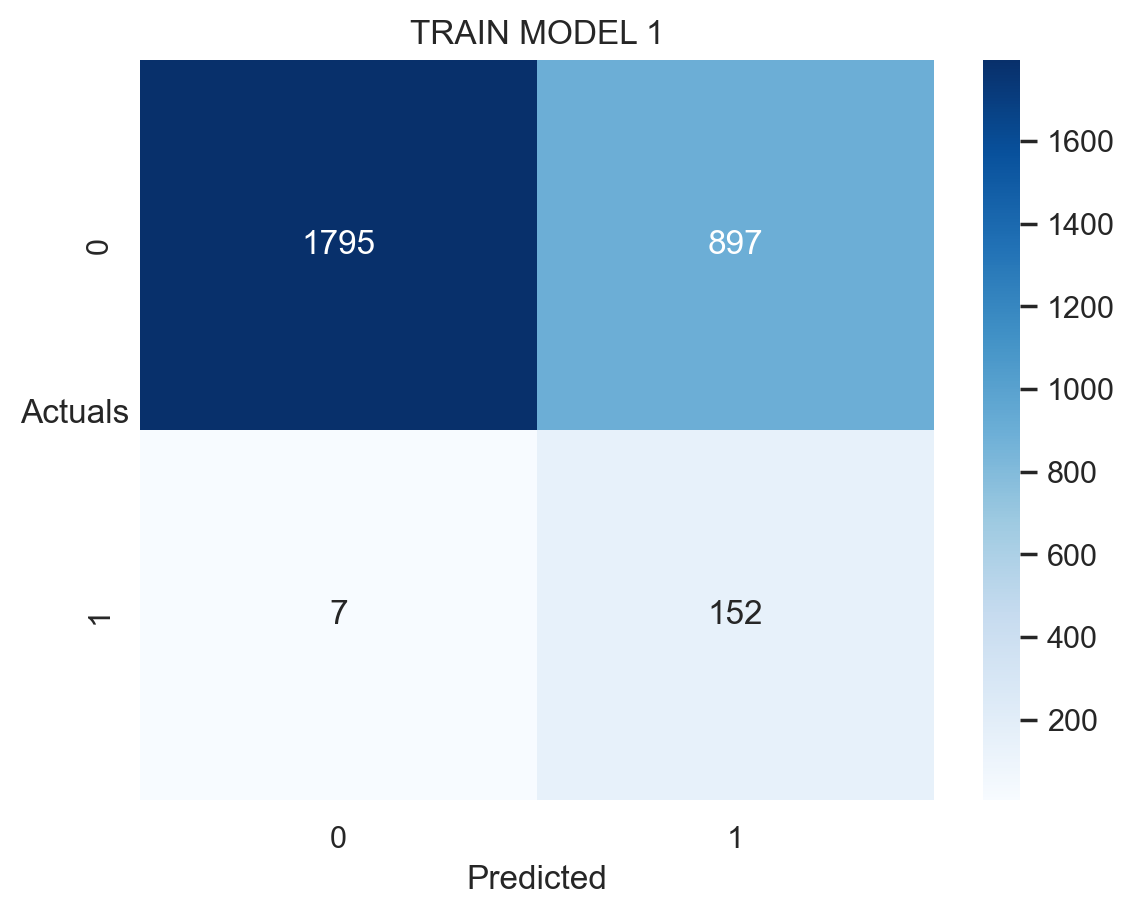

In [61]:
## MODEL 1 TRAIN

y_prob_pred_train = model_1.predict(X_train)

y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('TRAIN MODEL 1')

print(metrics.classification_report(y_train,y_class_pred))

<Axes: >

Text(0.5, 20.049999999999997, 'Predicted')

Text(47.25, 0.5, 'Actuals')

Text(0.5, 1.0, 'TEST MODEL 1')

              precision    recall  f1-score   support

         0.0       1.00      0.65      0.79      1330
         1.0       0.13      0.96      0.24        75

    accuracy                           0.67      1405
   macro avg       0.57      0.81      0.51      1405
weighted avg       0.95      0.67      0.76      1405



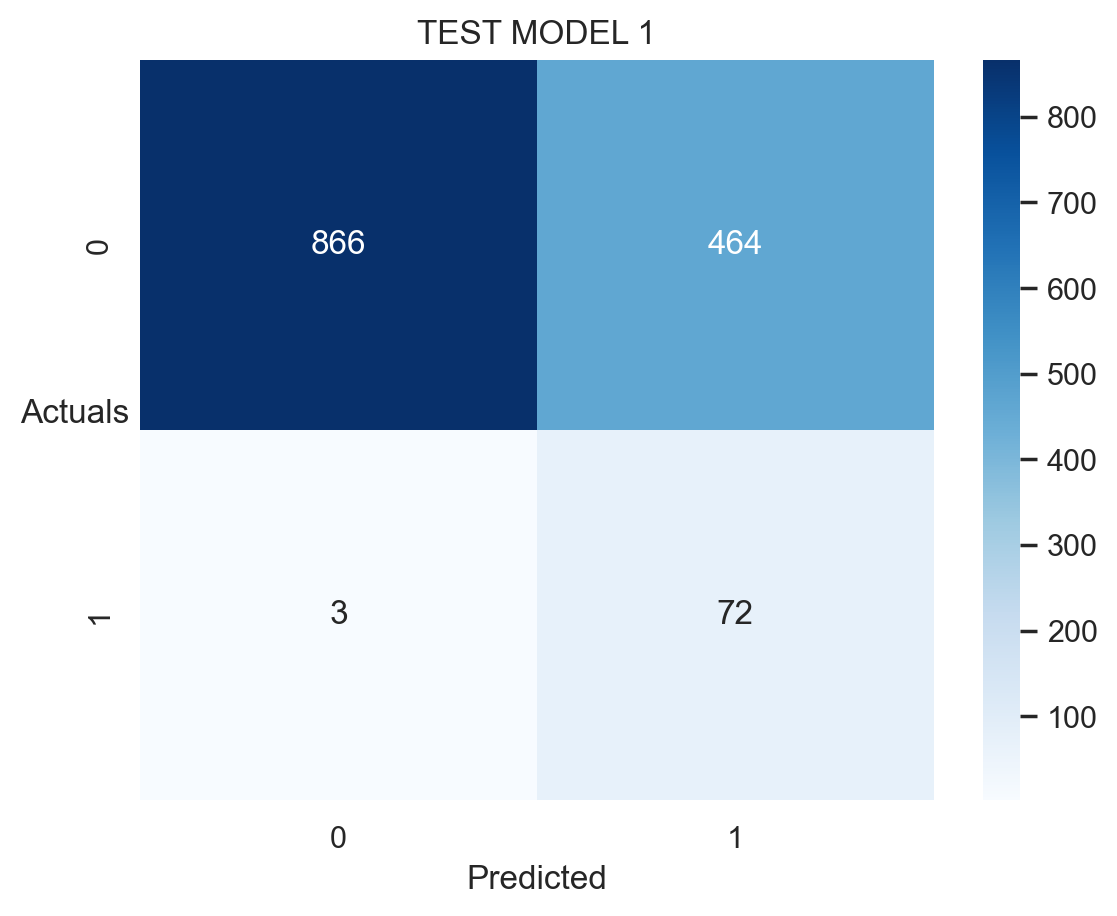

In [62]:
## MODEL 2 TEST

y_prob_pred_test = model_1.predict(X_test)

y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('TEST MODEL 1')

print(metrics.classification_report(y_test,y_class_pred))

In [63]:
X_test.shape

(1405, 11)

**MODEL 2**

In [64]:
v = pd.DataFrame(model_1.pvalues.sort_values(ascending=False), columns=['pvalue']).reset_index()
v

index    pvalue
0                     Income_from_fincial_services  0.999870
1                                  Change_in_stock  0.788821
2                                        PE_on_BSE  0.768760
3                                     Other_income  0.680569
4                Cash_to_current_liabilities_times  0.655894
5                                      Investments  0.534462
6                              Net_working_capital  0.019599
7                                     Adjusted_EPS  0.018575
8                      PAT_as_perc_of_total_income  0.005105
9   Total_term_liabilities__to__tangible_net_worth  0.003562
10                     Cumulative_retained_profits  0.001368

*Dropping Variables recursively with p-values greater than 0.05*

In [65]:
import time
start = time.time()

for i in range(25):
    model_2 = SM.Logit(y_train, X_train).fit()
    v = pd.DataFrame(model_2.pvalues.sort_values(ascending=False), columns=['pvalue']).reset_index()
    if (v.iloc[0,1] > 0.05):
        X_train = X_train.drop(columns=v.iloc[0,0])

end = time.time()
print('Time taken =', end-start)

Optimization terminated successfully.
         Current function value: 0.670162
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.670162
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.670175
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.670191
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.670215
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.670255
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.670338
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.670338
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.670338
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.670338
  

**Check p-values again**

In [66]:
print(model_2.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 2851
Model:                          Logit   Df Residuals:                     2846
Method:                           MLE   Df Model:                            4
Date:                Fri, 18 Apr 2025   Pseudo R-squ.:                  -2.115
Time:                        18:05:47   Log-Likelihood:                -1911.1
converged:                       True   LL-Null:                       -613.44
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
PAT_as_perc_of_total_income                       -0.1485      0.052     -2.848      0.004      -0.251      -0.046
Cumulative_retained_pro

**We note that only those variables are included in the model which p-values less than 0.05
All other variables with p-values > 0.05 are recursively dropped one by one**

*Re-setting the Test set with only the required 11 variables chosen*

In [67]:
X_train.shape

(2851, 5)

In [68]:
y_train.shape

(2851,)

In [69]:
X_test = X_test[X_train.columns]

In [70]:
X_test.shape

(1405, 5)

In [71]:
X_test.columns

Index(['PAT_as_perc_of_total_income', 'Cumulative_retained_profits', 'Total_term_liabilities__to__tangible_net_worth', 'Net_working_capital', 'Adjusted_EPS'], dtype='object')

**Metrics of Model 2**

<Axes: >

Text(0.5, 20.049999999999997, 'Predicted')

Text(47.25, 0.5, 'Actuals')

Text(0.5, 1.0, 'TRAIN MODEL 2')

              precision    recall  f1-score   support

         0.0       1.00      0.67      0.80      2692
         1.0       0.15      0.95      0.25       159

    accuracy                           0.69      2851
   macro avg       0.57      0.81      0.53      2851
weighted avg       0.95      0.69      0.77      2851



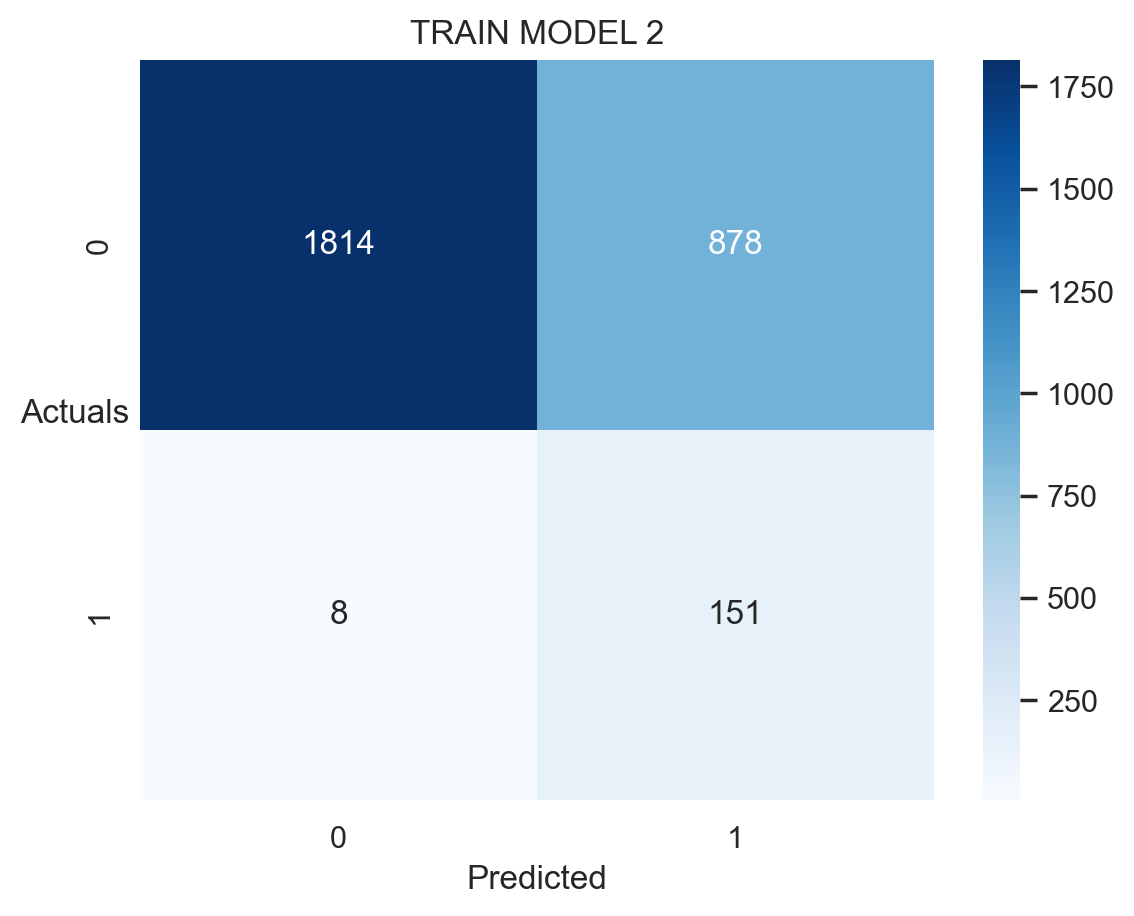

In [72]:
## MODEL 2 TRAIN

y_prob_pred_train = model_2.predict(X_train)

y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('TRAIN MODEL 2')

print(metrics.classification_report(y_train,y_class_pred))

<Axes: >

Text(0.5, 20.049999999999997, 'Predicted')

Text(47.25, 0.5, 'Actuals')

Text(0.5, 1.0, 'TEST MODEL 2')

              precision    recall  f1-score   support

         0.0       1.00      0.66      0.79      1330
         1.0       0.14      0.96      0.24        75

    accuracy                           0.67      1405
   macro avg       0.57      0.81      0.52      1405
weighted avg       0.95      0.67      0.76      1405



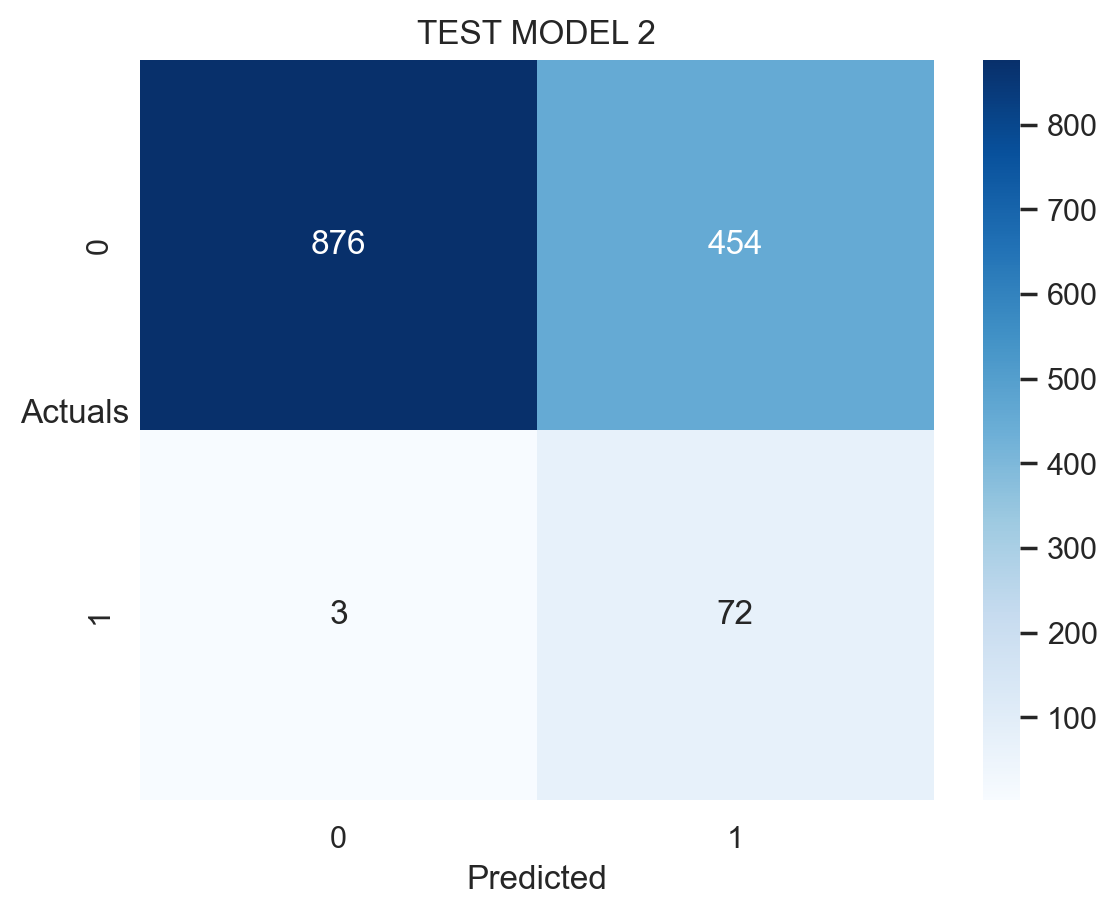

In [73]:
## MODEL 2 TEST

y_prob_pred_test = model_2.predict(X_test)

y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('TEST MODEL 2')

print(metrics.classification_report(y_test,y_class_pred))

In [74]:
X_train.shape

(2851, 5)

**Choosing Optimal Threshold for Model 2**

In [75]:
from sklearn.metrics import roc_curve

y_prob_pred_train = model_2.predict(X_train)
fpr, tpr, thresholds = roc_curve(y_train,y_prob_pred_train)

In [76]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5737517633221207

<Axes: >

Text(0.5, 20.049999999999997, 'Predicted')

Text(47.25, 0.5, 'Actuals')

Text(0.5, 1.0, 'TRAIN MODEL 3')

              precision    recall  f1-score   support

         0.0       0.99      0.82      0.90      2692
         1.0       0.23      0.91      0.37       159

    accuracy                           0.83      2851
   macro avg       0.61      0.86      0.64      2851
weighted avg       0.95      0.83      0.87      2851



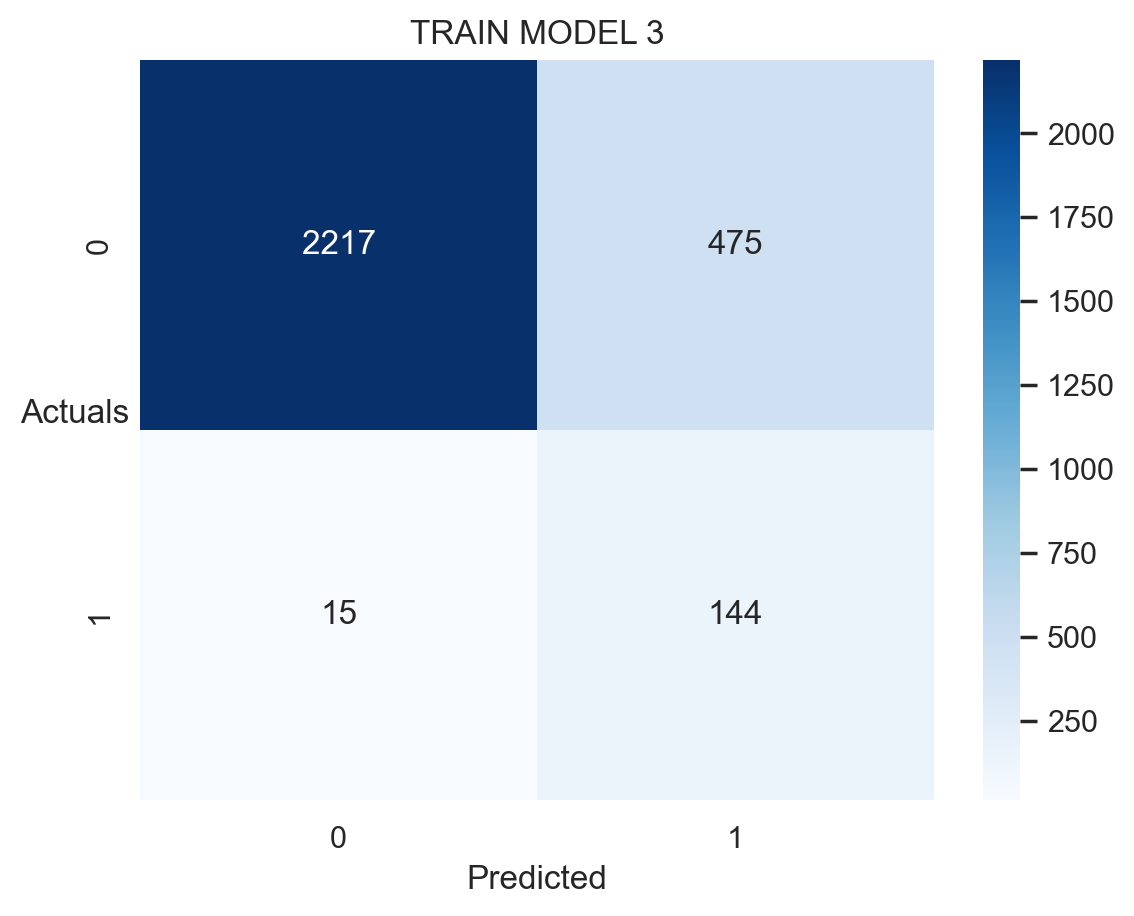

In [77]:
## MODEL 3 TRAIN

y_prob_pred_train = model_2.predict(X_train)

y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred.append(a)

from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('TRAIN MODEL 3')

print(metrics.classification_report(y_train,y_class_pred))

<Axes: >

Text(0.5, 20.049999999999997, 'Predicted')

Text(47.25, 0.5, 'Actuals')

Text(0.5, 1.0, 'TEST MODEL 3')

              precision    recall  f1-score   support

         0.0       0.99      0.81      0.89      1330
         1.0       0.21      0.85      0.33        75

    accuracy                           0.82      1405
   macro avg       0.60      0.83      0.61      1405
weighted avg       0.95      0.82      0.86      1405



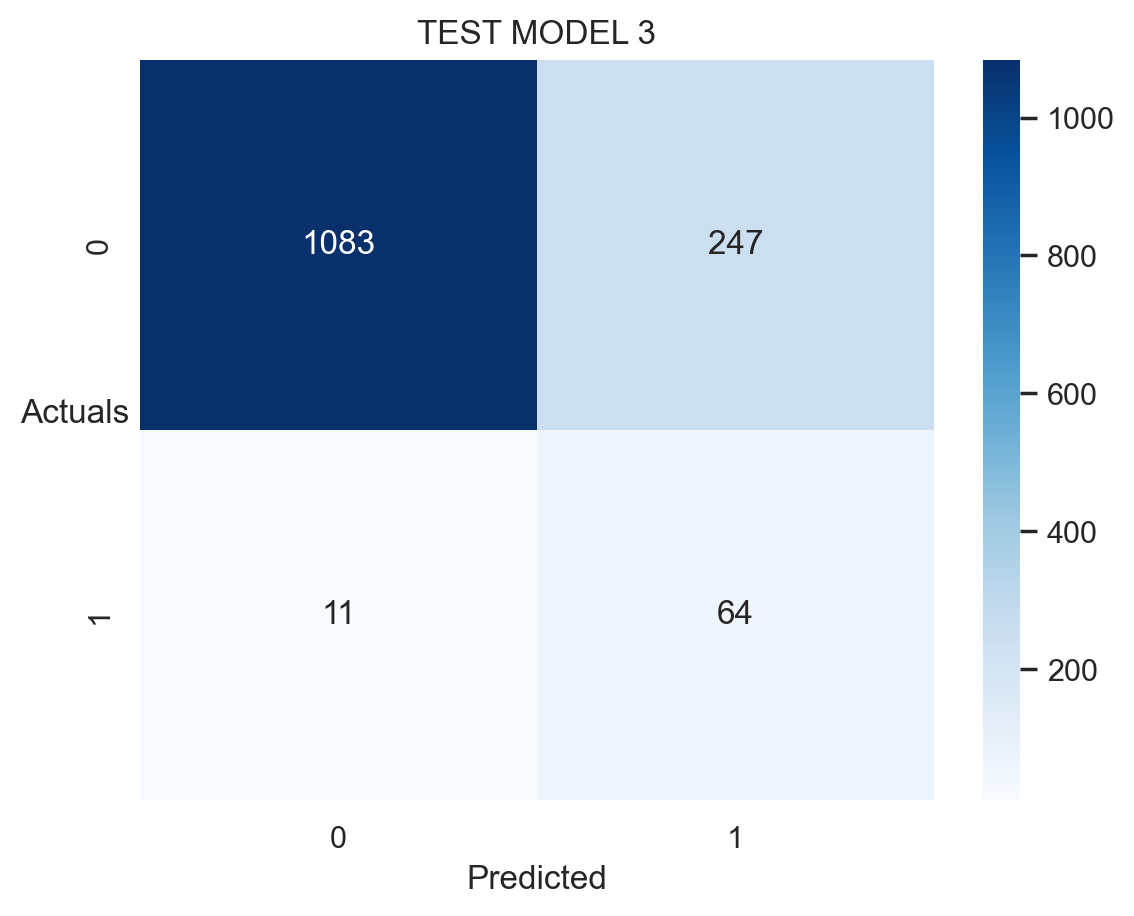

In [78]:
## MODEL 3 TEST

y_prob_pred_test = model_2.predict(X_test)

y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred.append(a)

from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('TEST MODEL 3')

print(metrics.classification_report(y_test,y_class_pred))

**Using Recursive Feature Elimination Method to choose features**

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, df_y, 
                                                    test_size = 0.33, random_state=42)


#### For modeling we will use Logistic Regression with recursive feature elimination
from sklearn.feature_selection import RFE

LogR = LogisticRegression()

selector = RFE(estimator = LogR, n_features_to_select=15, step=1)

selector = selector.fit(X_train, y_train)

df = pd.DataFrame({'Feature': X.columns, 'Rank': selector.ranking_})

In [80]:
df.sort_values(by='Rank')

Feature  Rank
0                                  Change_in_stock     1
1                      PAT_as_perc_of_total_income     1
2                     Income_from_fincial_services     1
3                                     Other_income     1
4                      Cumulative_retained_profits     1
5   Total_term_liabilities__to__tangible_net_worth     1
6                                      Investments     1
7                              Net_working_capital     1
8                Cash_to_current_liabilities_times     1
9                                     Adjusted_EPS     1
10                                       PE_on_BSE     1

In [81]:
pred_train = selector.predict(X_train)
pred_test = selector.predict(X_test)

print(confusion_matrix(y_train, pred_train))

print(classification_report(y_train, pred_train))

[[2658   34]
 [ 110   49]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      2692
         1.0       0.59      0.31      0.40       159

    accuracy                           0.95      2851
   macro avg       0.78      0.65      0.69      2851
weighted avg       0.94      0.95      0.94      2851



In [82]:
print(confusion_matrix(y_test, pred_test))

print(classification_report(y_test, pred_test))

[[1321    9]
 [  54   21]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1330
         1.0       0.70      0.28      0.40        75

    accuracy                           0.96      1405
   macro avg       0.83      0.64      0.69      1405
weighted avg       0.95      0.96      0.95      1405



**Model 5
Using SMOTE to Balance the target Variable 'default'**

*We use SMOTE on Model 4 - RFE*

In [83]:
df = df[df['Rank'] == 1]

l = df['Feature'].values
list(l)

X = X[l]
X.columns
X.shape

['Change_in_stock',
 'PAT_as_perc_of_total_income',
 'Income_from_fincial_services',
 'Other_income',
 'Cumulative_retained_profits',
 'Total_term_liabilities__to__tangible_net_worth',
 'Investments',
 'Net_working_capital',
 'Cash_to_current_liabilities_times',
 'Adjusted_EPS',
 'PE_on_BSE']

Index(['Change_in_stock', 'PAT_as_perc_of_total_income', 'Income_from_fincial_services', 'Other_income', 'Cumulative_retained_profits', 'Total_term_liabilities__to__tangible_net_worth', 'Investments', 'Net_working_capital', 'Cash_to_current_liabilities_times', 'Adjusted_EPS', 'PE_on_BSE'], dtype='object')

(4256, 11)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, df_y, 
                                                    test_size = 0.33, random_state=42)

In [85]:
X_train.shape

(2851, 11)

In [86]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=33)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [87]:
selector_smote = selector.fit(X_res, y_res)
selector_smote.n_features_

11

In [88]:
smote_model5 = pd.DataFrame({'Feature': X_train.columns, 'Rank': selector_smote.ranking_})
smote_model5 = smote_model5[smote_model5['Rank'] == 1]
smote_model5

Feature  Rank
0                                  Change_in_stock     1
1                      PAT_as_perc_of_total_income     1
2                     Income_from_fincial_services     1
3                                     Other_income     1
4                      Cumulative_retained_profits     1
5   Total_term_liabilities__to__tangible_net_worth     1
6                                      Investments     1
7                              Net_working_capital     1
8                Cash_to_current_liabilities_times     1
9                                     Adjusted_EPS     1
10                                       PE_on_BSE     1

In [89]:
smote_model5.to_csv('smote_model5.csv')

In [90]:
l = smote_model5['Feature'].values
list(l)
l

['Change_in_stock',
 'PAT_as_perc_of_total_income',
 'Income_from_fincial_services',
 'Other_income',
 'Cumulative_retained_profits',
 'Total_term_liabilities__to__tangible_net_worth',
 'Investments',
 'Net_working_capital',
 'Cash_to_current_liabilities_times',
 'Adjusted_EPS',
 'PE_on_BSE']

array(['Change_in_stock', 'PAT_as_perc_of_total_income',
       'Income_from_fincial_services', 'Other_income',
       'Cumulative_retained_profits',
       'Total_term_liabilities__to__tangible_net_worth', 'Investments',
       'Net_working_capital', 'Cash_to_current_liabilities_times',
       'Adjusted_EPS', 'PE_on_BSE'], dtype=object)

In [91]:
data11 = X[l]
data11['default'] = df_y
data11_orig = df_imputed[l]
data11_orig['default'] = df_y

data11.to_csv('data11.csv')
data11_orig.to_csv('data11_orig.csv')

In [92]:
df_orig_new = df_orig.copy()
df_orig_new = df_orig_new[l]
df_orig_new['default'] = df_y
df_orig_new.to_csv('df_orig11.csv')

In [93]:
pred_train_smote = selector_smote.predict(X_res)
pred_test_smote = selector_smote.predict(X_test)
print(classification_report(y_res, pred_train_smote))

              precision    recall  f1-score   support

         0.0       0.89      0.86      0.88      2692
         1.0       0.86      0.90      0.88      2692

    accuracy                           0.88      5384
   macro avg       0.88      0.88      0.88      5384
weighted avg       0.88      0.88      0.88      5384



In [94]:
print(classification_report(y_test, pred_test_smote))

              precision    recall  f1-score   support

         0.0       0.99      0.85      0.92      1330
         1.0       0.24      0.83      0.37        75

    accuracy                           0.85      1405
   macro avg       0.61      0.84      0.64      1405
weighted avg       0.95      0.85      0.89      1405



In [95]:
X_res.shape
y_res.shape

(5384, 11)

(5384,)

In [96]:
X_test.shape
y_test.shape

(1405, 11)

(1405,)

In [97]:


# f1 = 'default ~ Equity_Paid_Up + Total_Debt + Other_Income + Selling_Cost + Adjusted_PAT + CEPS_annualised_Unit_Curr + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + Cash_Flow_From_Operating_Activities + ROG-Capital_Employed_perc + ROG-Gross_Block_perc + ROG-Net_Sales_perc + ROG-Cost_of_Production_perc + ROG-PAT_perc + Current_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block + Gross_Block + Net_Working_Capital + Current_Assets + Book_Value_Adj_Unit_Curr'
model_5 = SM.Logit(y_res, X_res).fit()
print(model_5.summary())

Optimization terminated successfully.
         Current function value: 0.324083
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 5384
Model:                          Logit   Df Residuals:                     5373
Method:                           MLE   Df Model:                           10
Date:                Fri, 18 Apr 2025   Pseudo R-squ.:                  0.5324
Time:                        18:37:44   Log-Likelihood:                -1744.9
converged:                       True   LL-Null:                       -3731.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Change_in_stock                     

In [98]:
LRresult1 = (model_5.summary().tables[1])
LRresult1 = pd.DataFrame(LRresult1)
LRresult1.to_csv('model_5_summary.csv')

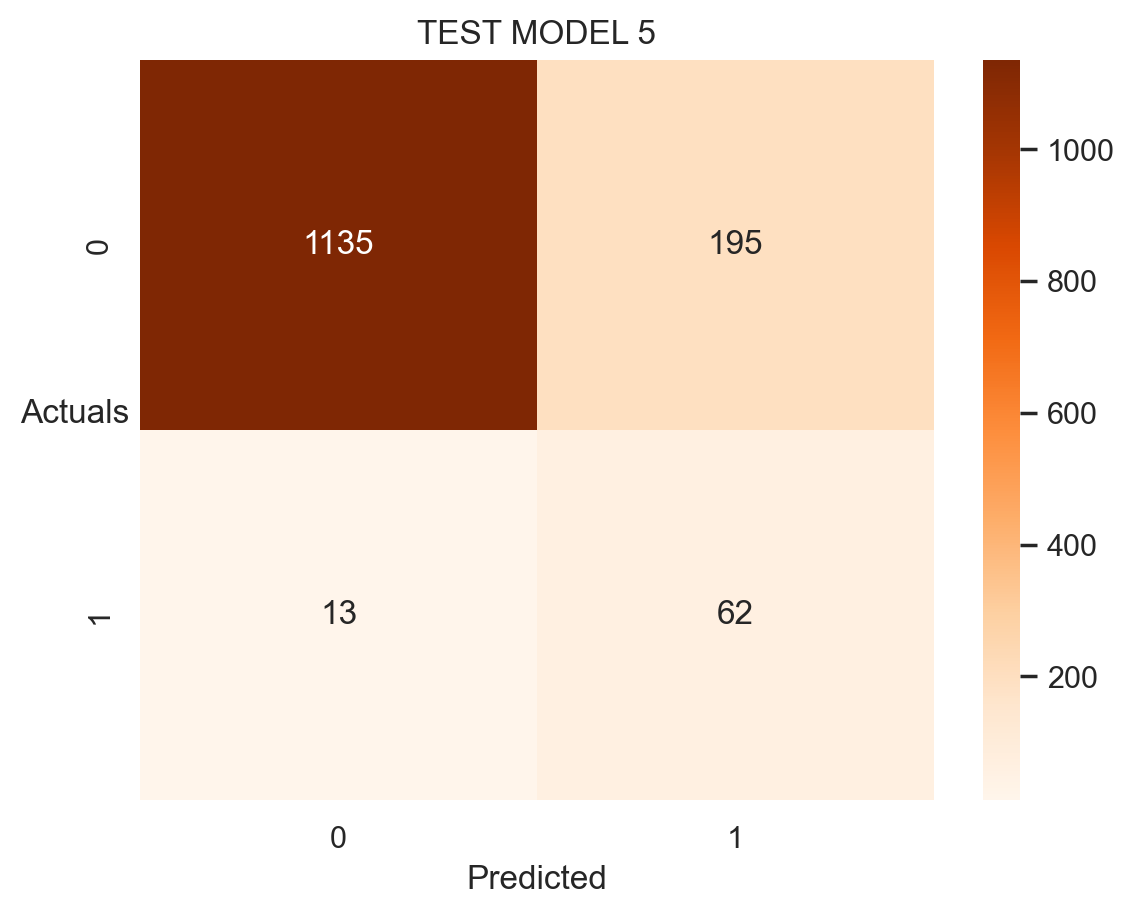

In [99]:
## MODEL 5 TEST

sns.heatmap((metrics.confusion_matrix(y_test,pred_test_smote)),annot=True,fmt='.5g'
            ,cmap='Oranges');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('TEST MODEL 5')
plt.savefig('model5_cm.jpg', bbox_inches='tight');

**Model 6
Using SMOTE to Balance the target Variable 'default' and Choosing Optimal Threshold**

In [100]:
selector_smote.predict_proba(X_res)

array([[0.97596037, 0.02403963],
       [0.87923132, 0.12076868],
       [0.82839343, 0.17160657],
       ...,
       [0.4731956 , 0.5268044 ],
       [0.12568808, 0.87431192],
       [0.05442548, 0.94557452]])

In [101]:
from sklearn.metrics import roc_curve

y_prob_pred_train = selector_smote.predict_proba(X_res)[:,1]
y_prob_pred_test = selector_smote.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_res,y_prob_pred_train)

In [105]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.48215370505081373

In [106]:
y_prob_pred_test

array([0.01131296, 0.91548209, 0.02008711, ..., 0.82613289, 0.14263665,
       0.97387919])

<Axes: >

Text(0.5, 20.049999999999997, 'Predicted')

Text(47.25, 0.5, 'Actuals')

Text(0.5, 1.0, 'TEST MODEL 6')

              precision    recall  f1-score   support

         0.0       0.99      0.85      0.91      1330
         1.0       0.24      0.83      0.37        75

    accuracy                           0.85      1405
   macro avg       0.61      0.84      0.64      1405
weighted avg       0.95      0.85      0.88      1405



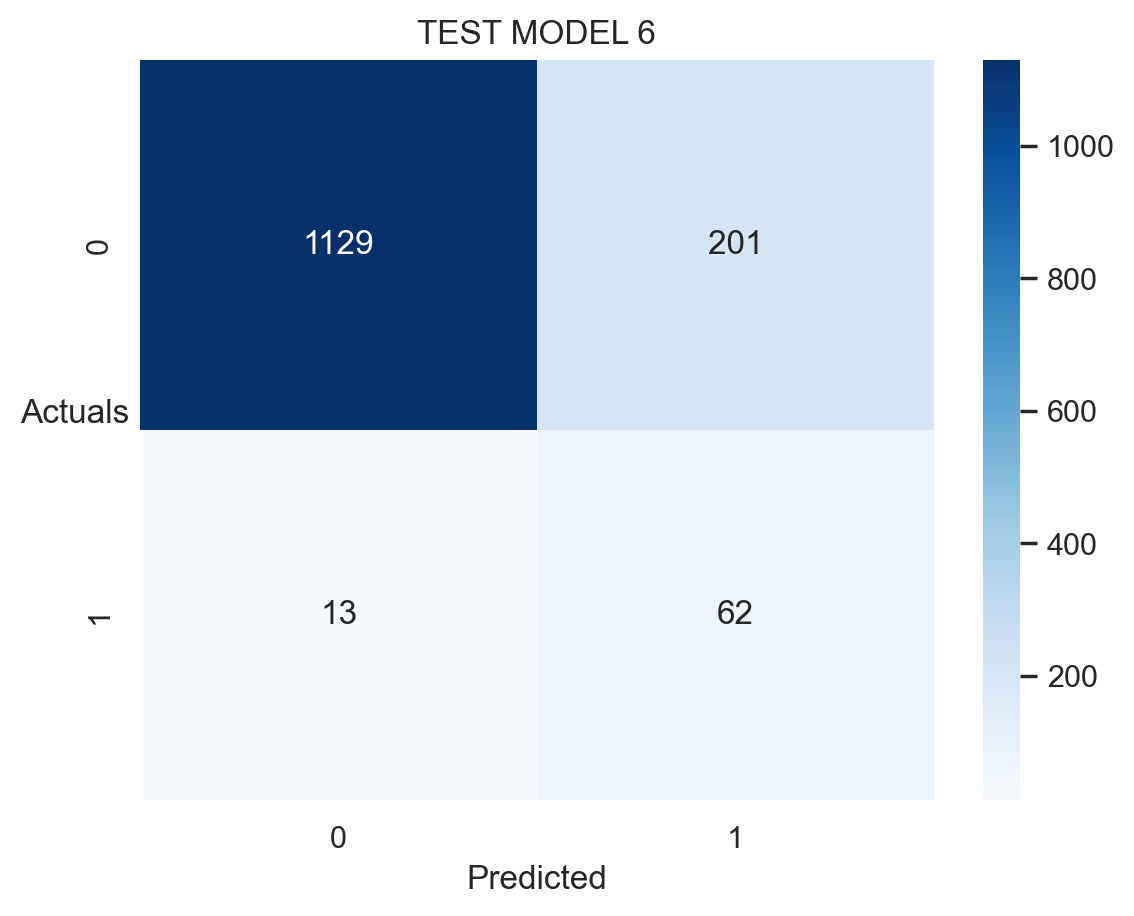

In [107]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred.append(a)

from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('TEST MODEL 6')

print(metrics.classification_report(y_test,y_class_pred))

In [108]:
import statsmodels.api as SM

# f1 = 'default ~ Equity_Paid_Up + Total_Debt + Other_Income + Selling_Cost + Adjusted_PAT + CEPS_annualised_Unit_Curr + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + Cash_Flow_From_Operating_Activities + ROG-Capital_Employed_perc + ROG-Gross_Block_perc + ROG-Net_Sales_perc + ROG-Cost_of_Production_perc + ROG-PAT_perc + Current_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block + Gross_Block + Net_Working_Capital + Current_Assets + Book_Value_Adj_Unit_Curr'
model_6 = SM.Logit(y_res, X_res).fit()
print(model_6.summary())

Optimization terminated successfully.
         Current function value: 0.324083
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 5384
Model:                          Logit   Df Residuals:                     5373
Method:                           MLE   Df Model:                           10
Date:                Fri, 18 Apr 2025   Pseudo R-squ.:                  0.5324
Time:                        18:45:57   Log-Likelihood:                -1744.9
converged:                       True   LL-Null:                       -3731.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Change_in_stock                     

In [109]:
LRresult = (model_6.summary().tables[1])
LRresult = pd.DataFrame(LRresult)
LRresult.to_csv('model_6_summary.csv')
LRresult

0           1          2          3       4          5          6
0                                                         coef    std err          z   P>|z|     [0.025     0.975]
1                                  Change_in_stock      0.1914      0.023      8.162   0.000      0.145      0.237
2                      PAT_as_perc_of_total_income     -0.2626      0.021    -12.472   0.000     -0.304     -0.221
3                     Income_from_fincial_services     -0.3437      0.051     -6.686   0.000     -0.444     -0.243
4                                     Other_income     -0.0516      0.050     -1.025   0.306     -0.150      0.047
5                      Cumulative_retained_profits     -0.1969      0.019    -10.333   0.000     -0.234     -0.160
6   Total_term_liabilities__to__tangible_net_worth      0.5945      0.034     17.297   0.000      0.527      0.662
7                                      Investments     -0.2351      0.034     -6.920   0.000     -0.302     -0.169
8                              Net_working_capital     -0.1859      0.018    -10.319   0.000     -0.221     -0.151
9                Cash_to_current_liabilities_times      0.2696      0.057      4.710   0.000      0.157      0.382
10                                    Adjusted_EPS     -0.3693      0.026    -14.252   0.000     -0.420     -0.319
11                                       PE_on_BSE     -0.0016      0.019     -0.087   0.931     -0.039      0.036

In [110]:
import time
start = time.time()

for i in range(23):
    model_10 = SM.Logit(y_res, X_res).fit()
    v = pd.DataFrame(model_10.pvalues.sort_values(ascending=False), columns=['pvalue']).reset_index()
    if (v.iloc[0,1] > 0.05):
        X_res = X_res.drop(columns=v.iloc[0,0])

end = time.time()
print('Time taken =', end-start)

Optimization terminated successfully.
         Current function value: 0.324083
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.324084
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.324187
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.324187
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.324187
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.324187
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.324187
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.324187
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.324187
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.324187
  

In [111]:
print(model_6.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 5384
Model:                          Logit   Df Residuals:                     5373
Method:                           MLE   Df Model:                           10
Date:                Fri, 18 Apr 2025   Pseudo R-squ.:                  0.5324
Time:                        18:49:50   Log-Likelihood:                -1744.9
converged:                       True   LL-Null:                       -3731.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Change_in_stock                                    0.1914      0.023      8.162      0.000       0.145       0.237
PAT_as_perc_of_total_in

In [112]:
LRresult1 = (model_6.summary().tables[1])
LRresult1 = pd.DataFrame(LRresult1)
# LRresult1.to_csv('model_6_summary.csv')

<Axes: >

Text(0.5, 20.049999999999997, 'Predicted')

Text(47.25, 0.5, 'Actuals')

Text(0.5, 1.0, 'TEST MODEL 6')

              precision    recall  f1-score   support

         0.0       0.99      0.85      0.91      1330
         1.0       0.24      0.83      0.37        75

    accuracy                           0.85      1405
   macro avg       0.61      0.84      0.64      1405
weighted avg       0.95      0.85      0.89      1405



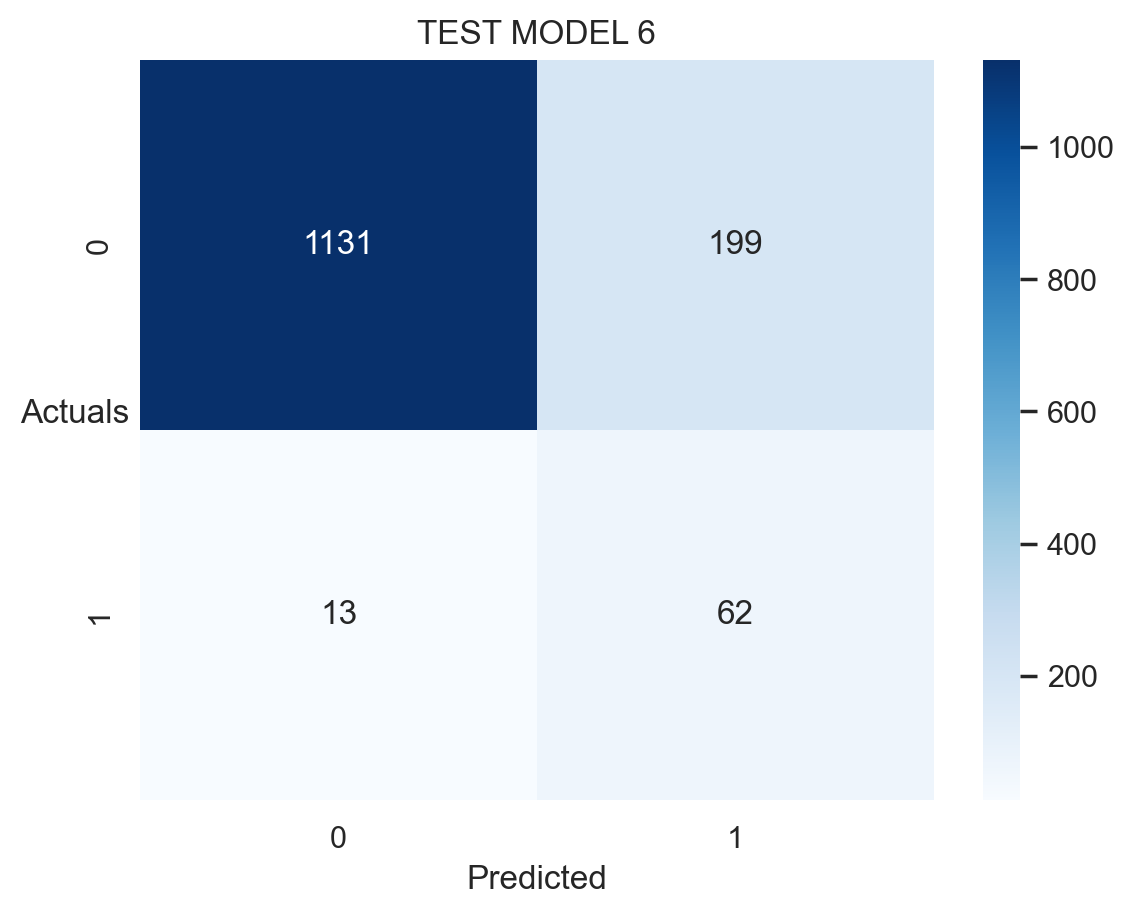

In [115]:
## MODEL 6 TEST

y_prob_pred_test = model_6.predict(X_test)

y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

from sklearn import metrics

sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.title('TEST MODEL 6')

print(metrics.classification_report(y_test,y_class_pred))

In [121]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns

from scipy.stats import zscore                                        # ZSCORE SCALING
from sklearn.preprocessing import StandardScaler                      # ZScore
from sklearn.preprocessing import MinMaxScaler                        # Min Max Scaler

from sklearn.linear_model import LogisticRegression                   # Logistic Regression

from sklearn import metrics, model_selection                          # Evaluation Metrics
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve, precision_recall_curve

from sklearn.model_selection import train_test_split, GridSearchCV    # Train test Split and Grid Search


%matplotlib inline
sns.set(color_codes=True)
sns.set_palette('pastel')

%config InlineBackend.figure_format ='retina'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [122]:
comp = pd.read_csv('df_orig11.csv')
scaled_comp = pd.read_csv('data11.csv')

In [123]:
comp.drop('Unnamed: 0', axis=1, inplace=True)
scaled_comp.drop('Unnamed: 0', axis=1, inplace=True)
comp.head()

Change_in_stock  PAT_as_perc_of_total_income  Income_from_fincial_services  Other_income  Cumulative_retained_profits  Total_term_liabilities__to__tangible_net_worth  Investments  Net_working_capital  Cash_to_current_liabilities_times  Adjusted_EPS  PE_on_BSE  default
0             13.5                         7.28                           0.6           NaN                        248.9                                            0.99         18.1                163.1                               0.06          4.44        NaN      0.0
1             -3.7                         2.32                           NaN           0.2                         -8.2                                            0.21          0.2                  3.9                               0.02          0.00        NaN      0.0
2            -18.1                         1.18                           0.6           NaN                         53.1                                            0.33          0.2                 38.3                               0.19          0.00        NaN      0.0
3            212.2                         2.11                           2.0           NaN                        593.3                                            0.22          NaN               1455.1                               0.07         17.60        NaN      0.0
4              3.4                        -0.18                           0.2           0.8                         35.8                                            0.44          NaN                 20.8                               0.05         -6.52        NaN      0.0

In [124]:
scaled_comp.head()

Change_in_stock  PAT_as_perc_of_total_income  Income_from_fincial_services  Other_income  Cumulative_retained_profits  Total_term_liabilities__to__tangible_net_worth  Investments  Net_working_capital  Cash_to_current_liabilities_times  Adjusted_EPS  PE_on_BSE  default
0              3.0                         3.00                          0.60          3.00                          3.0                                            0.99          3.0                  3.0                               0.06           3.0      1.786      0.0
1             -3.0                         2.32                          0.27          0.20                         -3.0                                            0.21          0.2                  3.0                               0.02           3.0      3.000      0.0
2             -3.0                         1.18                          0.60          1.41                          3.0                                            0.33          0.2                  3.0                               0.19           3.0      3.000      0.0
3              3.0                         2.11                          2.00          3.00                          3.0                                            0.22          3.0                  3.0                               0.07           3.0      3.000      0.0
4              3.0                        -0.18                          0.20          0.80                          3.0                                            0.44          3.0                  3.0                               0.05          -3.0      3.000      0.0

In [127]:
grp_sc = scaled_comp.groupby('default').mean()

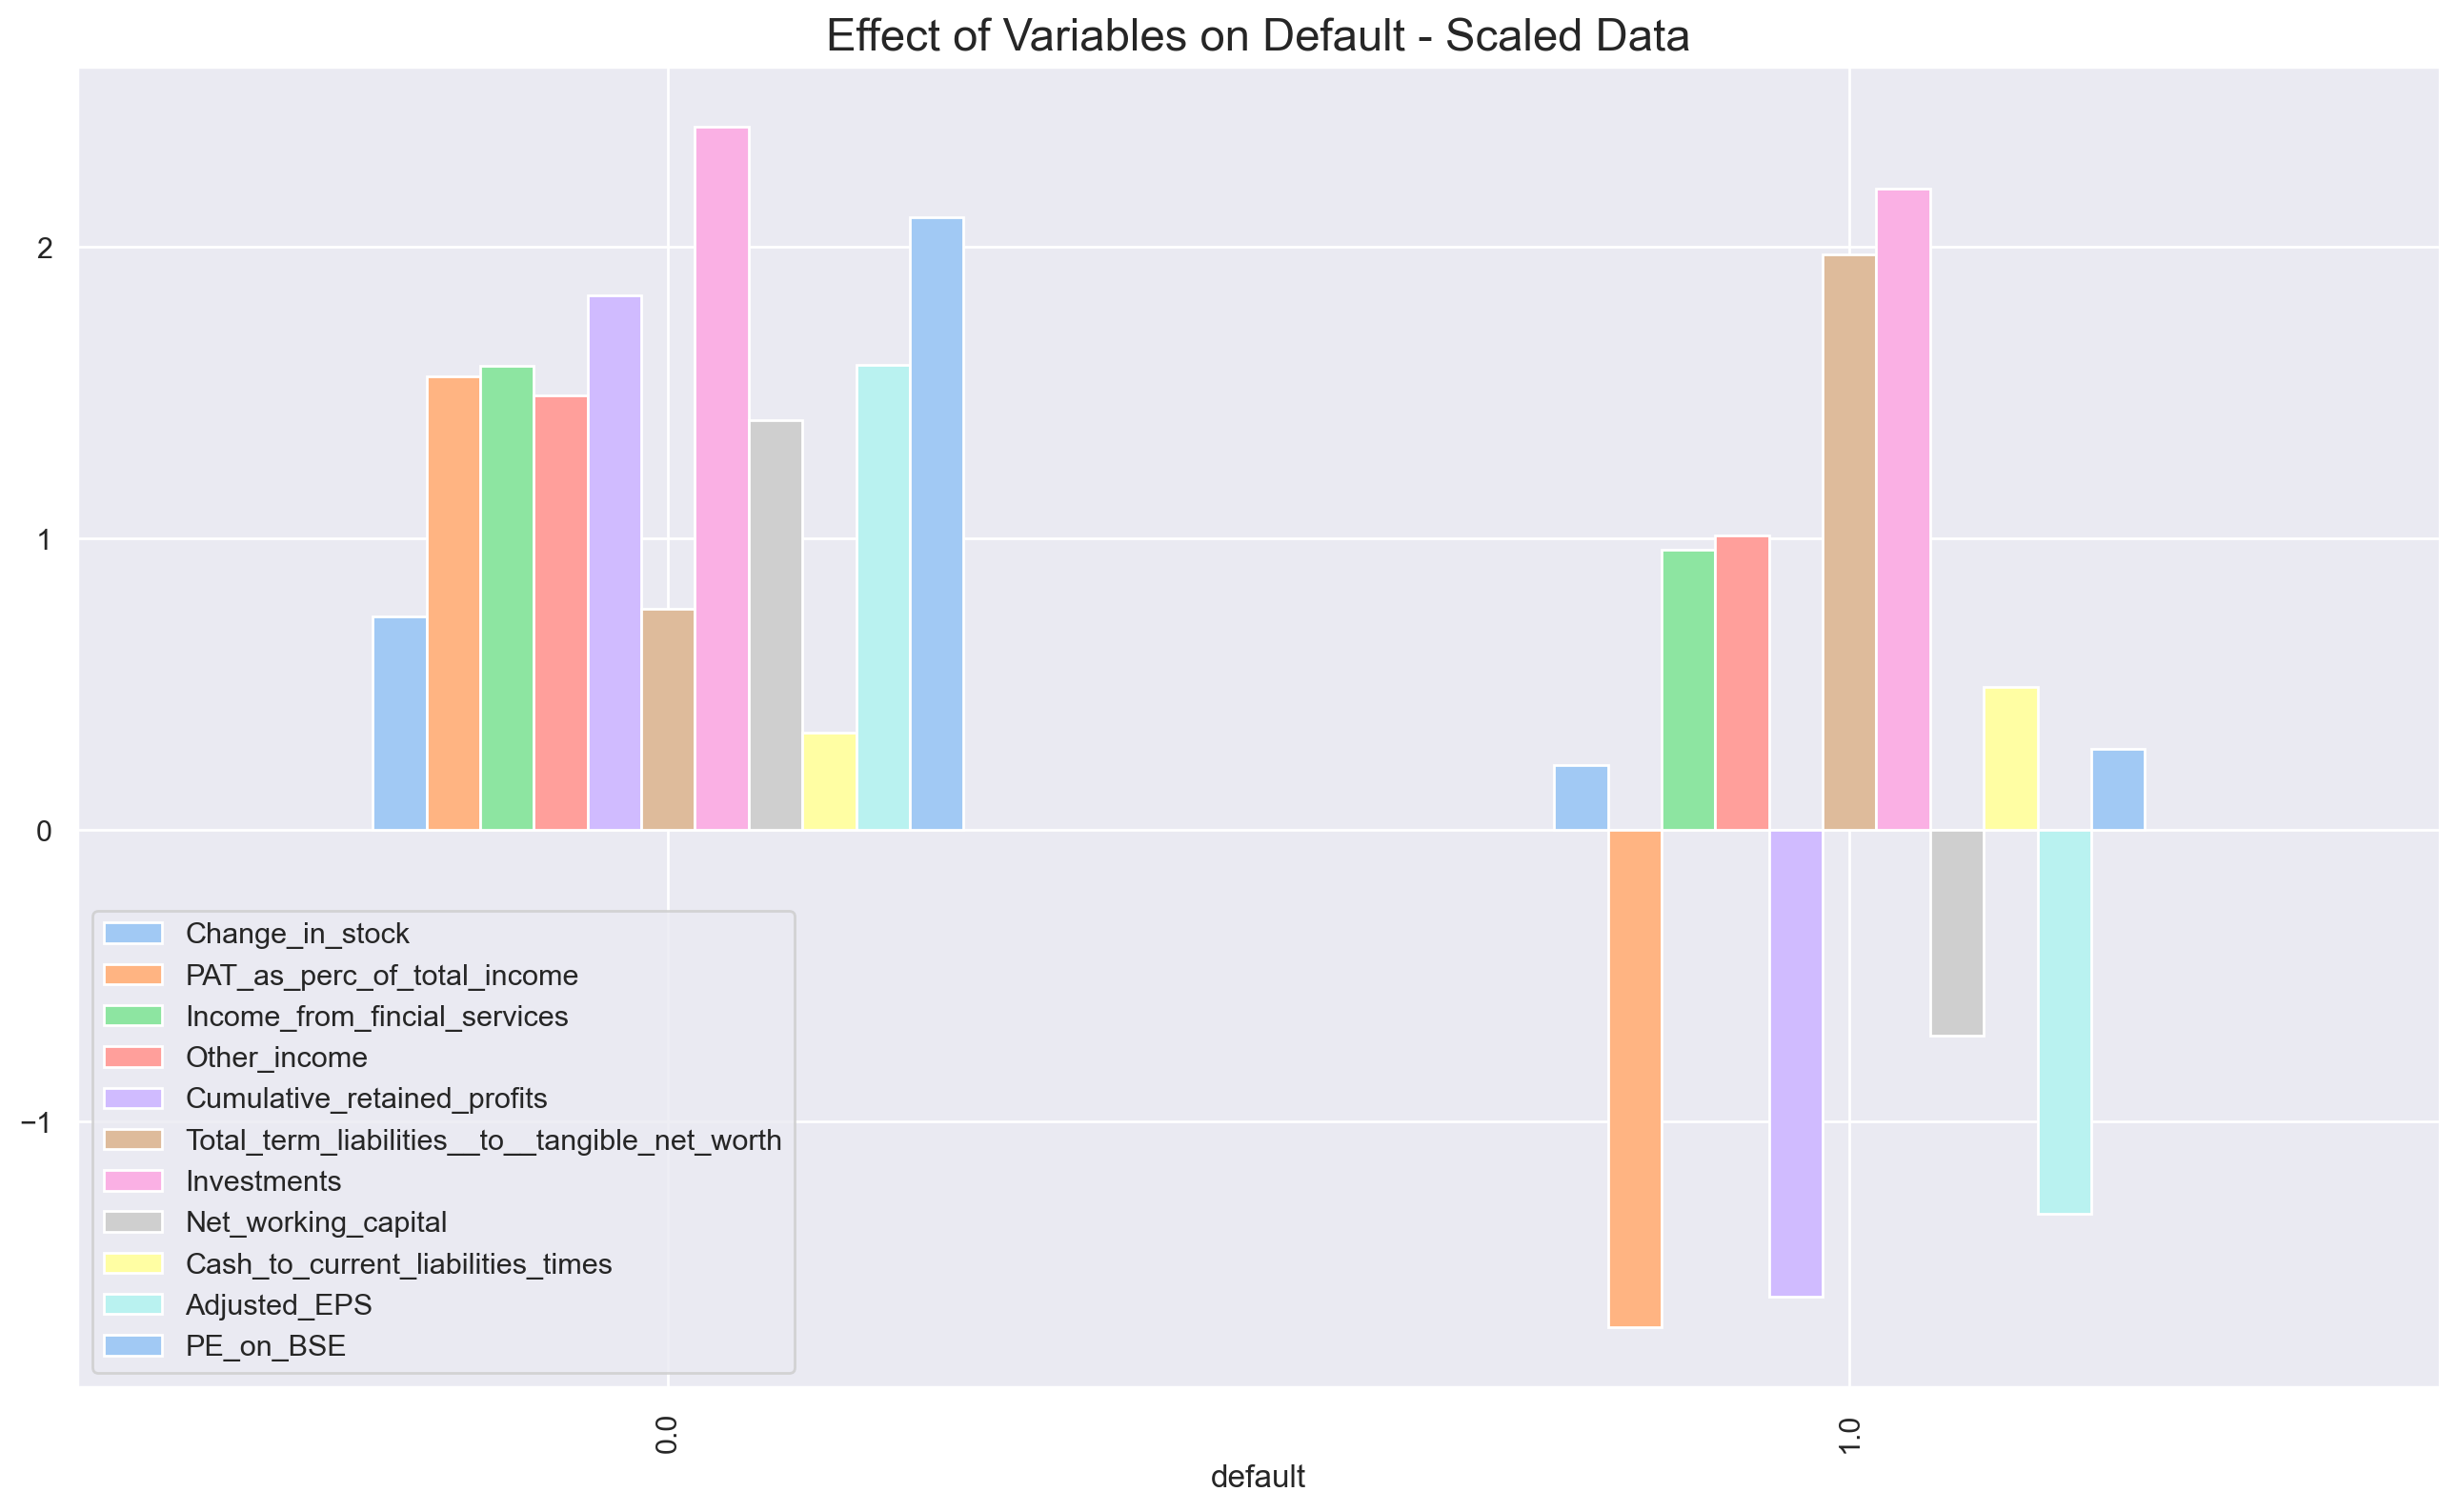

In [128]:
grp_sc.plot(kind='bar', figsize=(16,9))
plt.title('Effect of Variables on Default - Scaled Data', fontsize=17);
plt.savefig('vars_deault.jpg', bbox_inches='tight');

In [ ]:
**Random Forst**

In [131]:


# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_x, df_y, 
                                                    test_size = 0.33, random_state=42)

# Print the shapes and class distributions
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (2851, 11)
Shape of test set :  (1405, 11)
Percentage of classes in training set:
default
0.0    0.94423
1.0    0.05577
Name: proportion, dtype: float64
Percentage of classes in test set:
default
0.0    0.946619
1.0    0.053381
Name: proportion, dtype: float64


In [132]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [133]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(4, 2))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [134]:
from sklearn.ensemble import RandomForestClassifier
# Define random forest with random state = 1 and class_weight = balanced
rf = RandomForestClassifier(random_state=1, class_weight="balanced")

# Fit random forest on the train data
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

Accuracy  Recall  Precision        F1
0   0.99053     1.0   0.854839  0.921739

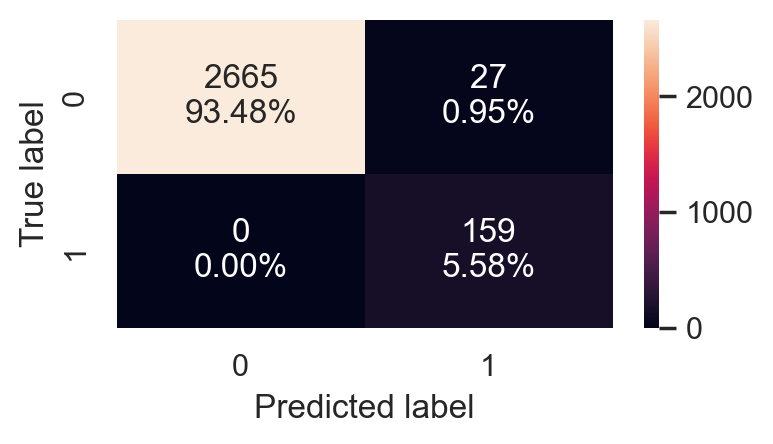

In [135]:
# Create confusion matrix for train data
confusion_matrix_sklearn(rf, X_train, y_train)

#check performance on train data
rf_perf_train = model_performance_classification_sklearn(
    rf, X_train, y_train
)
rf_perf_train

Accuracy    Recall  Precision        F1
0  0.945196  0.186667   0.466667  0.266667

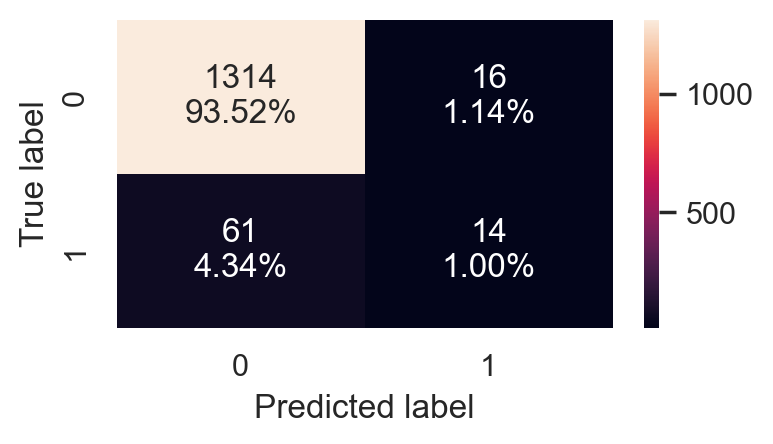

In [136]:
# Create confusion matrix for test data
confusion_matrix_sklearn(rf, X_test, y_test)

# Check performance for test data
rf_perf_test = model_performance_classification_sklearn(
    rf, X_test, y_test
)
rf_perf_test

<Figure size 600x600 with 0 Axes>

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 11 artists>

([<matplotlib.axis.YTick at 0x227b13433e0>,
 [Text(0, 0, 'Investments'),
  Text(0, 1, 'PE_on_BSE'),
  Text(0, 2, 'Change_in_stock'),
  Text(0, 3, 'Other_income'),
  Text(0, 4, 'Income_from_fincial_services'),
  Text(0, 5, 'Cash_to_current_liabilities_times'),
  Text(0, 6, 'Net_working_capital'),
  Text(0, 7, 'Total_term_liabilities__to__tangible_net_worth'),
  Text(0, 8, 'Adjusted_EPS'),
  Text(0, 9, 'Cumulative_retained_profits'),
  Text(0, 10, 'PAT_as_perc_of_total_income')])

Text(0.5, 0, 'Relative Importance')

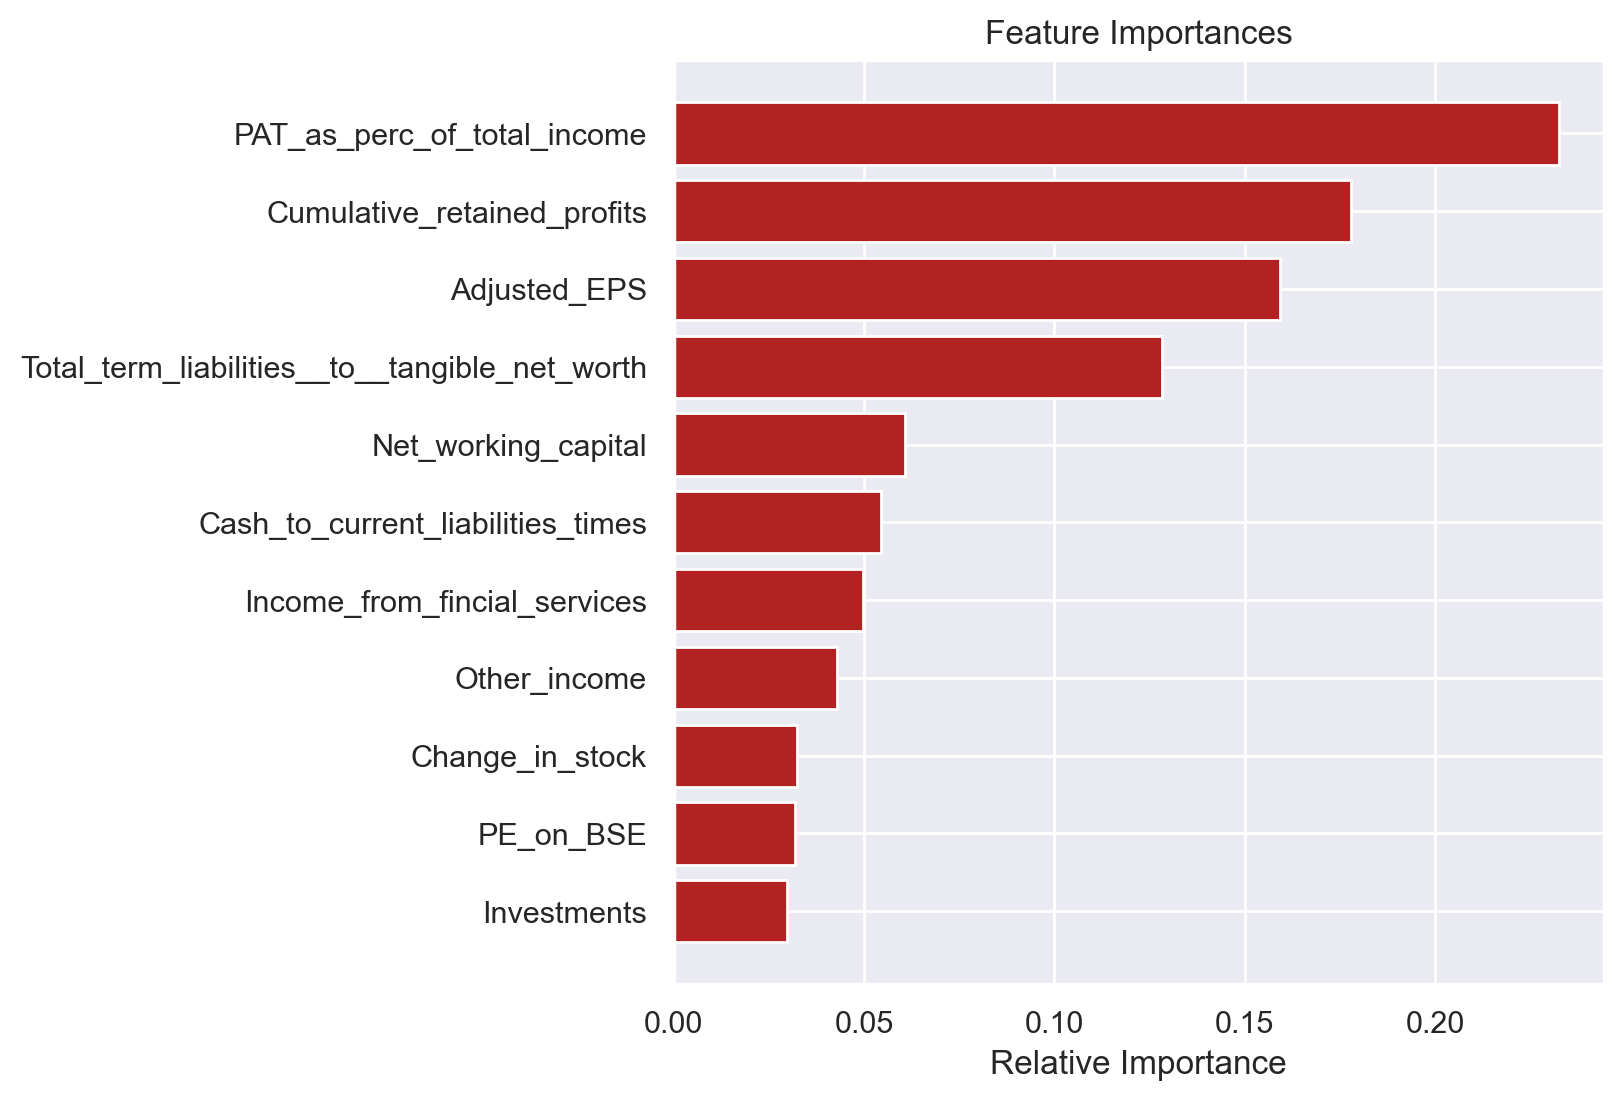

In [137]:
feature_names = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="firebrick", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [138]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True, verbose=0)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(20, 100, 20),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1,verbose=0)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=20,
                       oob_score=True, random_state=1)

Accuracy    Recall  Precision        F1
0  0.980709  0.716981   0.919355  0.805654

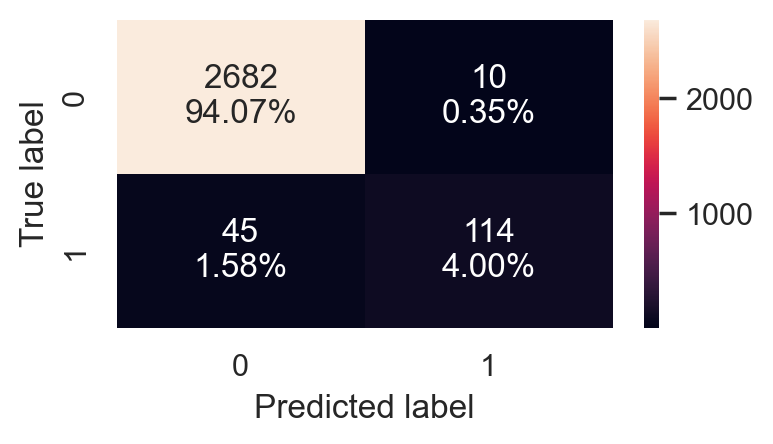

In [139]:
# Create confusion matrix for train data on tuned estimator
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

# Check performance for train data on tuned estimator
rf_tuned_perf_train = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)
rf_tuned_perf_train

Accuracy    Recall  Precision        F1
0  0.948754  0.266667   0.540541  0.357143

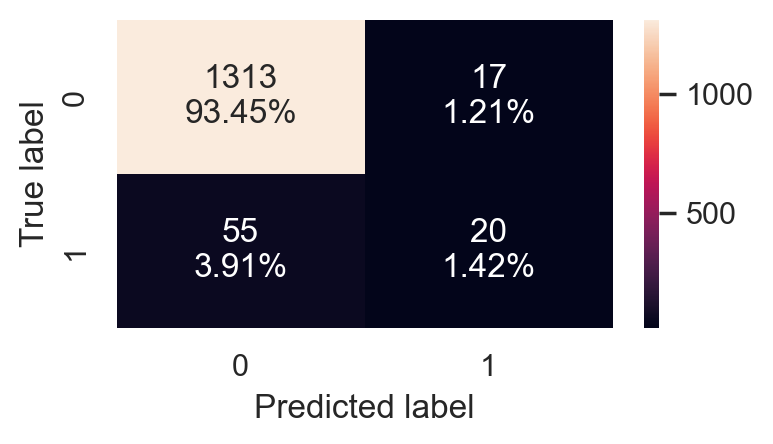

In [140]:
# Create confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

# Check performance for test data on tuned estimator
rf_tuned_perf_test = model_performance_classification_sklearn(
    rf_tuned, X_test, y_test
)
rf_tuned_perf_test

In [143]:
import pandas as pd

# Assuming you have the evaluation metrics for all four models
# Replace these with your actual values

model_data = {
    'Model': ['Logistic Regression (Model 3)',
              'Logistic Regression (Model 5)',
              'Random Forest (Initial)',
              'Random Forest (Hyper-tuned)'],
    'Accuracy': [0.99, 0.95, 0.94, 0.93],  # Replace with your actual accuracy scores
    'Recall': [0.85, 0.78, 0.18, 0.26],  # Replace with your actual recall for class 1
    'Precision': [0.99, 0.62, 0.46, 0.54],  # Replace with your actual precision for class 1
    'F1-Score': [0.33, 0.37, 0.26, 0.35]   # Replace with your actual F1-score for class 1
}

comparison_table = pd.DataFrame(model_data)

print(comparison_table)

                           Model  Accuracy  Recall  Precision  F1-Score
0  Logistic Regression (Model 3)      0.99    0.85       0.99      0.33
1  Logistic Regression (Model 5)      0.95    0.78       0.62      0.37
2        Random Forest (Initial)      0.94    0.18       0.46      0.26
3    Random Forest (Hyper-tuned)      0.93    0.26       0.54      0.35
